# Plots 

Plots Notebook for reproducibility. The notebook is divided into 3 sections:
- Generated Datasets Visualization
- Generated Sparse Datasets Visualization
- Real Dataset Visualization

In [1]:
#Global file paths
GENERATED_PATH = '../data/generatedData_bench_25iter.csv'
GENERATED_SPARSE_PATH = '../data/Generated.t4.bench'
GENERATED_SPARSE_2_PATH = '../data/Generated.t5.bench'
GENERATED_PYTHONIC_PATH = '../data/data_python_agg.csv'
REAL_BENCHMARKS = "../data/real_datasets.csv"
IMG_PATH = 'img/'
IMG_PATH_S = 'img/sp/'
IMG_PATH_R = 'img/real/'

In [2]:
# #Global file paths FOR PRODUCTION
# GENERATED_PATH = '../data/generatedData_bench_100iter.csv'
# GENERATED_SPARSE_PATH = '../data/Generated.t4.bench'
# GENERATED_SPARSE_2_PATH = '../data/Generated.t5.bench'
# GENERATED_PYTHONIC_PATH = '../data/data_python.csv'

## Generated Dataset Visualization

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [3]:
#df = pd.read_csv('matrix_real1.bench',sep=" ")
df = pd.read_csv(GENERATED_PATH)

cols = []
for i in range(1,25):
    cols.append('val_{}'.format(i))
df['minTime'] =df[cols].min(axis=1)
df['maxTime']=df[cols].max(axis=1)
df

NameError: name 'GENERATED_PATH' is not defined

In [7]:
weight=[]
unID=[]
w1=[]
w2=[]
w3=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    w1.append(int(k[0]))
    w2.append(int(k[2]))
    w3.append(k[0]+'_'+k[2])
    

df['wX'] = w1
df['wY'] = w2
df['ID'] = w3
df['logWX'] = np.log10(df['wX'])
df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
df['logMinTime']=np.log10(df['minTime'])
df['logMaxTime']=np.log10(df['maxTime'])
df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
#df['IDtag'] = unID
#print(df[df['DataFile']])
df

NameError: name 'df' is not defined

In [8]:
for i in df['DataFile']:
    k=i.split('/')[-1].split('_')
    i= i.split("_")
    print(i,k)
ma=[]
for i in df['DataFile']:
    m=i.split('/')[-1].split('.')
    ma.append(m[0])
c=0
# for j in df['method']:
#     ma[c]= ma[c]+'_'+j
#     c+=1
# c=0
# for k in df['metric']:
#     ma[c]= ma[c]+'_'+k
#     c+=1

#df['W']=ma
df

NameError: name 'df' is not defined

In [9]:
df.drop('Column1', axis=1).columns

NameError: name 'df' is not defined

In [10]:
df = df[(df.method != 'factoextra') & (df.method != 'amap') & (df.method != 'CPU') & (df.method != 'GPU') & (df.method != 'pandas')]

NameError: name 'df' is not defined

In [11]:
factoextra_dense = pd.read_csv('../data/factoextra_dense.csv')

In [12]:
df

NameError: name 'df' is not defined

In [13]:
df = pd.concat([factoextra_dense])
# df = df[~((df.Method == 'kendall_factoextra') & (df.wY == 100000))]

In [14]:
df.loc[df['method'] == 'pythonic', 'mean'] *= 24
df.loc[df['method'] == 'pythonic', 'logMeanTime'] += np.log10(24)

In [15]:
matrices = {
    'kendall': {},
    'euclidean': {},
    'pearson': {}
}

matrices_real = {
    'kendall': {},
    'euclidean': {},
    'pearson': {},
}
labels = {
    'kendall': {},
    'euclidean': {},
    'pearson': {},
}

In [16]:
def fill_missing_values(matrix):
    for i in range(1, 5):
        try:
            matrix.loc[i]
        except:
            matrix.loc[i] = [np.nan, np.nan, np.nan, np.nan, np.nan]
    
    labels = np.round(np.copy(matrix), 1).tolist()
    for i in range(1, 5):
        for j in range(1, 6):
            if i + j <= 7 and np.isnan(matrix.loc[i, j]):
                label_i = i - 1
                label_j = j - 1
                matrix.loc[i, j] = 100
                labels[label_i][label_j] = 'W'
    matrix = matrix.loc[matrix.index[::-1]]
    labels = labels[::-1]
    print(labels)
    return matrix, labels

In [17]:
def fill_missing_values_real(matrix):
    for i in range(1, 5):
        try:
            matrix.loc[i]
        except:
            matrix.loc[i] = [np.nan, np.nan, np.nan, np.nan, np.nan]
    
    labels = np.round(np.copy(matrix), 1).tolist()
    for i in range(1, 5):
        for j in range(1, 6):
            if i + j <= 7 and np.isnan(matrix.loc[i, j]):
                label_i = i - 1
                label_j = j - 1
                matrix.loc[i, j] = 10 ** 11
                labels[label_i][label_j] = 'W'
    matrix = matrix.loc[matrix.index[::-1]]
    labels = labels[::-1]
    print(labels)
    return matrix, labels

In [18]:
for metric in matrices.keys():
    for method in ['CPU', 'GPU', 'amap', 'pythonic', 'pandas', 'factoextra']:
        print(metric, method)
        matrix = df[df.metric == metric]
        matrix_log = matrix[matrix.method == method].pivot('logWX','logWY','logMeanTime')
        matrix_real = matrix[matrix.method == method].pivot('logWX', 'logWY', 'mean')
        matrix, label = fill_missing_values(matrix_log)
        matrix_real, _ = fill_missing_values_real(matrix_real)
        
        
        matrices_real[metric][method] = matrix_real
        matrices[metric][method] = matrix
        labels[metric][method] = label

kendall CPU
[[7.5, 9.6, 'W', nan, nan], [5.2, 7.1, 9.0, 'W', nan], [3.7, 5.2, 7.1, 9.1, 'W'], [3.4, 3.7, 5.3, 7.2, 9.2]]
[[33248760.9, 3933600353.6, 'W', nan, nan], [174563.0, 13193718.3, 1014795937.8, 'W', nan], [4495.3, 172509.5, 13162224.8, 1281668032.6, 'W'], [2312.8, 4489.7, 210507.0, 16353412.2, 1482682926.4]]
kendall GPU
[[7.2, 7.3, 9.1, nan, nan], [5.5, 5.5, 6.5, 8.5, nan], [5.2, 5.2, 5.4, 6.4, 8.4], [5.0, 5.3, 5.2, 5.5, 6.9]]
[[14630125.9, 18271676.3, 1319077692.9, nan, nan], [322146.9, 332551.1, 3076905.5, 298164729.0, nan], [169517.4, 171202.2, 231250.5, 2775762.4, 265328716.0], [112037.9, 200081.5, 146776.6, 295021.2, 7530221.8]]
kendall amap
[[7.0, 8.1, 9.7, nan, nan], [4.8, 6.1, 8.0, 10.0, nan], [3.5, 4.3, 6.1, 8.0, 10.0], [3.4, 3.4, 4.5, 6.5, 8.5]]
[[10625947.6, 138756904.3, 5587259285.6, nan, nan], [70160.5, 1390917.9, 98287933.2, 9266793518.9, nan], [2873.0, 18282.2, 1147639.5, 107142646.4, 10538767802.9], [2442.2, 2510.2, 35161.3, 2931787.7, 287008169.6]]
kendall pyth

In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

In [21]:
cmap = sns.color_palette('coolwarm', as_cmap=True)

In [22]:
import matplotlib as mpl


In [23]:
def draw_matrix(matrix, ax, title, set_cells=False, set_features=False, annot=None, real=False):
    ax.set_facecolor('#E5E7E7')
    cmap = sns.color_palette('coolwarm', as_cmap=True).copy()
    cmap.set_over(color='black')
    
    if real:
        vmin = 10 ** 4
        vmax = 10 ** 11
    else:
        vmin = 4
        vmax = 11
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    if annot is not None:
#         print(np.round(matrix, 1))
        plot = sns.heatmap(
            np.round(matrix, 1), ax=ax, cmap=cmap,
            norm=norm,
            annot_kws={"fontsize":18},
            annot=annot,
            fmt='',
            vmin=vmin,
            vmax=vmax,
        )
    else:
        plot = sns.heatmap(
            np.round(matrix, 1), ax=ax, cmap=cmap,
            norm=norm,
            annot_kws={"fontsize":18},
            annot=True,
            fmt='',
            vmin=vmin,
            vmax=vmax,
        )
    
    plot.set_title(
        title, fontsize=20
    )
    
    fontsize = 18
    ax.set_yticklabels(ax.get_yticklabels(), size=fontsize)
    ax.set_xticklabels(ax.get_xticklabels(), size=fontsize)
    if set_cells:
        ax.set_ylabel('Log Cells', fontsize=20)
    else:
        ax.set_ylabel('', fontsize=20)
        
    if set_features:
        ax.set_xlabel('Log Features', fontsize=20)
    else:
        ax.set_xlabel('', fontsize=20)
    
    cbar = plot.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)

## Figure 2

/tmp/ipykernel_55776/850423802.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('figure3.png', bbox_layout='tight', dpi=200)


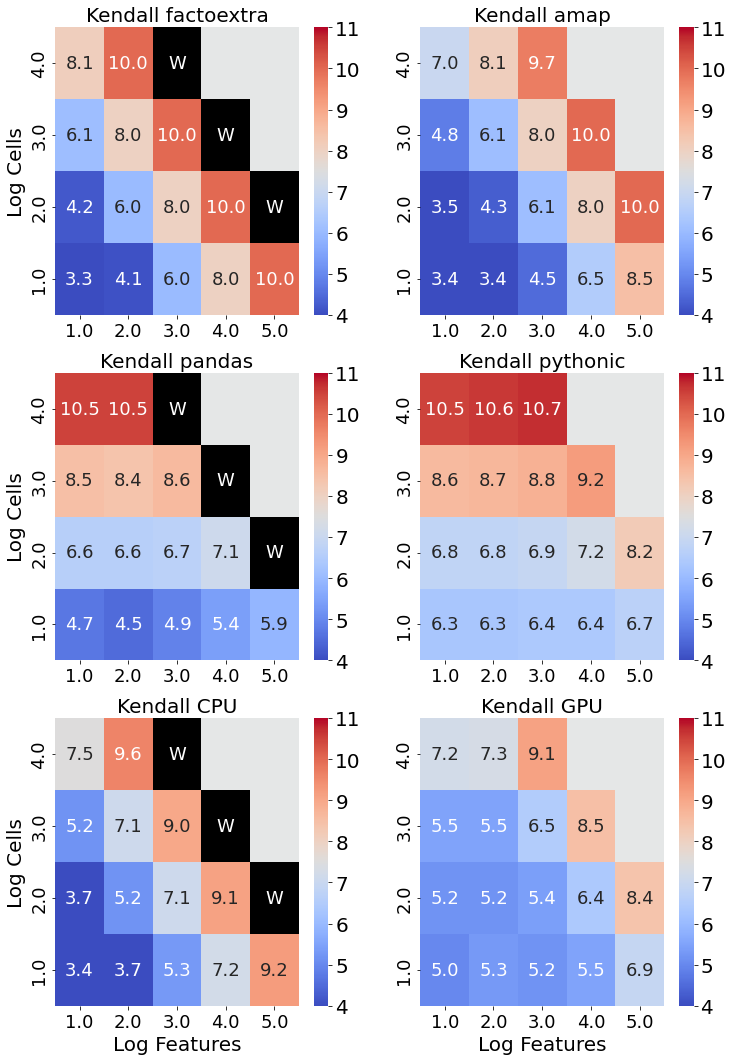

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

for index, metric in enumerate(['kendall']):
    for jndex, method in enumerate(['factoextra', 'amap', 'pandas', 'pythonic', 'CPU', 'GPU']):
        i = jndex // 2
        j = jndex % 2
        set_cells = j == 0
        set_features = i == 2
        draw_matrix(
            matrix=matrices[metric][method],
            title=f'{metric.capitalize()} {method}',
            set_cells=set_cells,
            set_features=set_features,
            annot=labels[metric][method],
            ax=ax[i][j],
        )
        
plt.savefig('figure3.png', bbox_layout='tight', dpi=200)

/tmp/ipykernel_51785/1644507624.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_layout" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('all-heatmaps.png', bbox_layout='tight', dpi=600)


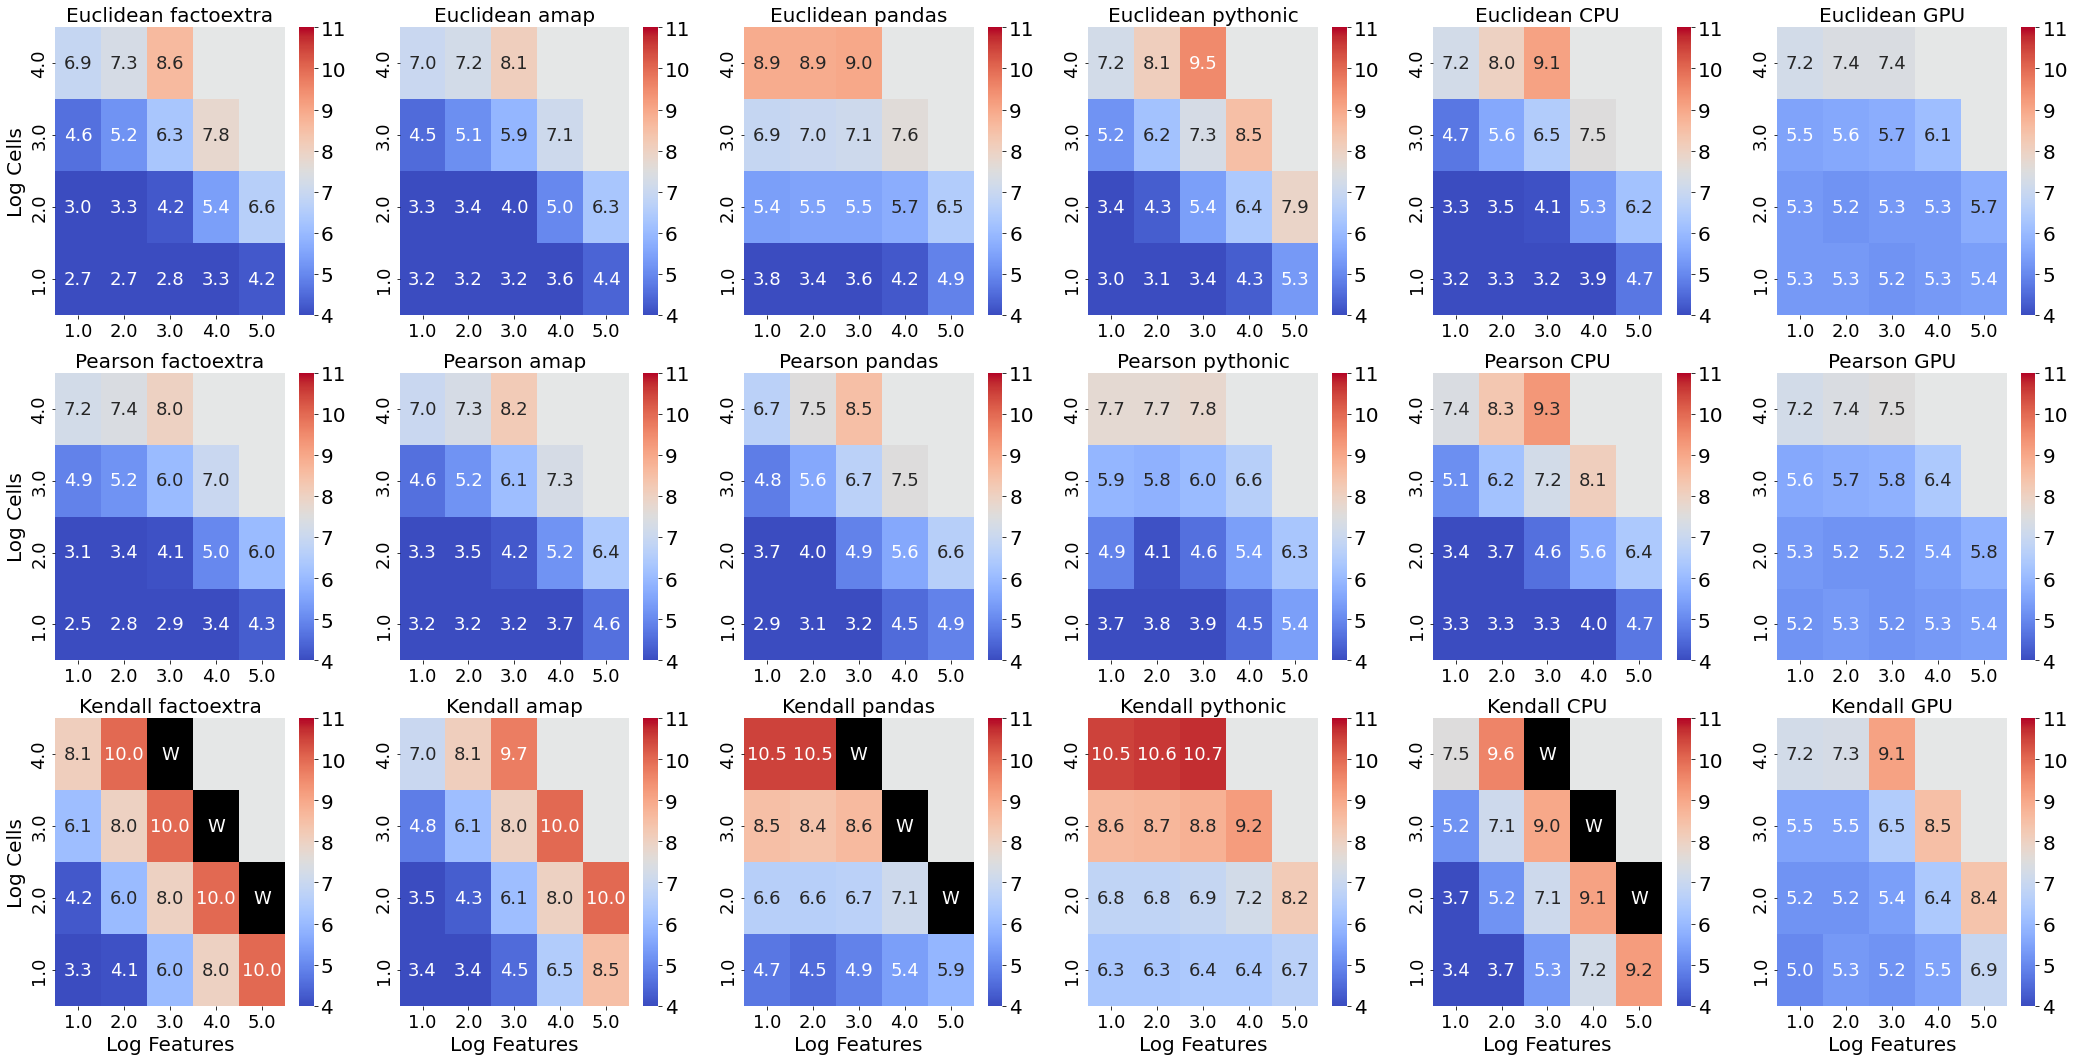

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(36, 18))

for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    for jndex, method in enumerate(['factoextra', 'amap', 'pandas', 'pythonic', 'CPU', 'GPU']):
        set_cells = jndex == 0
        set_features = index == 2
        draw_matrix(
            matrix=matrices[metric][method],
            title=f'{metric.capitalize()} {method}',
            set_cells=set_cells,
            set_features=set_features,
            annot=labels[metric][method],
            ax=ax[index][jndex],
        )
        
plt.savefig('all-heatmaps.png', bbox_layout='tight', dpi=600)

In [26]:
matrices_real['kendall']['GPU']

logWY          1.0          2.0           3.0           4.0           5.0
logWX                                                                    
4.0    14630125.94  18271676.26  1.319078e+09           NaN           NaN
3.0      322146.87    332551.14  3.076906e+06  2.981647e+08           NaN
2.0      169517.40    171202.15  2.312505e+05  2.775762e+06  2.653287e+08
1.0      112037.91    200081.53  1.467766e+05  2.950212e+05  7.530222e+06

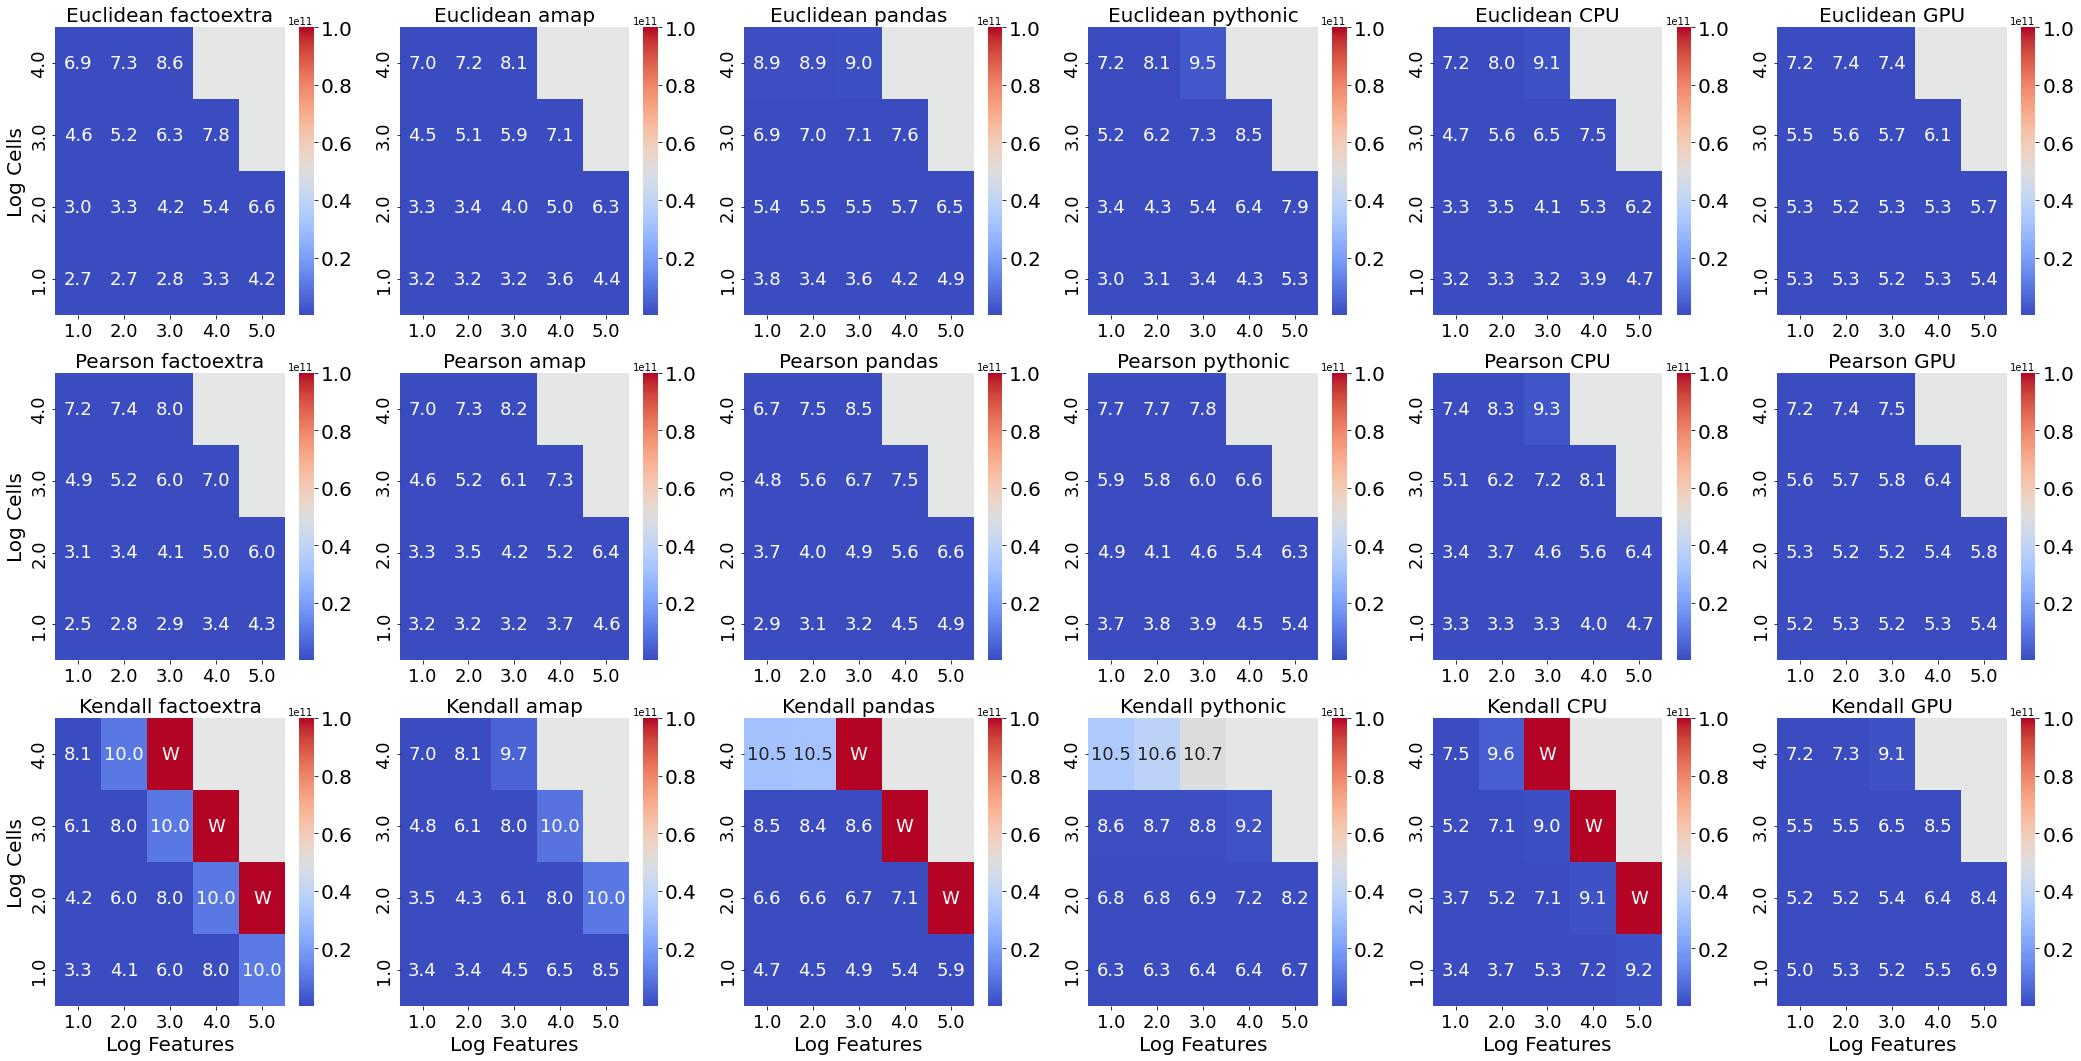

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(36, 18))

for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    for jndex, method in enumerate(['factoextra', 'amap', 'pandas', 'pythonic', 'CPU', 'GPU']):
        set_cells = jndex == 0
        set_features = index == 2
        draw_matrix(
            matrix=matrices_real[metric][method],
            title=f'{metric.capitalize()} {method}',
            set_cells=set_cells,
            set_features=set_features,
            annot=labels[metric][method],
            ax=ax[index][jndex],
            real=True,
        )
        
plt.savefig('all-heatmaps-normal.png', bbox_inches='tight', dpi=600)

In [25]:
df = df[df['|W|'] > 10000]

In [26]:
hue_order = ['amap', 'factoextra', 'pandas','pythonic','CPU','GPU']

In [27]:
TESTED_METHODS = hue_order

In [27]:
df = df[df['|W|'] > 10000]
index = 1000
df_missed = df.copy()

for method in TESTED_METHODS:
    for metric in ['euclidean', 'pearson', 'kendall']:
        for wX in [10, 100, 1000, 10000]:
            for wY in [10, 100, 1000, 10000, 100000]:
                if wX * wY > 10 ** 7 or wX * wY < 10 ** 5:
                    continue
                df_filtered = df[
                    (df.method == method) & (df.wX == wX) & (df.wY == wY) & (df.metric == metric)
                ]
                if df_filtered.shape[0] > 0:
                    continue
                df_missed.loc[index] = {
                    'metric': metric,
                    'method': method,
                    'wX': wX,
                    'wY': wY,
                    'ID': f'{wX}_{wY}',
                    '|W|': wX * wY,
                    'logWX': np.log10(wX),
                    'logWY': np.log10(wY),
                    'logMeanTime': 11.0,
                    'mean': 10 ** 11.0,
                }
                index += 1
#                     print('Missed', method, metric, wX, wY)

NameError: name 'TESTED_METHODS' is not defined

In [28]:
df['ID2'] = df['ID']+'_'+df['metric']
# df2['mean_method_GPU'] = df.groupby('DataFile')['mean'].transform(lambda x: x.mean() / x.mean() == 'GPU')
df_missed['ID2'] = df_missed['ID'] + '_' + df_missed['metric']

In [29]:
df_missed

DataFile     metric      method  \
54   results/GeneratedDense/10_cells_100000_feature...  euclidean        amap   
55   results/GeneratedDense/10_cells_100000_feature...    kendall      pandas   
56   results/GeneratedDense/10_cells_100000_feature...    pearson         GPU   
57   results/GeneratedDense/10_cells_100000_feature...    pearson      pandas   
58   results/GeneratedDense/10_cells_100000_feature...    kendall        amap   
..                                                 ...        ...         ...   
292  results/GeneratedDense/10000_cells_1000_featur...    pearson        amap   
293  results/GeneratedDense/10000_cells_1000_featur...  euclidean         CPU   
294  results/GeneratedDense/10000_cells_1000_featur...    kendall    pythonic   
295  results/GeneratedDense/10000_cells_1000_featur...    kendall         GPU   
296  results/GeneratedDense/10000_cells_1000_featur...    pearson  factoextra   

        wX      wY          ID       |W|  logWX  logWY  logMeanTime  ...  \
54      10  100000   10_100000   1000000    1.0    5.0     4.399135  ...   
55      10  100000   10_100000   1000000    1.0    5.0     5.904157  ...   
56      10  100000   10_100000   1000000    1.0    5.0     5.396440  ...   
57      10  100000   10_100000   1000000    1.0    5.0     4.928782  ...   
58      10  100000   10_100000   1000000    1.0    5.0     8.457894  ...   
..     ...     ...         ...       ...    ...    ...          ...  ...   
292  10000    1000  10000_1000  10000000    4.0    3.0     8.221732  ...   
293  10000    1000  10000_1000  10000000    4.0    3.0     9.148504  ...   
294  10000    1000  10000_1000  10000000    4.0    3.0    10.692380  ...   
295  10000    1000  10000_1000  10000000    4.0    3.0     9.120270  ...   
296  10000    1000  10000_1000  10000000    4.0    3.0     8.041501  ...   

           val_17        val_18        val_19        val_20        val_21  \
54   2.372400e+04  2.385050e+04  2.402375e+04  2.514775e+04  2.537525e+04   
55            NaN           NaN           NaN           NaN           NaN   
56   1.672585e+05  1.786748e+05  1.670158e+05  1.667230e+05  1.674470e+05   
57            NaN           NaN           NaN           NaN           NaN   
58            NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
292  1.690621e+08  1.666779e+08  1.646370e+08  1.680091e+08  1.668089e+08   
293  1.409339e+09  1.411344e+09  1.411137e+09  1.411302e+09  1.410614e+09   
294           NaN           NaN           NaN           NaN           NaN   
295           NaN           NaN           NaN           NaN           NaN   
296  1.098720e+08  1.101298e+08  1.097367e+08  1.105081e+08  1.102158e+08   

           val_22        val_23        val_24        val_25  \
54   2.903525e+04  2.439975e+04  2.389875e+04  2.380075e+04   
55            NaN           NaN           NaN           NaN   
56   1.661935e+05  1.664562e+05  1.674005e+05  1.961788e+05   
57            NaN           NaN           NaN           NaN   
58            NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...   
292  1.669943e+08  1.664345e+08  1.661647e+08  1.661706e+08   
293  1.410362e+09  1.408527e+09  1.412825e+09  1.411507e+09   
294           NaN           NaN           NaN           NaN   
295           NaN           NaN           NaN           NaN   
296  1.103711e+08  1.098862e+08  1.098304e+08  1.098067e+08   

                      ID2  
54    10_100000_euclidean  
55      10_100000_kendall  
56      10_100000_pearson  
57      10_100000_pearson  
58      10_100000_kendall  
..                    ...  
292    10000_1000_pearson  
293  10000_1000_euclidean  
294    10000_1000_kendall  
295    10000_1000_kendall  
296    10000_1000_pearson  

[189 rows x 43 columns]

In [30]:
df_grouped = df_missed.groupby(['method'])
acc = df_grouped.get_group(("GPU"))
v1 =  df_grouped.get_group(("CPU"))
v1.head()
v1["Ratio"] = acc['mean']/v1['mean']
# d3 = pd.DataFrame

results = []
for dat in acc.index:
    for ind in df_missed.index:
        if acc["ID2"][dat] == df_missed['ID2'][ind]:
            results.append({
                'DataFile': df_missed['DataFile'][ind],
                'method': df_missed['method'][ind],
                'metric': df_missed['metric'][ind],
                'acceleration': acc['mean'][dat]/df_missed['mean'][ind], # acc['mean'][dat]/df['mean'][ind],
                'wX': df_missed['wX'][ind],
                'wY': df_missed['wY'][ind],
                'ID': df_missed['ID'][ind],
            })
#             print(df['DataFile'][ind],df['method'][ind],df['metric'][ind],df['mean'][dat]/acc['mean'][ind])

df_acc = pd.DataFrame(results)

/tmp/ipykernel_55776/3558980462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1["Ratio"] = acc['mean']/v1['mean']


In [31]:
df_acc

DataFile    method     metric  \
0    results/GeneratedDense/10_cells_100000_feature...       GPU    pearson   
1    results/GeneratedDense/10_cells_100000_feature...    pandas    pearson   
2    results/GeneratedDense/10_cells_100000_feature...       CPU    pearson   
3    results/GeneratedDense/10_cells_100000_feature...  pythonic    pearson   
4    results/GeneratedDense/10_cells_100000_feature...      amap    pearson   
..                                                 ...       ...        ...   
184  results/GeneratedDense/10000_cells_1000_featur...    pandas  euclidean   
185  results/GeneratedDense/10000_cells_1000_featur...       CPU  euclidean   
186  results/GeneratedDense/10000_cells_1000_featur...      amap    kendall   
187  results/GeneratedDense/10000_cells_1000_featur...  pythonic    kendall   
188  results/GeneratedDense/10000_cells_1000_featur...       GPU    kendall   

     acceleration     wX      wY          ID  
0        1.000000     10  100000   10_100000  
1        2.935338     10  100000   10_100000  
2        5.109554     10  100000   10_100000  
3        0.965145     10  100000   10_100000  
4        6.413690     10  100000   10_100000  
..            ...    ...     ...         ...  
184      0.024933  10000    1000  10000_1000  
185      0.018827  10000    1000  10000_1000  
186      0.236087  10000    1000  10000_1000  
187      0.026785  10000    1000  10000_1000  
188      1.000000  10000    1000  10000_1000  

[189 rows x 7 columns]

In [32]:
acc

DataFile     metric method  \
56   results/GeneratedDense/10_cells_100000_feature...    pearson    GPU   
60   results/GeneratedDense/10_cells_100000_feature...  euclidean    GPU   
70   results/GeneratedDense/10_cells_100000_feature...    kendall    GPU   
91   results/GeneratedDense/1000_cells_10000_featur...    pearson    GPU   
95   results/GeneratedDense/1000_cells_10000_featur...  euclidean    GPU   
103  results/GeneratedDense/1000_cells_10000_featur...    kendall    GPU   
107  results/GeneratedDense/10000_cells_10_features...    pearson    GPU   
111  results/GeneratedDense/10000_cells_10_features...  euclidean    GPU   
121  results/GeneratedDense/10000_cells_10_features...    kendall    GPU   
125  results/GeneratedDense/1000_cells_1000_feature...    pearson    GPU   
129  results/GeneratedDense/1000_cells_1000_feature...  euclidean    GPU   
139  results/GeneratedDense/1000_cells_1000_feature...    kendall    GPU   
161  results/GeneratedDense/100_cells_1000_features...    pearson    GPU   
165  results/GeneratedDense/100_cells_1000_features...  euclidean    GPU   
175  results/GeneratedDense/100_cells_1000_features...    kendall    GPU   
179  results/GeneratedDense/10000_cells_100_feature...    pearson    GPU   
183  results/GeneratedDense/10000_cells_100_feature...  euclidean    GPU   
193  results/GeneratedDense/10000_cells_100_feature...    kendall    GPU   
196  results/GeneratedDense/100_cells_100000_featur...    pearson    GPU   
200  results/GeneratedDense/100_cells_100000_featur...  euclidean    GPU   
208  results/GeneratedDense/100_cells_100000_featur...    kendall    GPU   
212  results/GeneratedDense/100_cells_10000_feature...    pearson    GPU   
216  results/GeneratedDense/100_cells_10000_feature...  euclidean    GPU   
226  results/GeneratedDense/100_cells_10000_feature...    kendall    GPU   
248  results/GeneratedDense/10_cells_10000_features...    pearson    GPU   
252  results/GeneratedDense/10_cells_10000_features...  euclidean    GPU   
262  results/GeneratedDense/10_cells_10000_features...    kendall    GPU   
266  results/GeneratedDense/1000_cells_100_features...    pearson    GPU   
270  results/GeneratedDense/1000_cells_100_features...  euclidean    GPU   
280  results/GeneratedDense/1000_cells_100_features...    kendall    GPU   
283  results/GeneratedDense/10000_cells_1000_featur...    pearson    GPU   
287  results/GeneratedDense/10000_cells_1000_featur...  euclidean    GPU   
295  results/GeneratedDense/10000_cells_1000_featur...    kendall    GPU   

        wX      wY          ID       |W|  logWX  logWY  logMeanTime  ...  \
56      10  100000   10_100000   1000000    1.0    5.0     5.396440  ...   
60      10  100000   10_100000   1000000    1.0    5.0     5.354225  ...   
70      10  100000   10_100000   1000000    1.0    5.0     6.876808  ...   
91    1000   10000  1000_10000  10000000    3.0    4.0     6.385008  ...   
95    1000   10000  1000_10000  10000000    3.0    4.0     6.116864  ...   
103   1000   10000  1000_10000  10000000    3.0    4.0     8.474456  ...   
107  10000      10    10000_10    100000    4.0    1.0     7.241355  ...   
111  10000      10    10000_10    100000    4.0    1.0     7.155410  ...   
121  10000      10    10000_10    100000    4.0    1.0     7.165248  ...   
125   1000    1000   1000_1000   1000000    3.0    3.0     5.848427  ...   
129   1000    1000   1000_1000   1000000    3.0    3.0     5.686403  ...   
139   1000    1000   1000_1000   1000000    3.0    3.0     6.488114  ...   
161    100    1000    100_1000    100000    2.0    3.0     5.239113  ...   
165    100    1000    100_1000    100000    2.0    3.0     5.253474  ...   
175    100    1000    100_1000    100000    2.0    3.0     5.364083  ...   
179  10000     100   10000_100   1000000    4.0    2.0     7.357316  ...   
183  10000     100   10000_100   1000000    4.0    2.0     7.376513  ...   
193  10000     100   10000_100   1000000    4.0    2.0     7.261778  ...   
196    100  10000

In [33]:
df_acc['logAcceleration'] = np.log10(df_acc['acceleration'])
# df_acc['logMinTime']=np.log10(df_acc['minTime'])
# df_acc['logMaxTime']=np.log10(df_acc['maxTime'])
df_acc['|W|'] = df_acc['wX']*df_acc['wY']
df_acc['Method'] = df_acc['metric']+'_'+df_acc['method']

In [34]:
TESTED_METHODS = ["CPU","pythonic","pandas","factoextra","amap"]

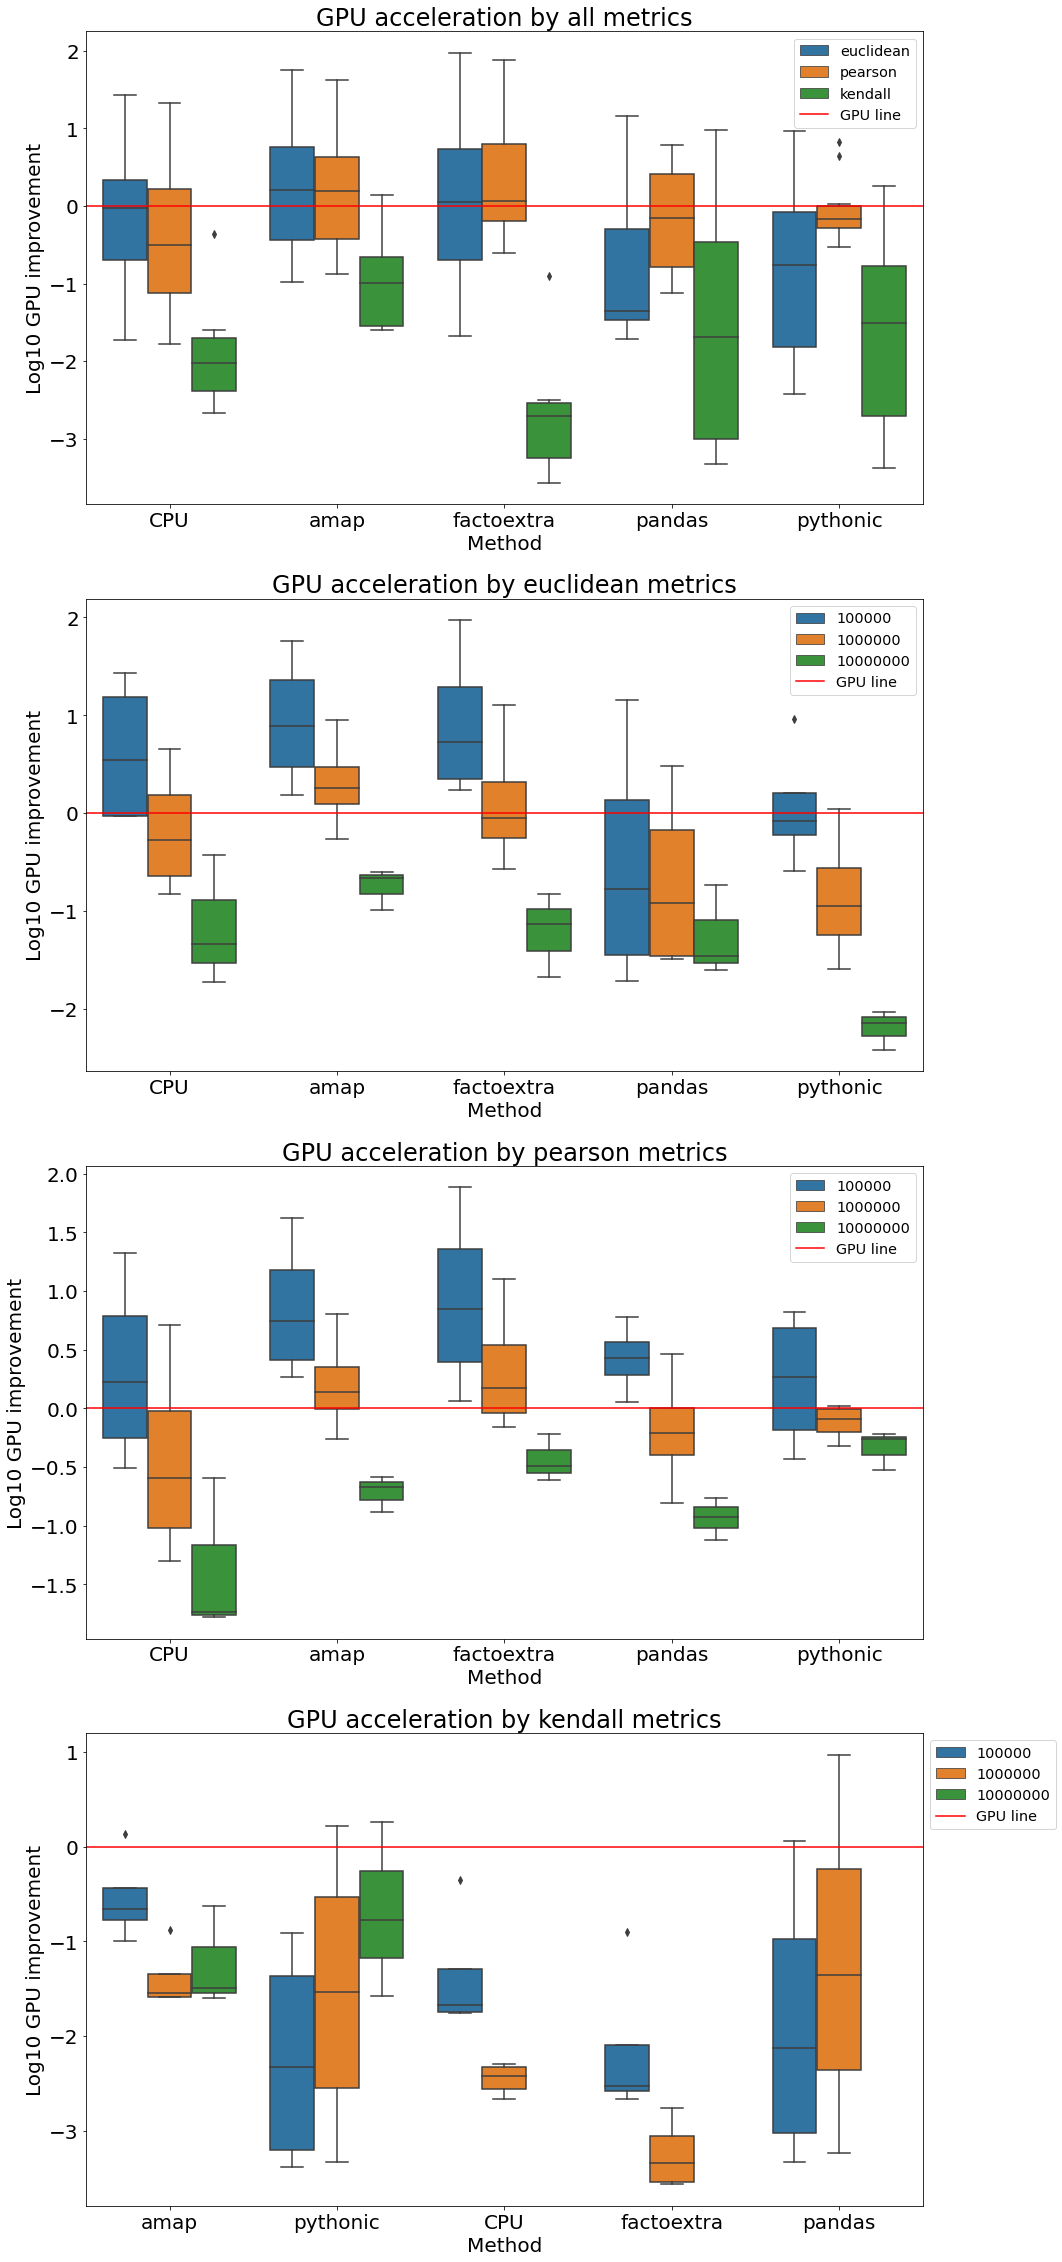

In [35]:
figure, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 40))

for index, metric in enumerate(['all', 'euclidean', 'pearson', 'kendall']):
    
    size_data_filtered = df_acc[df_acc['method'].isin(TESTED_METHODS)]
    if metric != 'all':
        size_data_filtered = size_data_filtered[
            size_data_filtered['metric'].isin([metric])
        ]
    
    current_ax = ax[index]
    size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])
    
    if metric == 'all':
        hue = 'metric'
    else:
        hue = '|W|'
    plot = sns.boxplot(
        ax=current_ax,
        data=size_data_filtered,x='method',hue=hue,y='logAcceleration')
    plot.axhline(y=0.0, color='r', linestyle='-',label="GPU line")

    current_ax.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
    plot.set_title(f'GPU acceleration by {metric} metrics', fontsize=24)
    plot.set_xlabel('Method', fontsize=20)
    plot.set_ylabel('Log10 GPU improvement', fontsize=20)
    current_ax.tick_params(labelsize=20)

plt.savefig(f'all-dense-acceleration.png',dpi=600)

In [36]:
import os

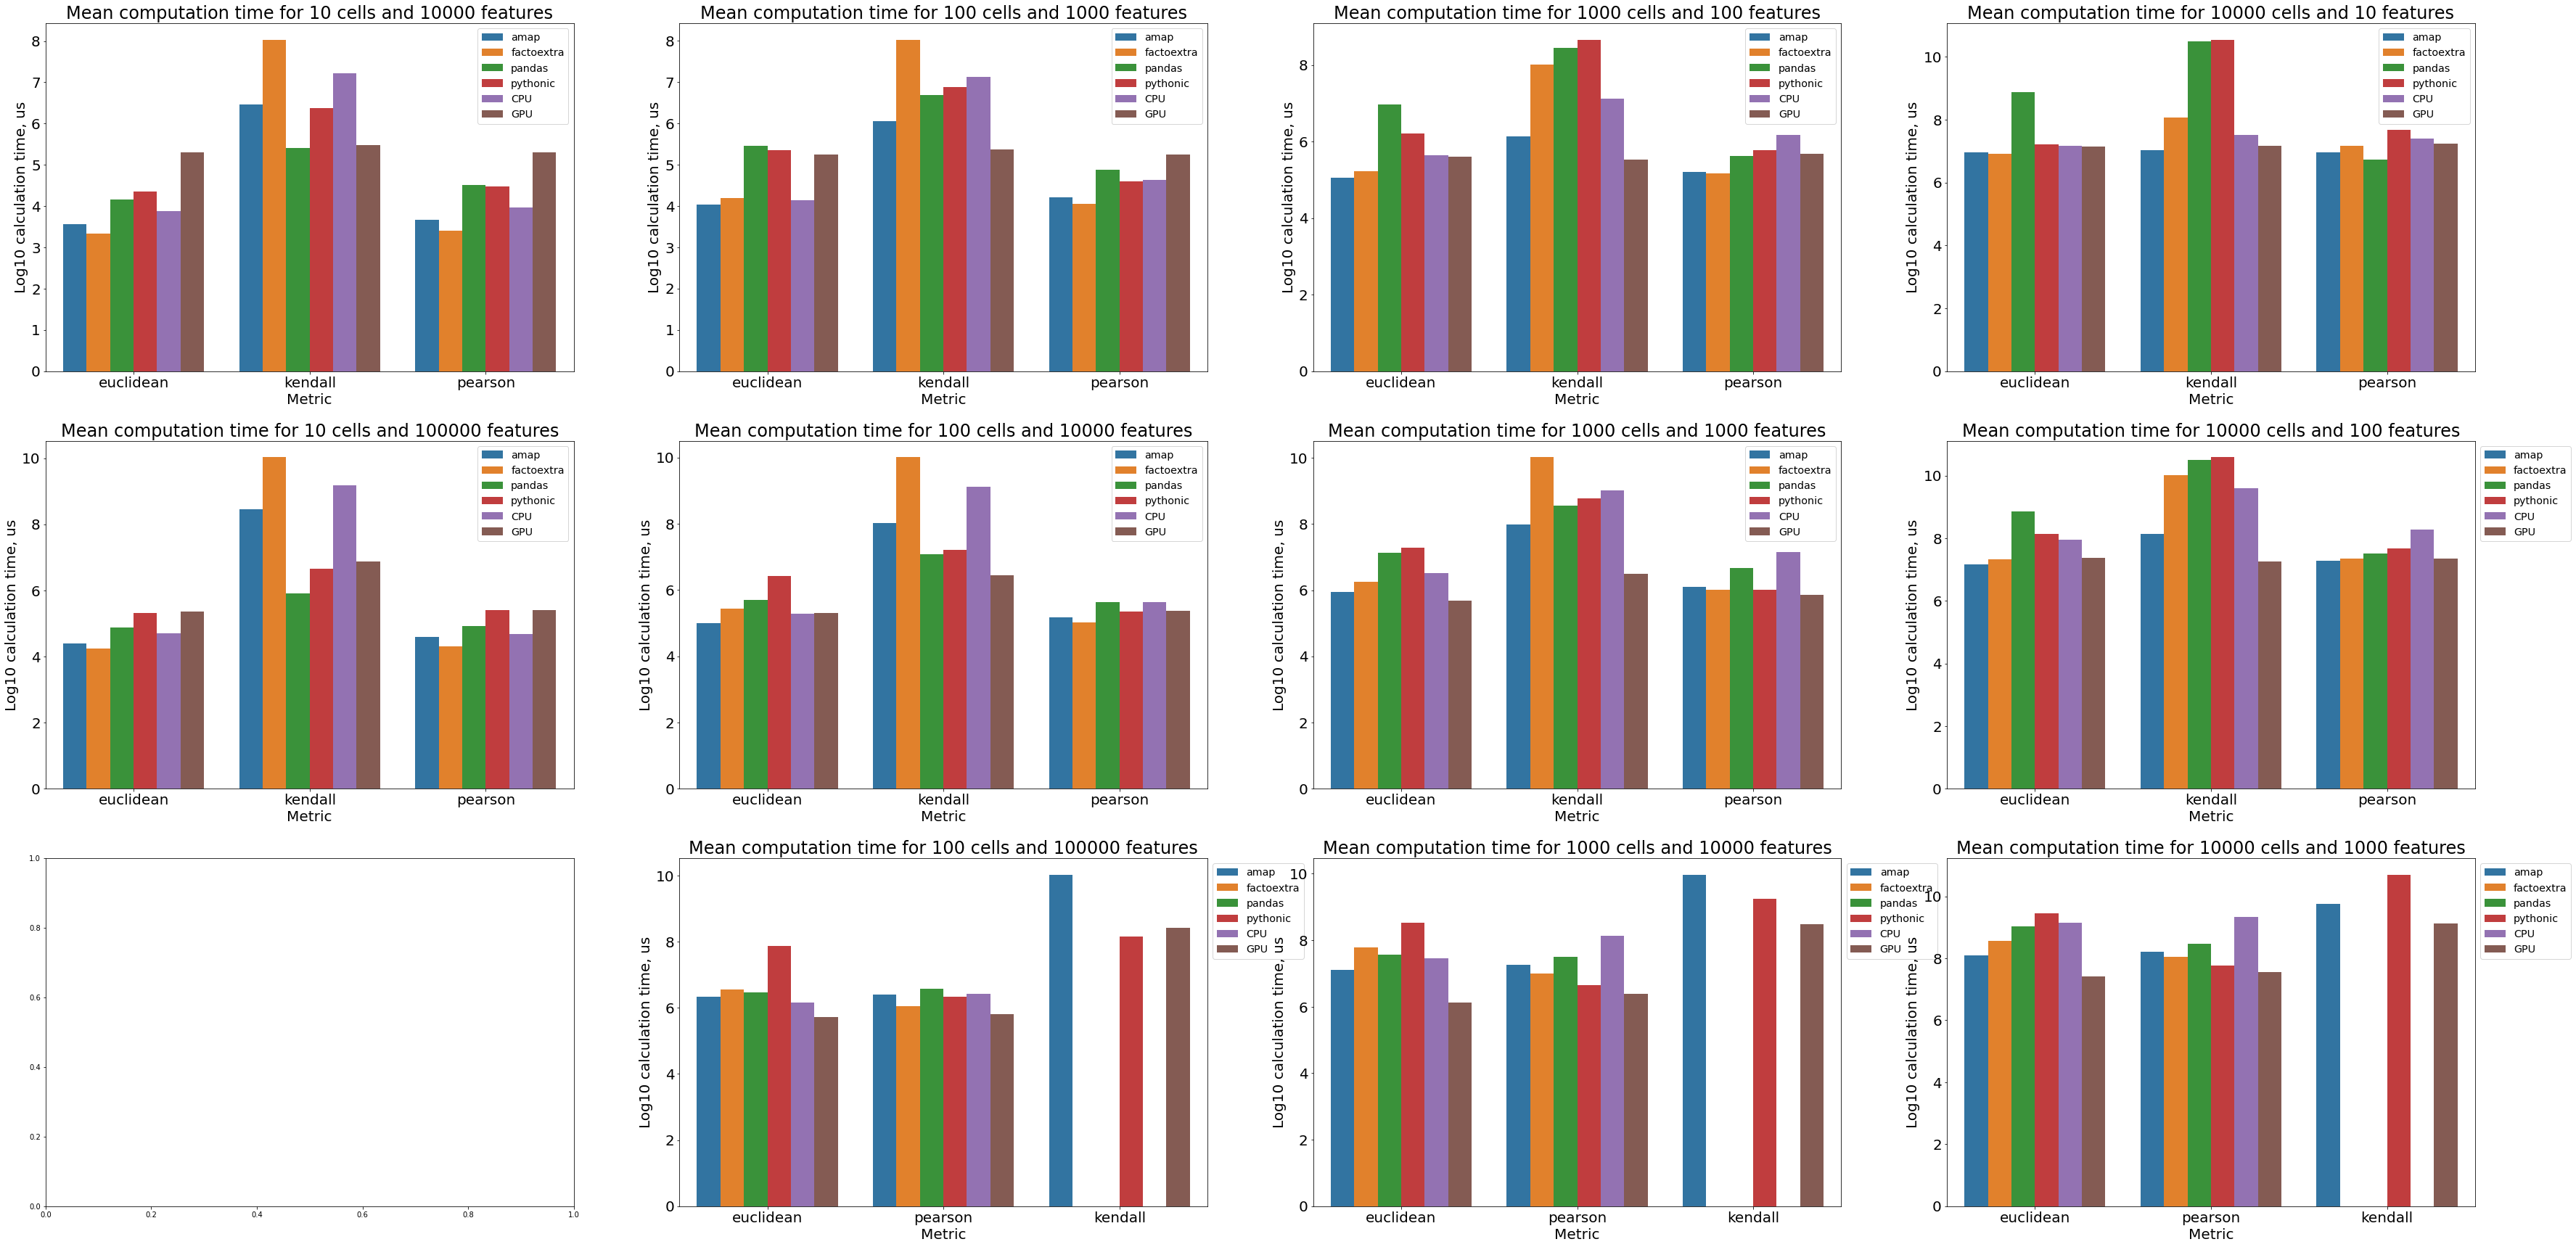

In [37]:
figure, ax = plt.subplots(nrows=3, ncols=4, figsize=(60, 30))
for log_cells in range(1, 5):
    for log_features in range(1, 6):
        if log_cells + log_features < 5 or log_cells + log_features > 7:
            continue
        


        size1_data_filtered = df[df['logWX'].isin([log_cells])]
        size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([log_features])]
        plot = sns.barplot(ax=ax[log_features + log_cells - 5, log_cells - 1], data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logMeanTime')

        plot.set_title(f'Mean computation time for {10 ** log_cells} cells and {10 ** log_features} features', fontsize=24)
        plot.set_xlabel('Metric', fontsize=20)
        plot.set_ylabel('Log10 calculation time, us', fontsize=20)

        ax[log_features + log_cells - 5, log_cells - 1].tick_params(labelsize=20)
        plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))

plt.savefig(f'all-dense-bars.png',dpi=600)

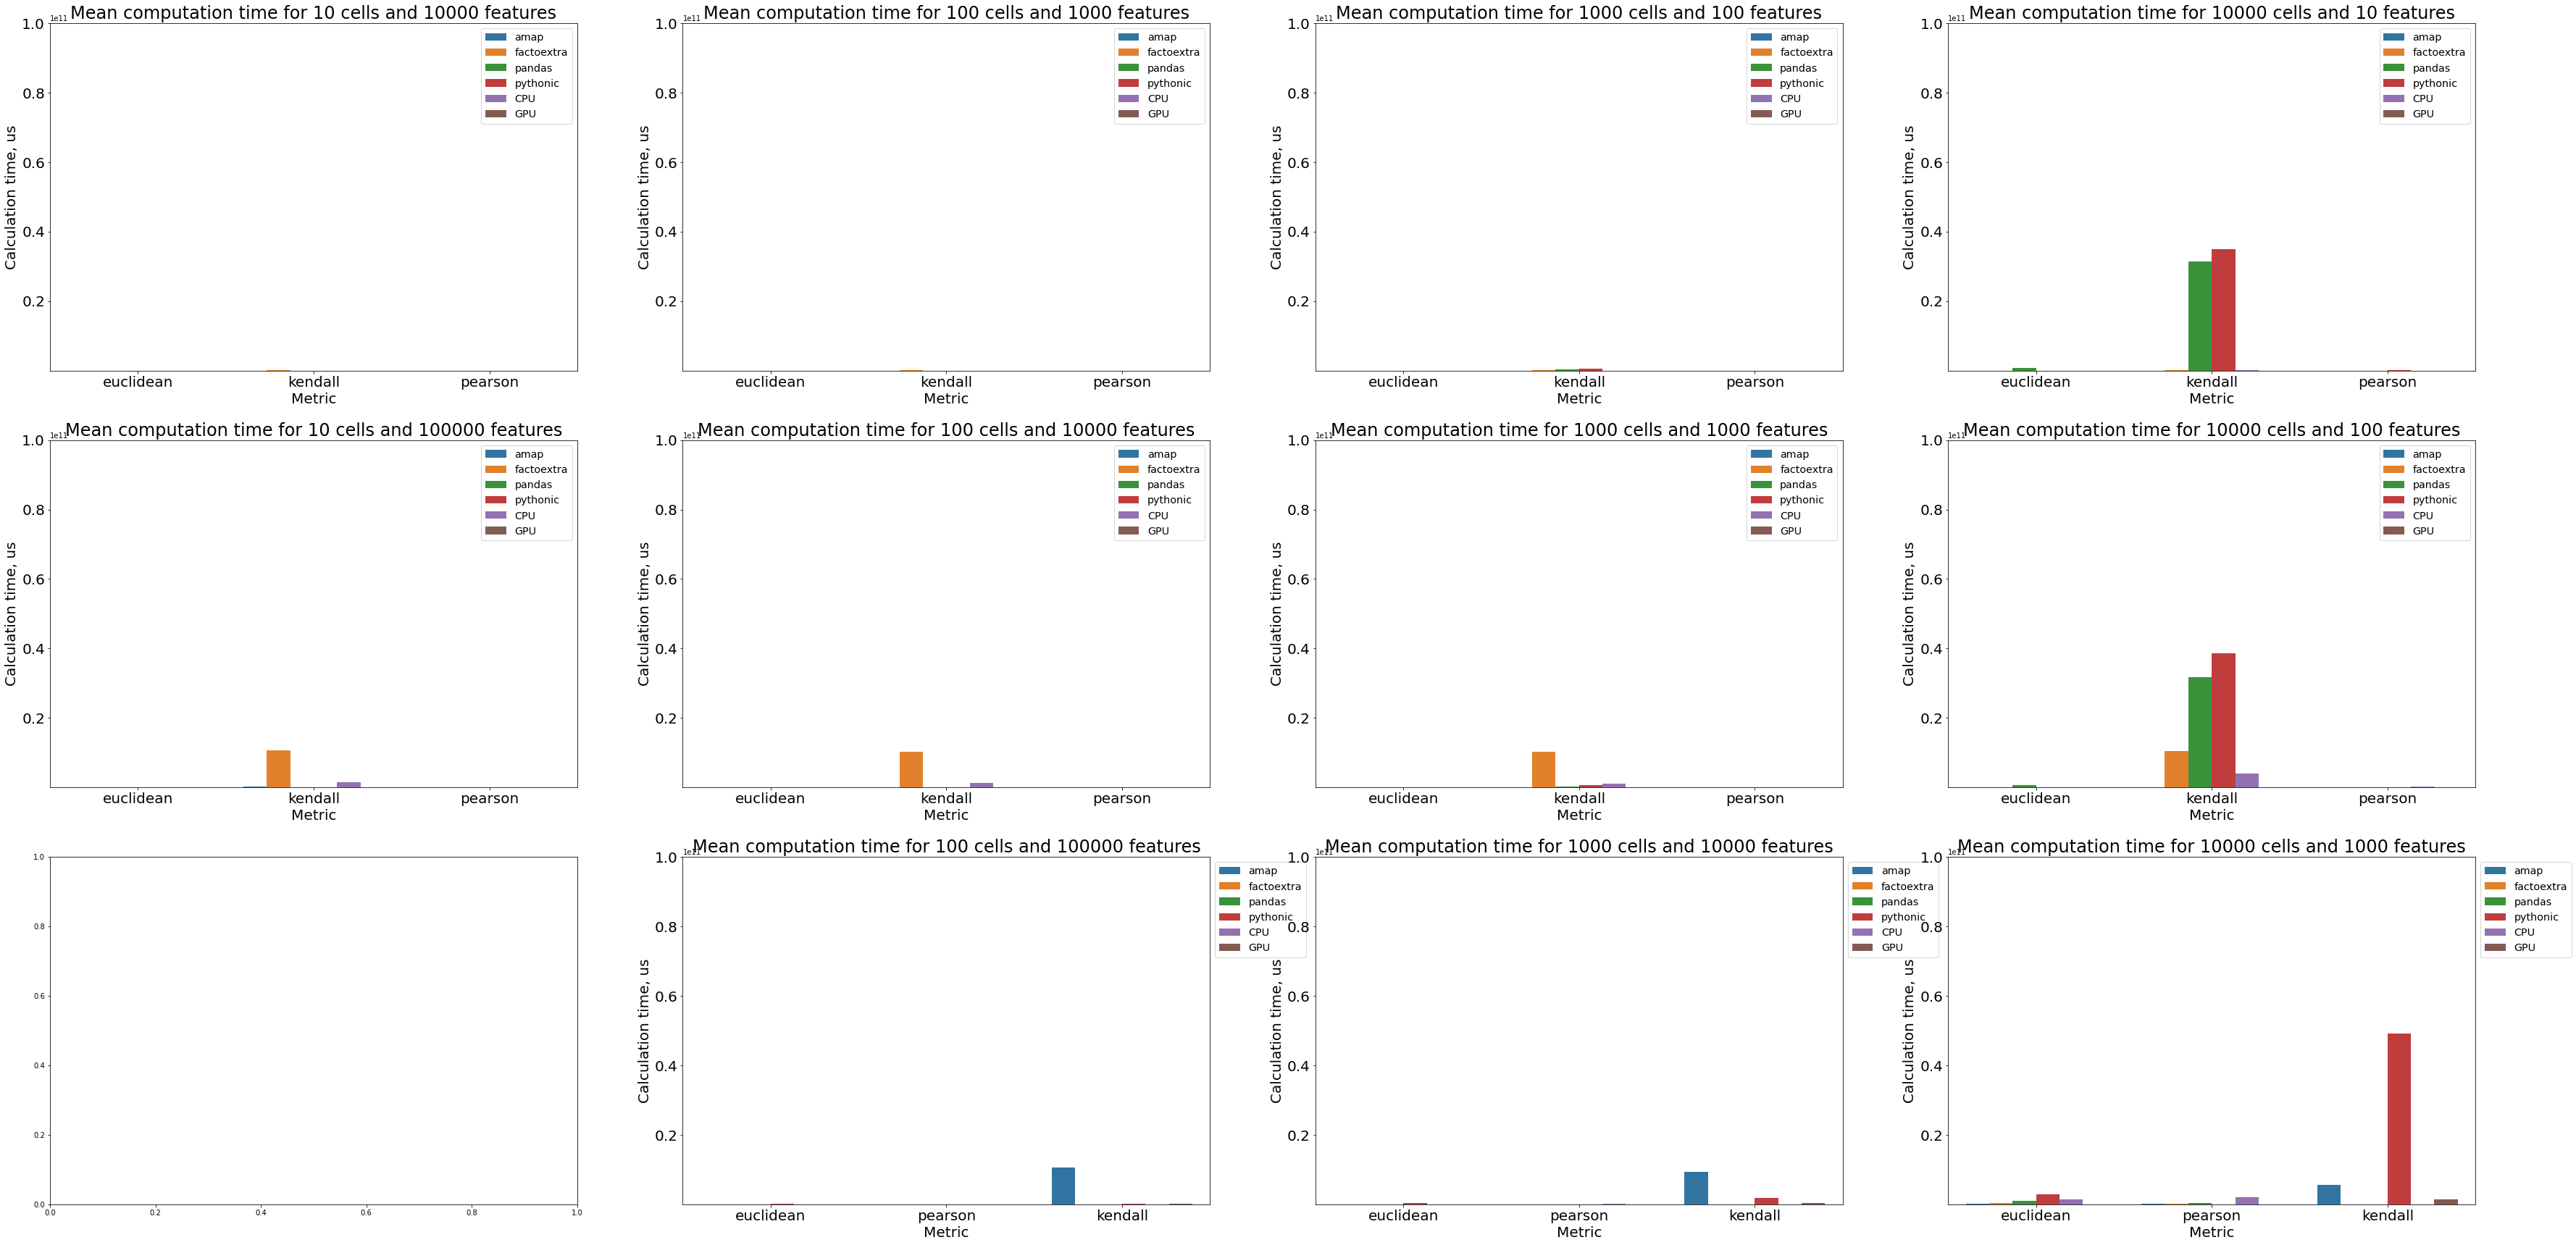

In [38]:
figure, ax = plt.subplots(nrows=3, ncols=4, figsize=(60, 30))
for log_cells in range(1, 5):
    for log_features in range(1, 6):
        if log_cells + log_features < 5 or log_cells + log_features > 7:
            continue
        


        size1_data_filtered = df[df['logWX'].isin([log_cells])]
        size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([log_features])]
        plot = sns.barplot(ax=ax[log_features + log_cells - 5, log_cells - 1], data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='mean')

        plot.set_title(f'Mean computation time for {10 ** log_cells} cells and {10 ** log_features} features', fontsize=24)
        plot.set_xlabel('Metric', fontsize=20)
        plot.set_ylabel('Calculation time, us', fontsize=20)
        plot.set_ylim(10**5, 10**11)

        ax[log_features + log_cells - 5, log_cells - 1].tick_params(labelsize=20)
        plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))

plt.savefig(f'all-dense-bars-normal.png',dpi=600)

NameError: name 'IMG_PATH' is not defined

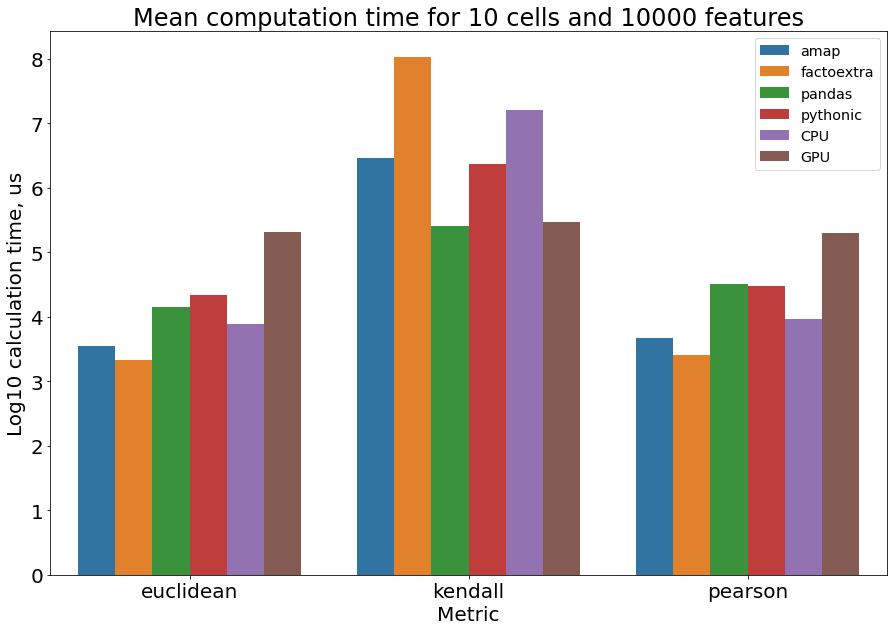

In [39]:
figure, ax = plt.subplots(figsize=(15, 10))

log_cells = 1
log_features = 4

size1_data_filtered = df[df['logWX'].isin([log_cells])]
size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([log_features])]
plot = sns.barplot(data=size_data_filtered,x='metric',hue="method",hue_order=hue_order,y='logMeanTime')

plot.set_title(f'Mean computation time for {10 ** log_cells} cells and {10 ** log_features} features', fontsize=24)
plot.set_xlabel('Metric', fontsize=20)
plot.set_ylabel('Log10 calculation time, us', fontsize=20)

ax.tick_params(labelsize=20)
plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
plt.savefig(f'{IMG_PATH}barplot_bench_generated_all_on_X{log_cells}_y{log_features}.png',dpi=200)

In [233]:
!mkdir -p all-dense-w

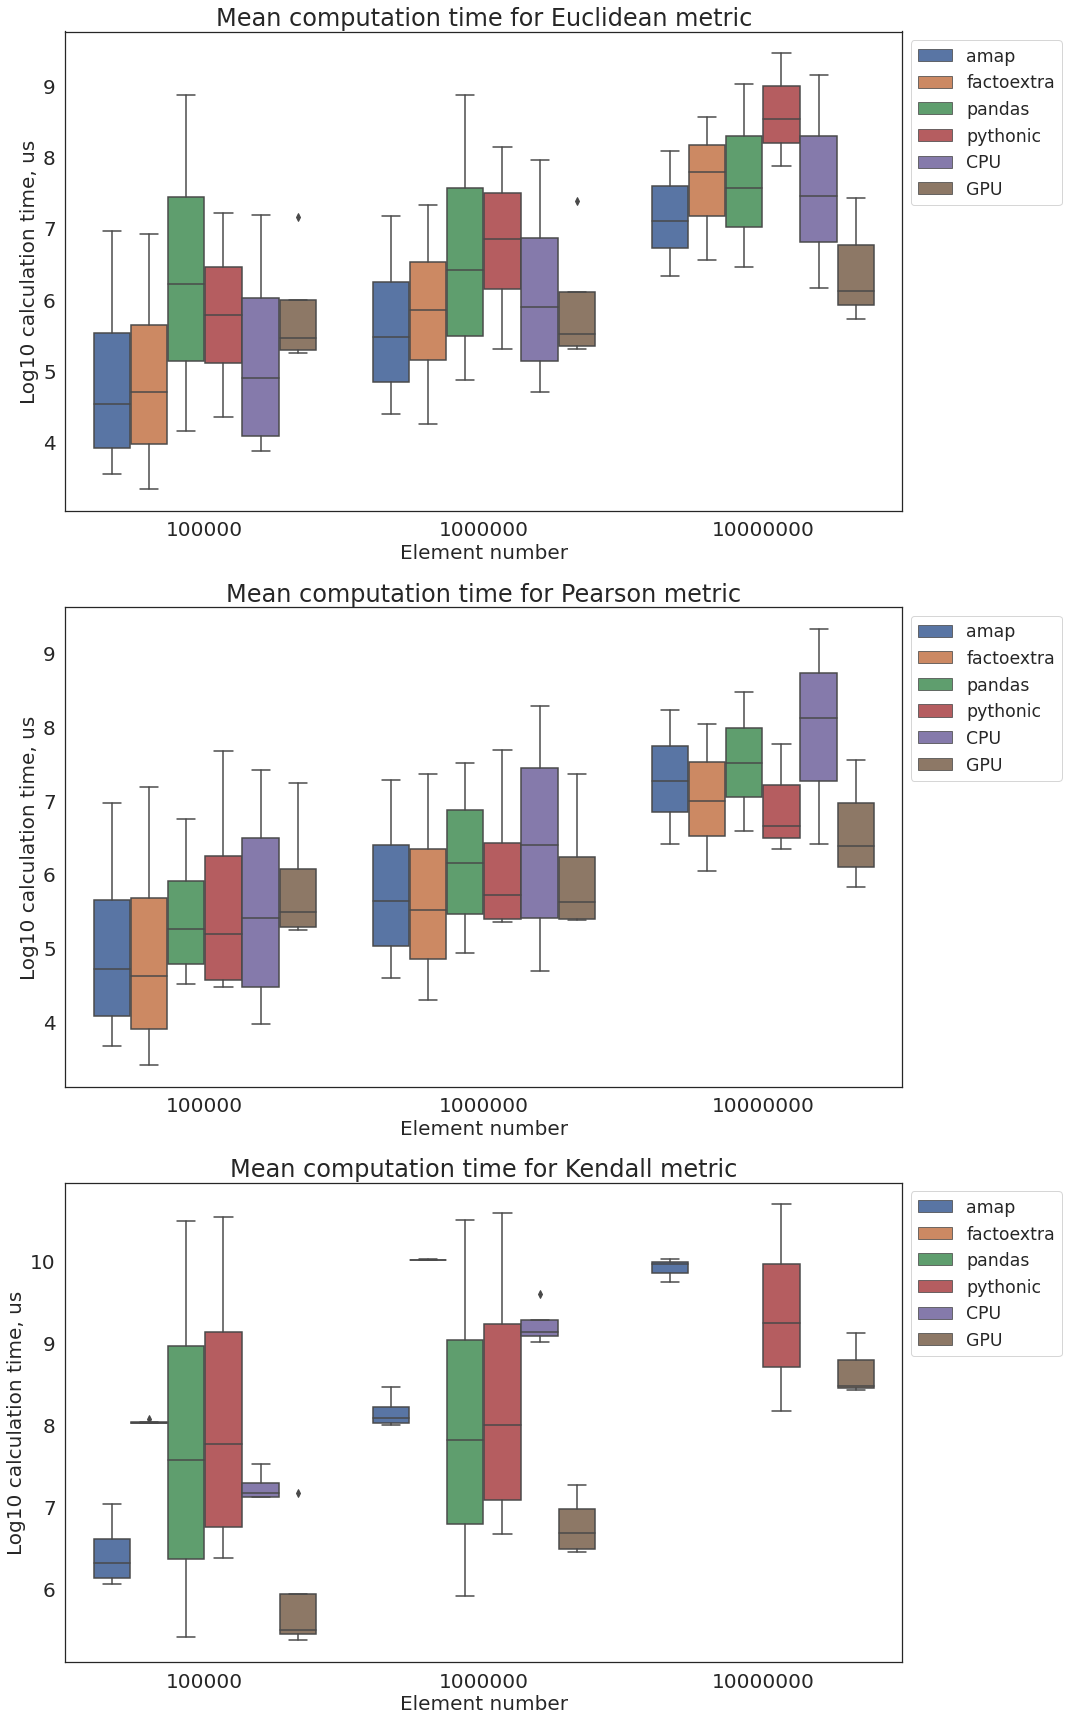

In [739]:
figure, ax = plt.subplots(nrows=3, figsize=(15, 30))
for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    
    kendall_data_filtered = df[df['metric'] == metric]
    plot = sns.boxplot(ax=ax[index], data=kendall_data_filtered,x='|W|',hue="method",hue_order=hue_order,y='logMeanTime')

    plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
    plot.set_xlabel('Element number', fontsize=20)
    plot.set_ylabel('Log10 calculation time, us', fontsize=20)

    ax[index].tick_params(labelsize=20)
    plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
plt.savefig(f'all-dense-w.png',dpi=200,  bbox_inches = 'tight')

# Figure 2 (all-dense-w + all-dense-acceleration)

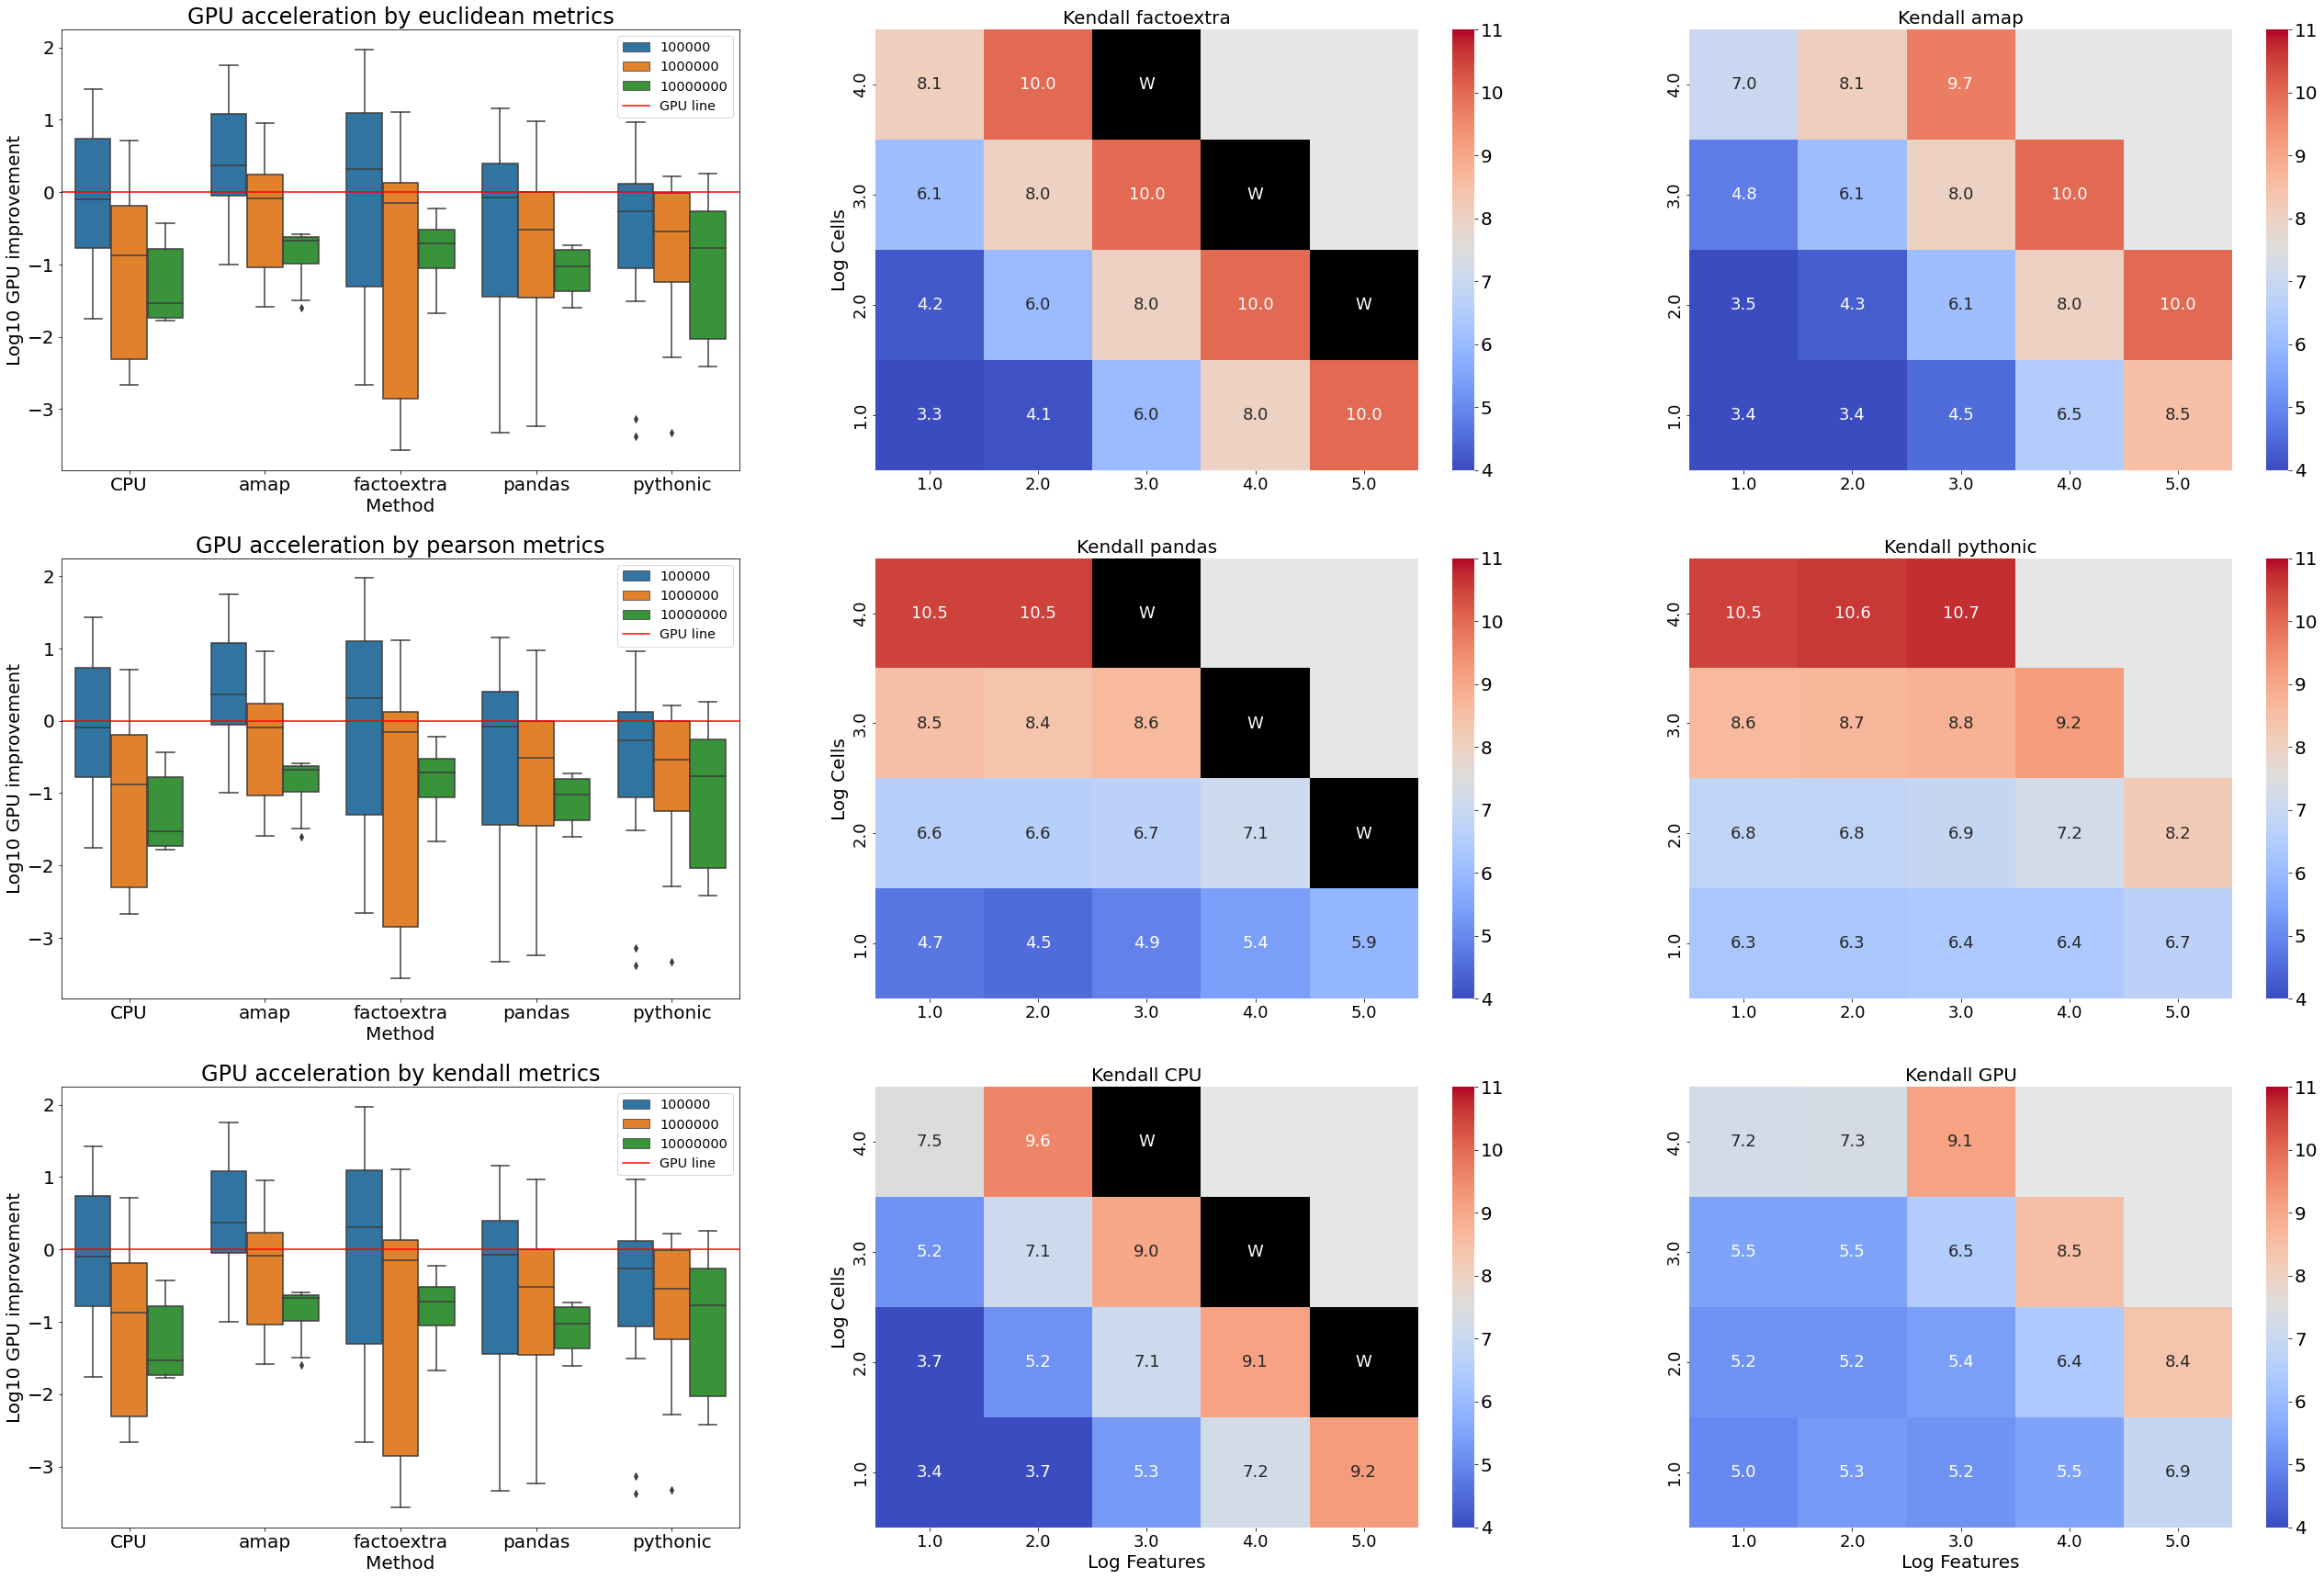

In [42]:
figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(45, 30))



for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    
    size_data_filtered = df_acc[df_acc['method'].isin(TESTED_METHODS)]
    
    # Second column
    current_ax = ax[index][0]
    size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])
    
    
    hue = '|W|'
    plot = sns.boxplot(
        ax=current_ax,
        data=size_data_filtered,x='method',hue=hue,y='logAcceleration')
    plot.axhline(y=0.0, color='r', linestyle='-',label="GPU line")

    current_ax.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
    plot.set_title(f'GPU acceleration by {metric} metrics', fontsize=24)
    plot.set_xlabel('Method', fontsize=20)
    plot.set_ylabel('Log10 GPU improvement', fontsize=20)
    current_ax.tick_params(labelsize=20)

for index, metric in enumerate(['kendall']):
    for jndex, method in enumerate(['factoextra', 'amap', 'pandas', 'pythonic', 'CPU', 'GPU']):
        i = jndex // 2
        j = jndex % 2
        set_cells = j == 0
        set_features = i == 2
        draw_matrix(
            matrix=matrices[metric][method],
            title=f'{metric.capitalize()} {method}',
            set_cells=set_cells,
            set_features=set_features,
            annot=labels[metric][method],
            ax=ax[i][j + 1],
        )
plt.savefig(f'figure2-v2.png',dpi=200)

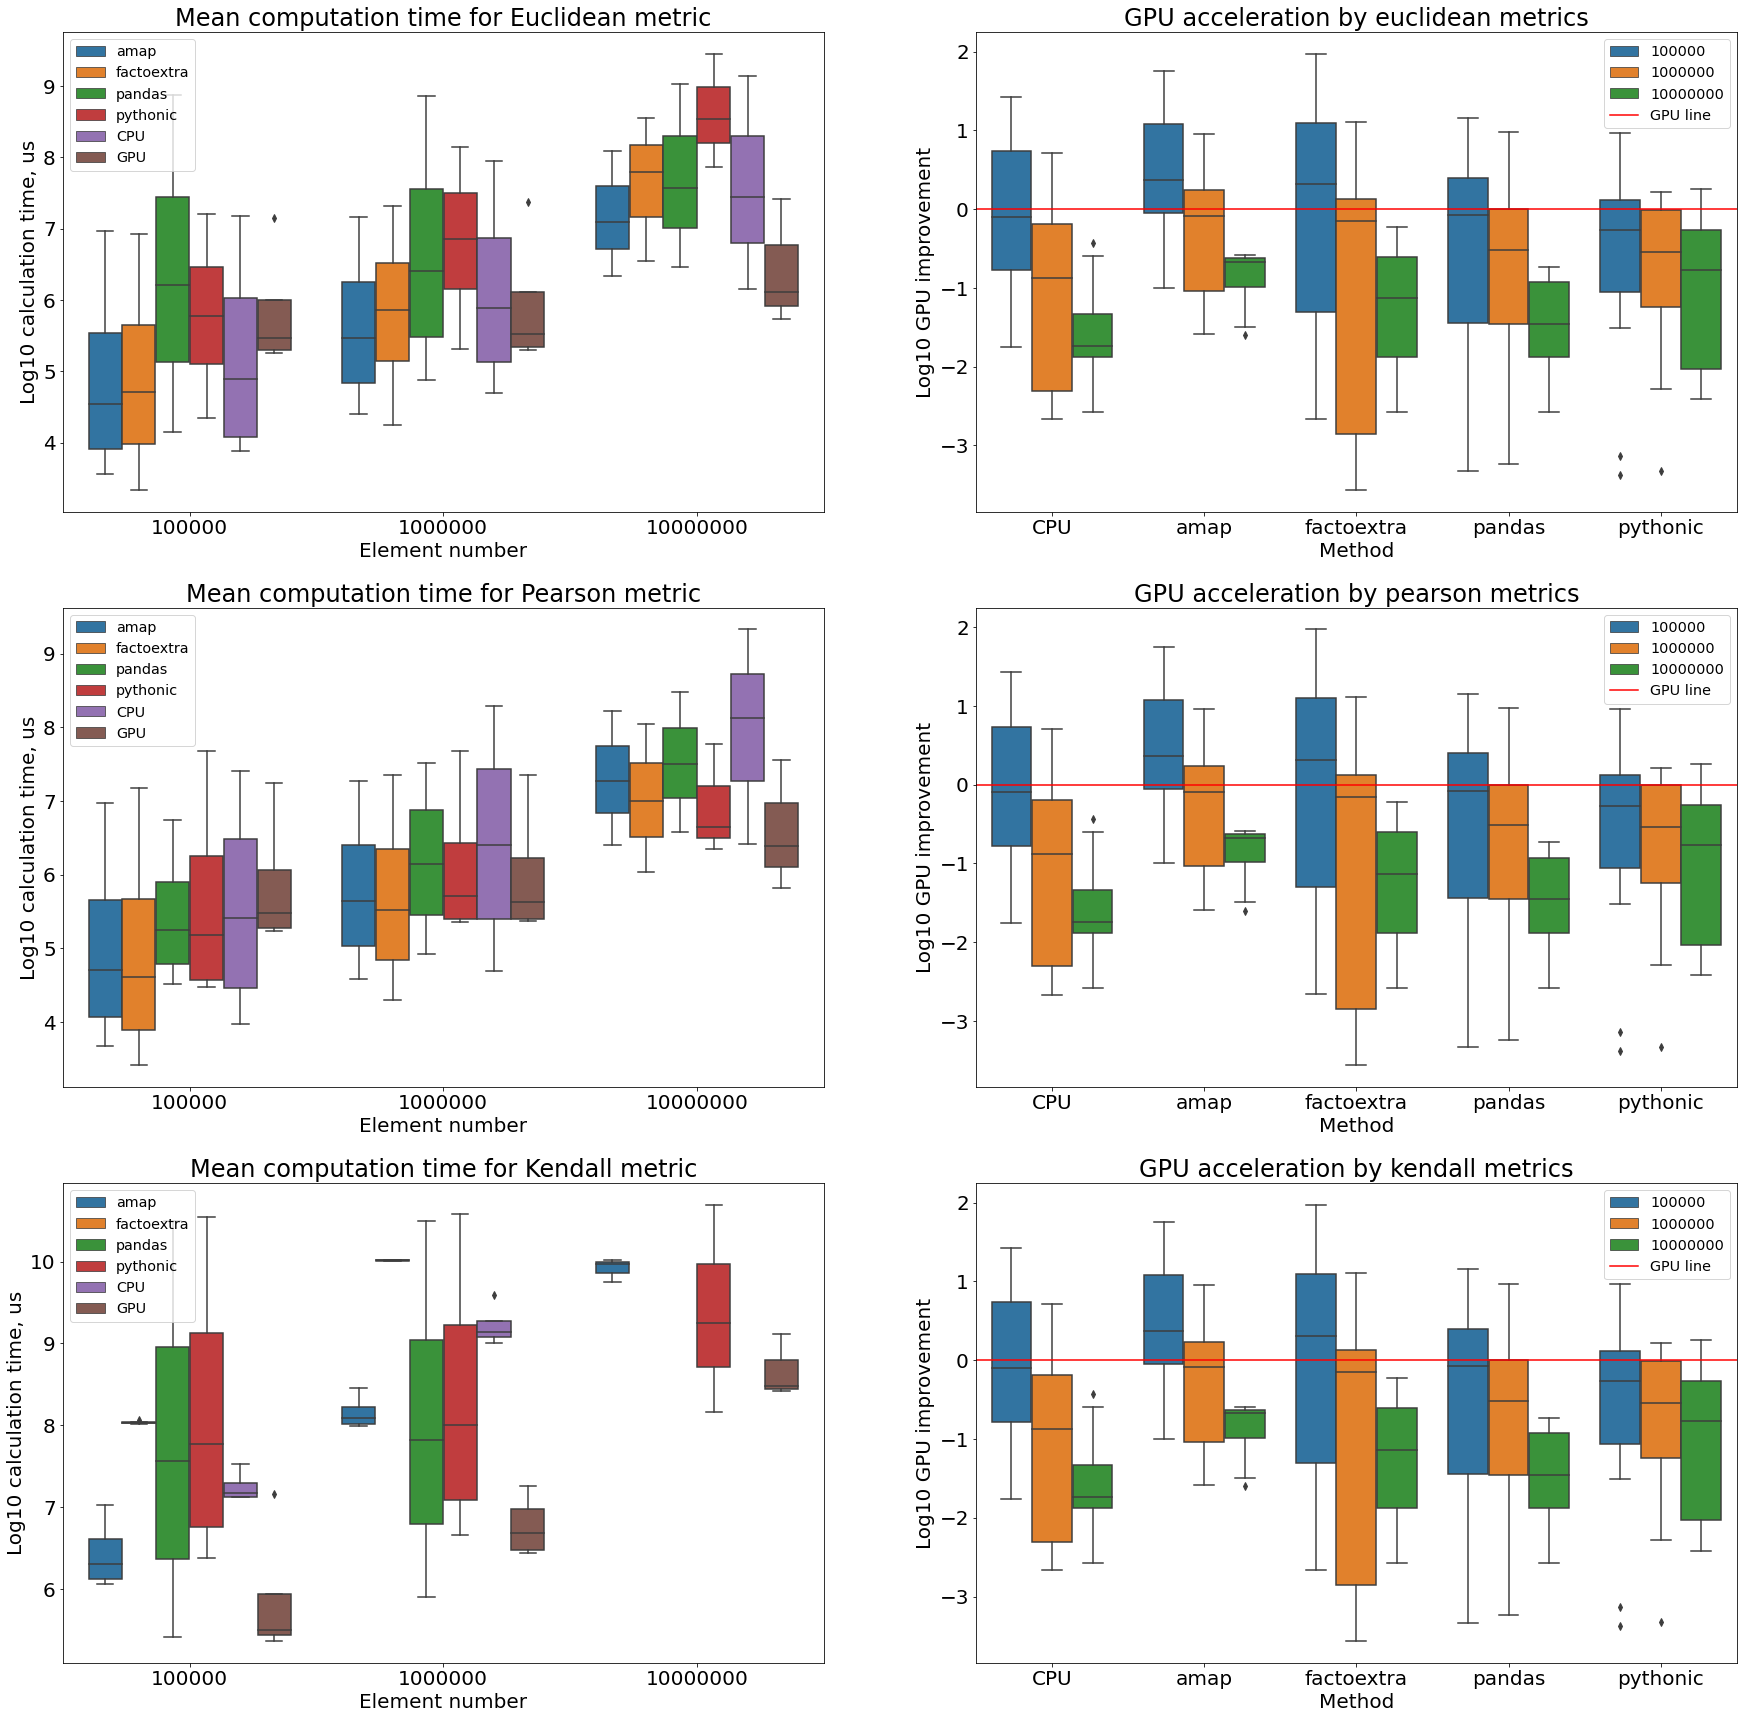

In [37]:
figure, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    # first columns
    current_ax = ax[index][0]
    kendall_data_filtered = df[df['metric'] == metric]
    plot = sns.boxplot(
        ax=current_ax,
        data=kendall_data_filtered,
        x='|W|',
        hue="method",
        hue_order=hue_order,
        y='logMeanTime'
    )

    plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
    plot.set_xlabel('Element number', fontsize=20)
    plot.set_ylabel('Log10 calculation time, us', fontsize=20)

    current_ax.tick_params(labelsize=20)
    plot.legend(fontsize='x-large', loc='upper left')
    
    size_data_filtered = df_acc[df_acc['method'].isin(TESTED_METHODS)]
    
    # Second column
    current_ax = ax[index][1]
    size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])
    
    
    hue = '|W|'
    plot = sns.boxplot(
        ax=current_ax,
        data=size_data_filtered,x='method',hue=hue,y='logAcceleration')
    plot.axhline(y=0.0, color='r', linestyle='-',label="GPU line")

    current_ax.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
    plot.set_title(f'GPU acceleration by {metric} metrics', fontsize=24)
    plot.set_xlabel('Method', fontsize=20)
    plot.set_ylabel('Log10 GPU improvement', fontsize=20)
    current_ax.tick_params(labelsize=20)

plt.savefig(f'figure2.png',dpi=200)

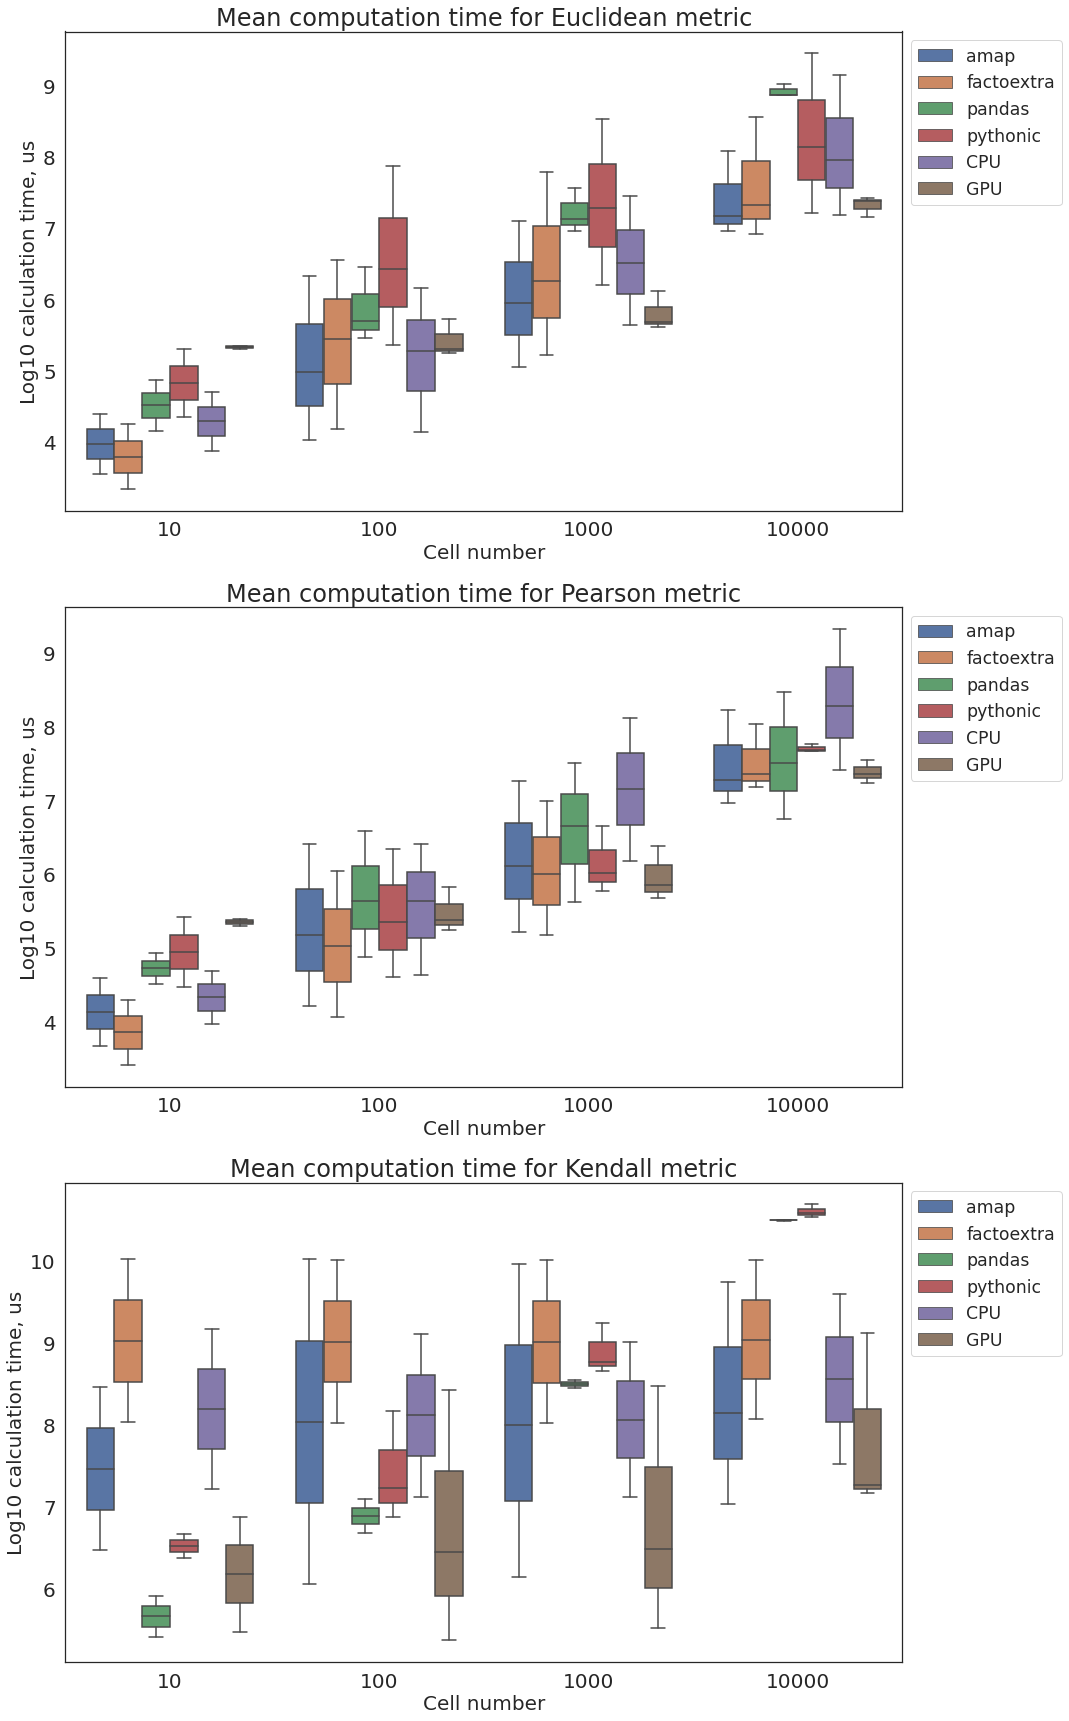

In [625]:
# os.makedirs('all-dense-x-boxplots')
figure, ax = plt.subplots(nrows=3, figsize=(15, 30))
for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    kendall_data_filtered = df[df['metric'] == metric]
    plot = sns.boxplot(ax=ax[index], data=kendall_data_filtered,x='wX',hue="method",hue_order=hue_order,y='logMeanTime')
    plot.set_xlabel('Cell number', fontsize=20)
    plot.set_ylabel('Log10 calculation time, us', fontsize=20)
    sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))
    #plt.tight_layout()
    plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
    ax[index].tick_params(labelsize=20)
    plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
    # plt.xticks(rotation=90)
plt.savefig(f'all-across-x-boxplots.png',dpi=600,  bbox_inches = 'tight')

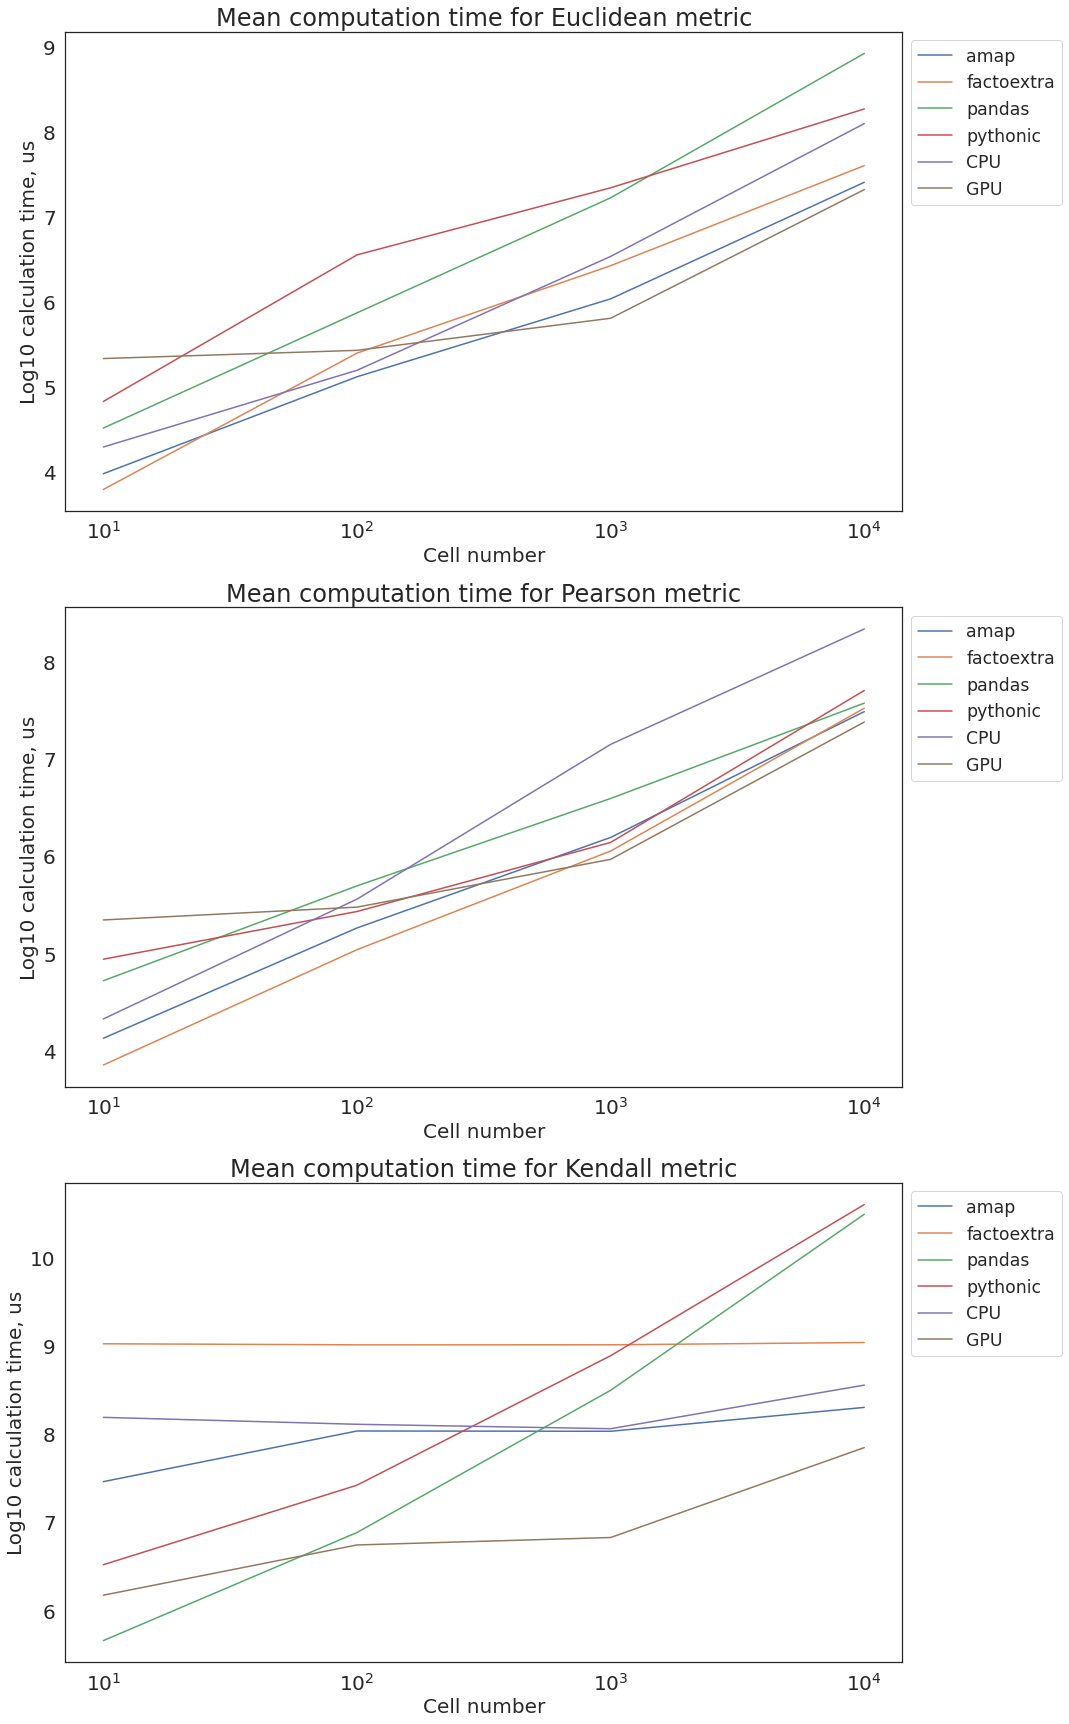

In [627]:
os.makedirs('all-dense-x-lines', exist_ok=True)
figure, ax = plt.subplots(nrows=3, figsize=(15, 30))
for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    kendall_data_filtered = df[df['metric'] == metric]
    plot = sns.lineplot(ci=None, ax=ax[index], data=kendall_data_filtered,x='wX',hue="method",hue_order=hue_order,y='logMeanTime')
    plot.set(xscale='log')
    plot.set_xlabel('Cell number', fontsize=20)
    plot.set_ylabel('Log10 calculation time, us', fontsize=20)
    sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))
    #plt.tight_layout()
    plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
    ax[index].tick_params(labelsize=20)
    plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
    # plt.xticks(rotation=90)
plt.savefig(f'all-across-x-lines.png',dpi=600,  bbox_inches = 'tight')

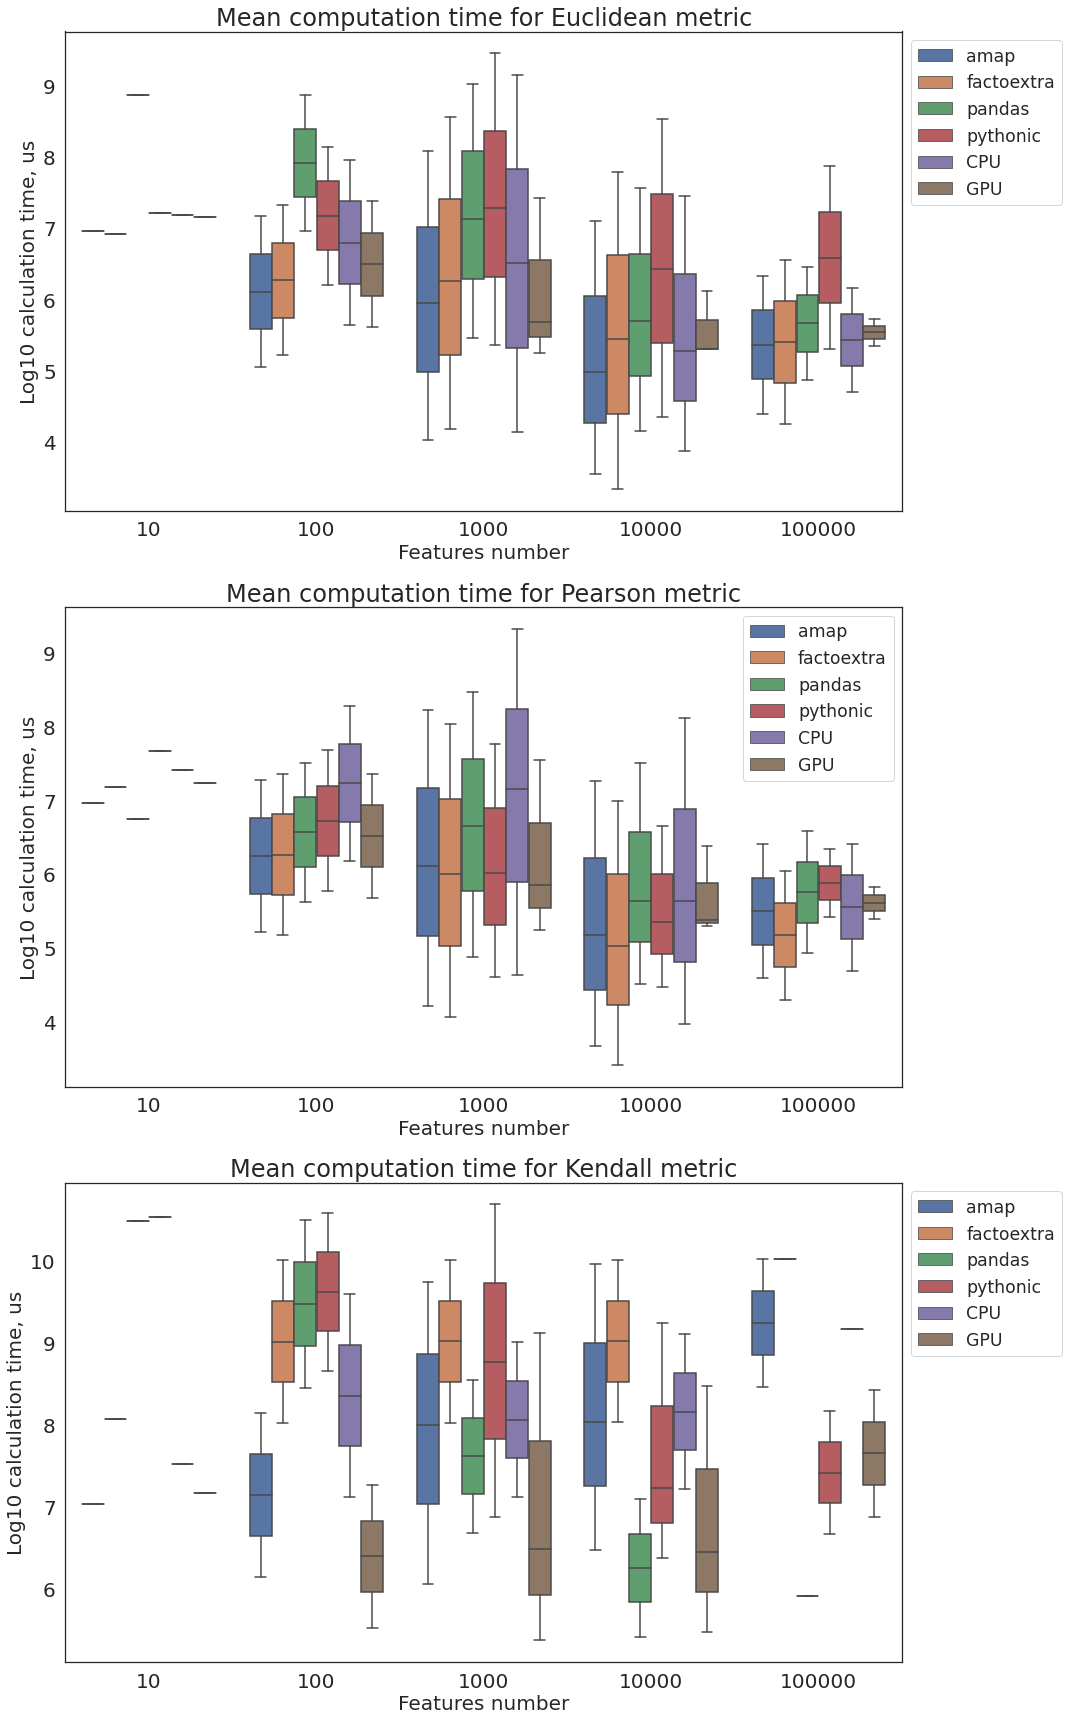

In [628]:
figure, ax = plt.subplots(nrows=3, figsize=(15, 30))
for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    kendall_data_filtered = df[df['metric'] == metric]
    plot = sns.boxplot(ax=ax[index], data=kendall_data_filtered,x='wY',hue="method",hue_order=hue_order,y='logMeanTime')
    plot.set_xlabel('Features number', fontsize=20)
    plot.set_ylabel('Log10 calculation time, us', fontsize=20)
    sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))
    #plt.tight_layout()
    plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
    ax[index].tick_params(labelsize=20)
    plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
    # plt.xticks(rotation=90)
plt.savefig(f'all-across-y-boxplots.png',dpi=200,  bbox_inches = 'tight')

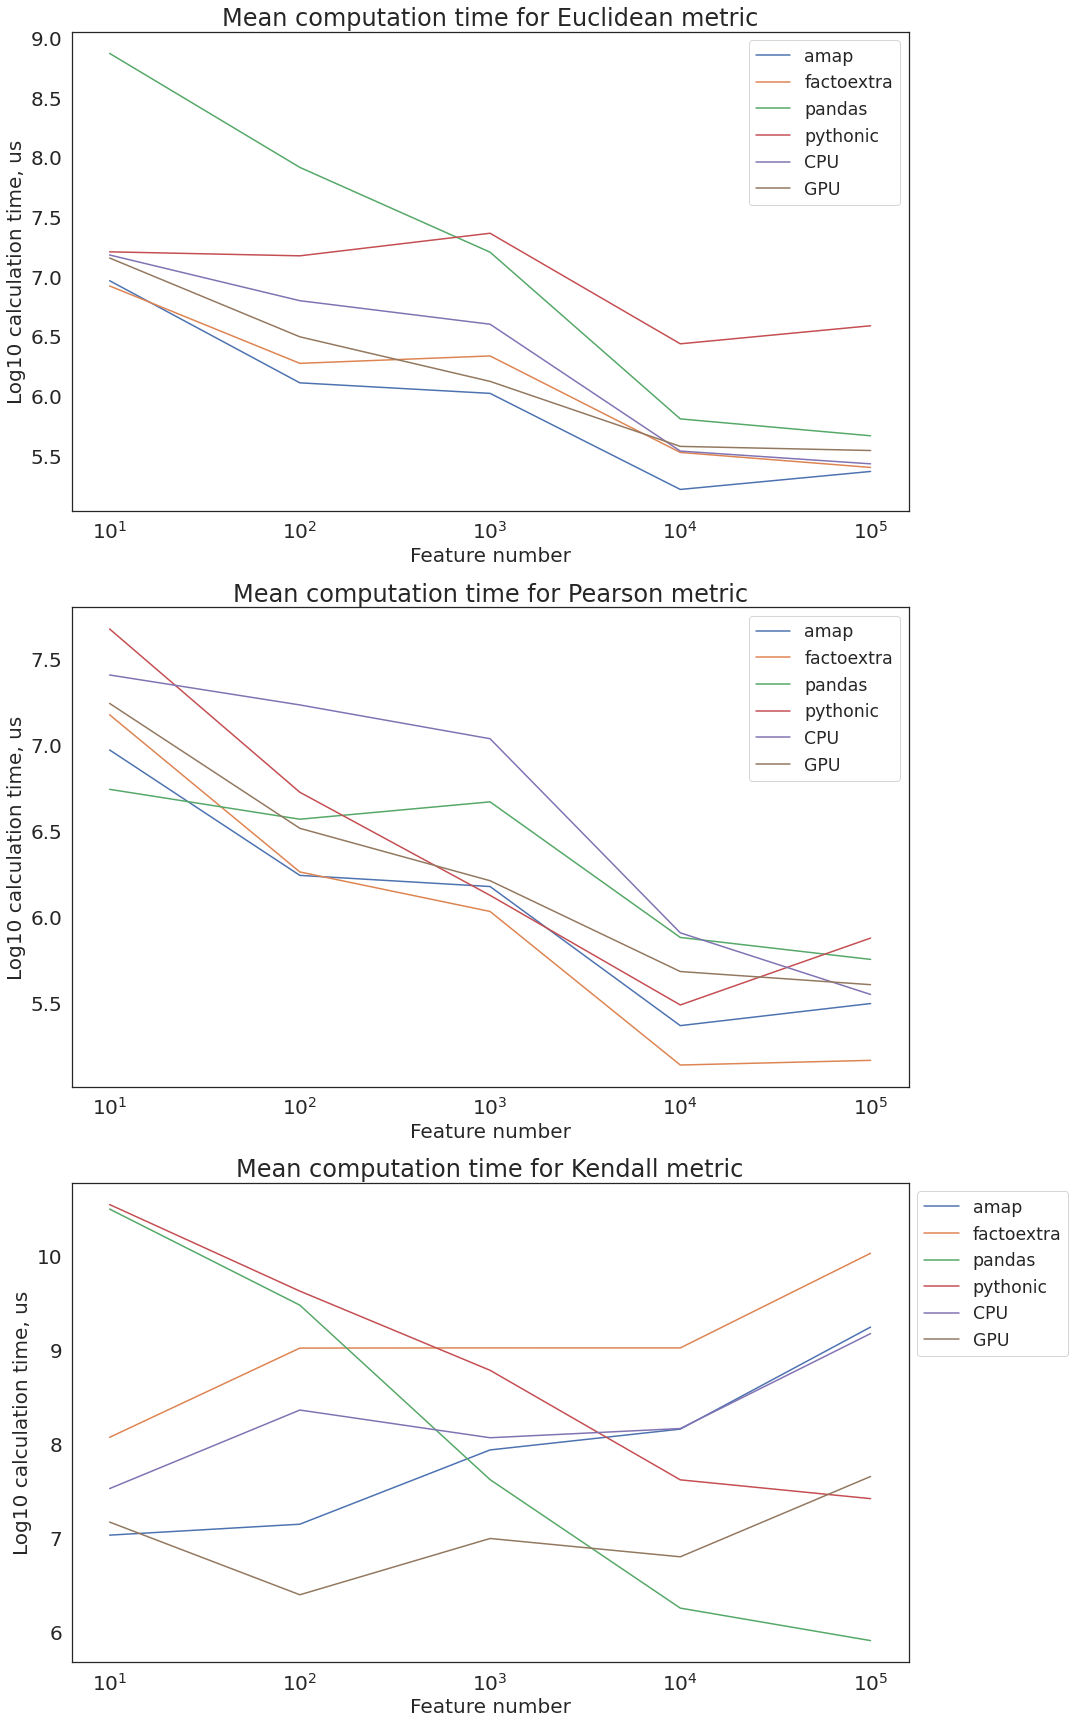

In [629]:
# os.makedirs('all-across-y-lines', exist_ok=True)
figure, ax = plt.subplots(nrows=3, figsize=(15, 30))
for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    
    kendall_data_filtered = df[df['metric'] == metric]
    plot = sns.lineplot(ci=None, ax=ax[index], data=kendall_data_filtered,x='wY',hue="method",hue_order=hue_order,y='logMeanTime')
    plot.set(xscale='log')
    plot.set_xlabel('Feature number', fontsize=20)
    plot.set_ylabel('Log10 calculation time, us', fontsize=20)
    sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))
    #plt.tight_layout()
    plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
    ax[index].tick_params(labelsize=20)
    plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
    # plt.xticks(rotation=90)
    plt.savefig(f'all-across-y-lines.png',dpi=200,  bbox_inches = 'tight')

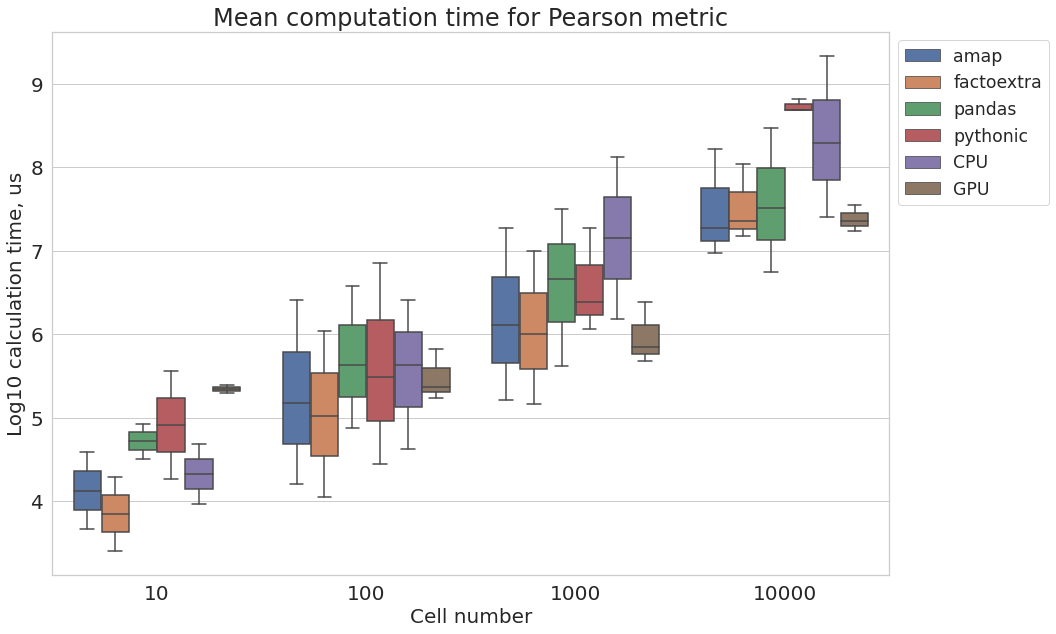

In [1071]:

figure, ax = plt.subplots(figsize=(15, 10))
metric = 'pearson'
kendall_data_filtered = df[df['metric'] == metric]
plot = sns.boxplot(data=kendall_data_filtered,x='wX',hue="method",hue_order=hue_order,y='logMeanTime')
plot.set_xlabel('Cell number', fontsize=20)
plot.set_ylabel('Log10 calculation time, us', fontsize=20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
ax.tick_params(labelsize=20)
plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}_log_cells_boxplot_bench_generated_X_on_{metric}.png',dpi=200,  bbox_inches = 'tight')

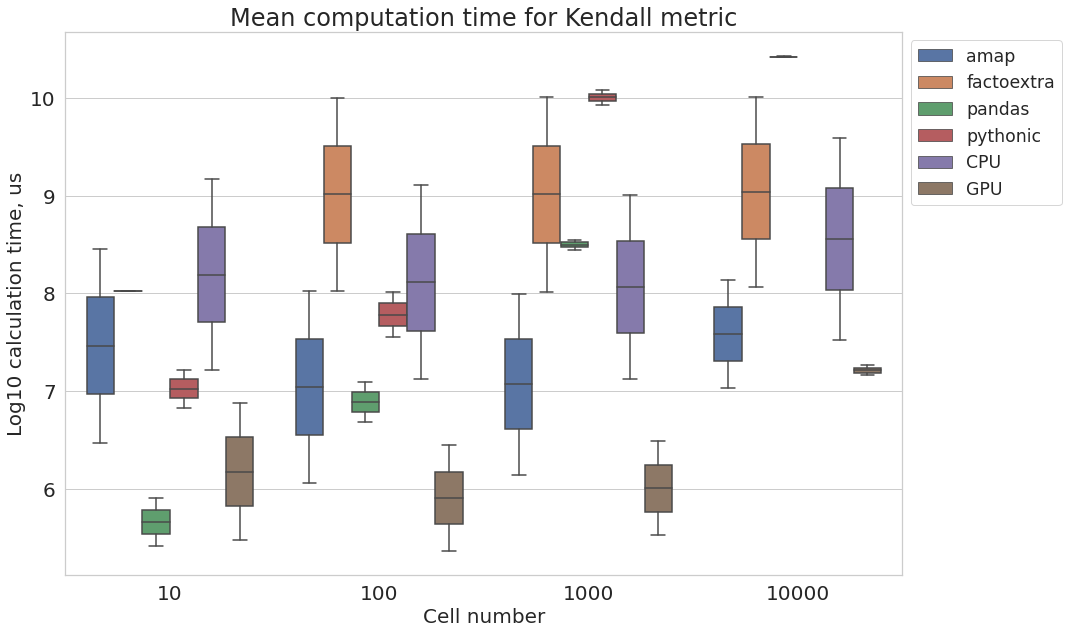

In [1072]:

figure, ax = plt.subplots(figsize=(15, 10))
metric = 'kendall'
kendall_data_filtered = df[df['metric'] == metric]
plot = sns.boxplot(data=kendall_data_filtered,x='wX',hue="method",hue_order=hue_order,y='logMeanTime')
plot.set_xlabel('Cell number', fontsize=20)
plot.set_ylabel('Log10 calculation time, us', fontsize=20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
ax.tick_params(labelsize=20)
plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}_log_cells_boxplot_bench_generated_X_on_{metric}.png',dpi=200,  bbox_inches = 'tight')

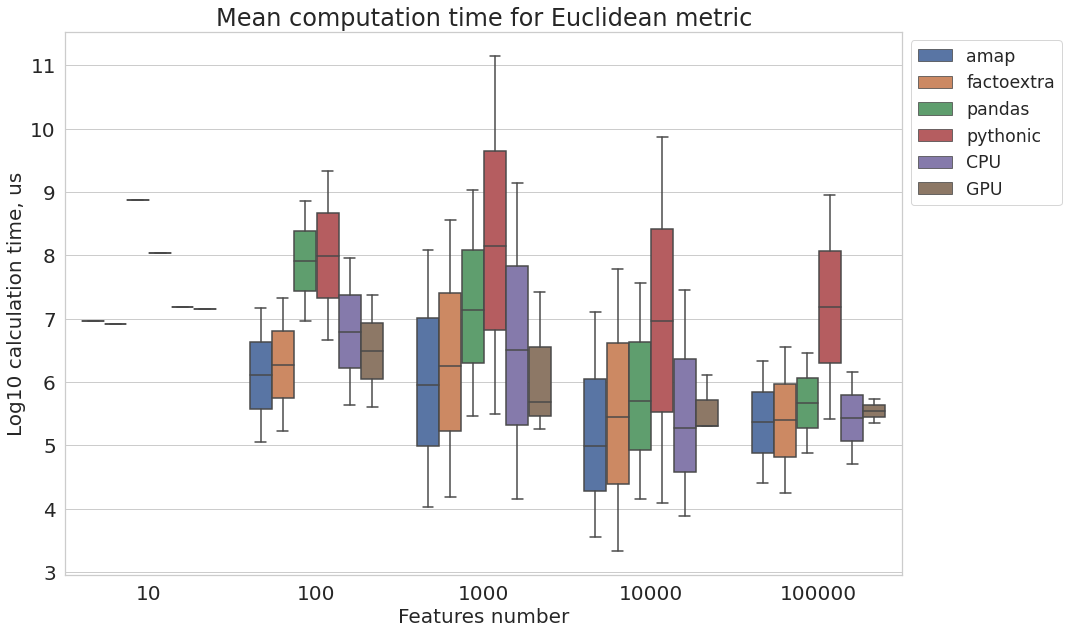

In [1079]:

figure, ax = plt.subplots(figsize=(15, 10))
metric = 'euclidean'
kendall_data_filtered = df[df['metric'] == metric]
plot = sns.boxplot(data=kendall_data_filtered,x='wY',hue="method",hue_order=hue_order,y='logMeanTime')
plot.set_xlabel('Features number', fontsize=20)
plot.set_ylabel('Log10 calculation time, us', fontsize=20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
ax.tick_params(labelsize=20)
plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}_log_features_boxplot_bench_generated_X_on_{metric}.png',dpi=200)

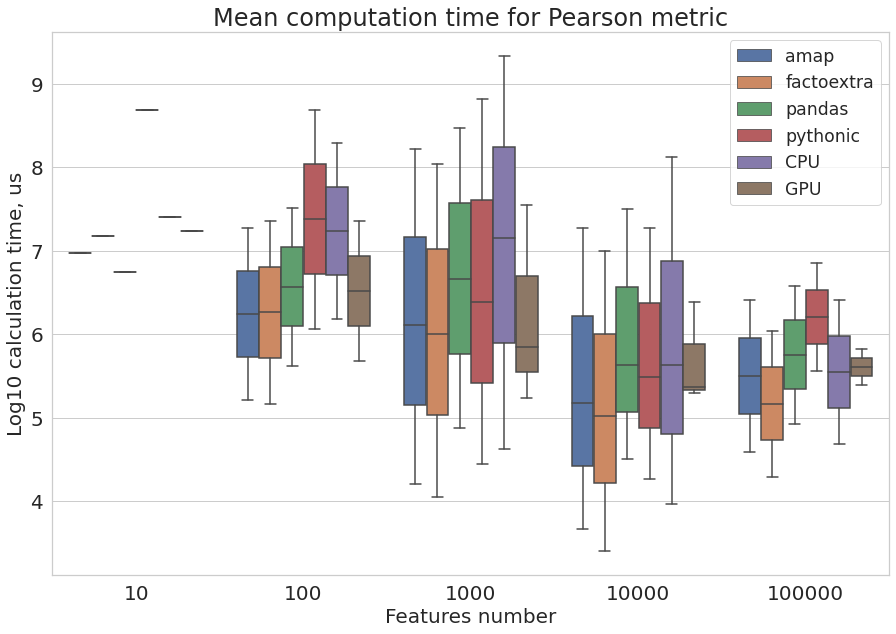

In [1073]:

figure, ax = plt.subplots(figsize=(15, 10))
metric = 'pearson'
kendall_data_filtered = df[df['metric'] == metric]
plot = sns.boxplot(data=kendall_data_filtered,x='wY',hue="method",hue_order=hue_order,y='logMeanTime')
plot.set_xlabel('Features number', fontsize=20)
plot.set_ylabel('Log10 calculation time, us', fontsize=20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
ax.tick_params(labelsize=20)
plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}_log_features_boxplot_bench_generated_X_on_{metric}.png',dpi=200,  bbox_inches = 'tight')

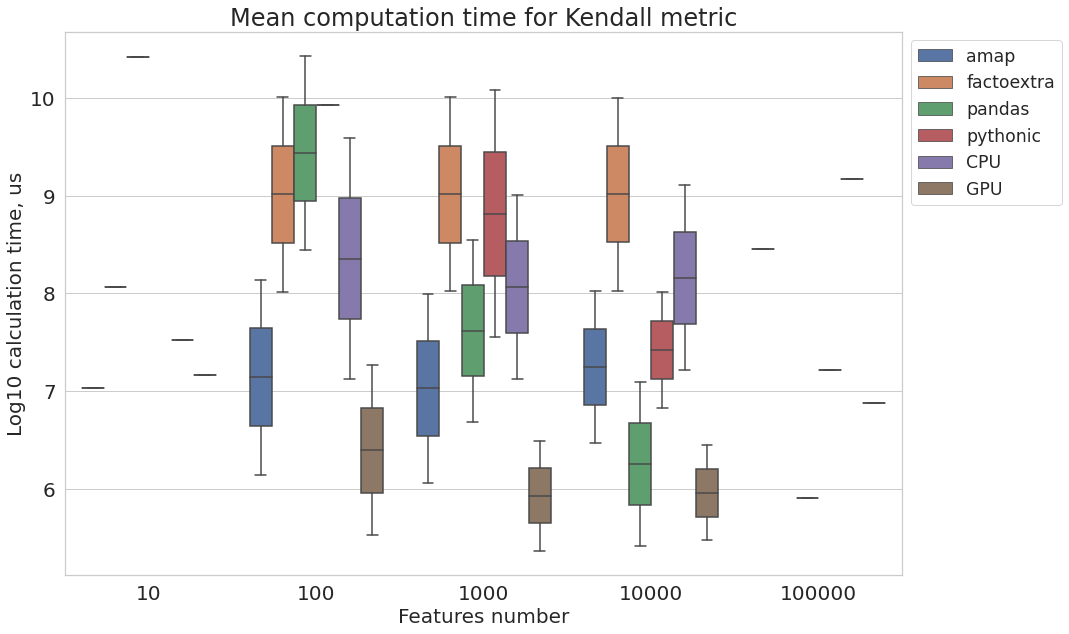

In [1074]:

figure, ax = plt.subplots(figsize=(15, 10))
metric = 'kendall'
kendall_data_filtered = df[df['metric'] == metric]
plot = sns.boxplot(data=kendall_data_filtered,x='wY',hue="method",hue_order=hue_order,y='logMeanTime')
plot.set_xlabel('Features number', fontsize=20)
plot.set_ylabel('Log10 calculation time, us', fontsize=20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.tight_layout()
plot.set_title(f'Mean computation time for {metric.capitalize()} metric', fontsize=24)
ax.tick_params(labelsize=20)
plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
# plt.xticks(rotation=90)
plt.savefig(f'{IMG_PATH}_log_features_boxplot_bench_generated_X_on_{metric}.png',dpi=200,  bbox_inches = 'tight')

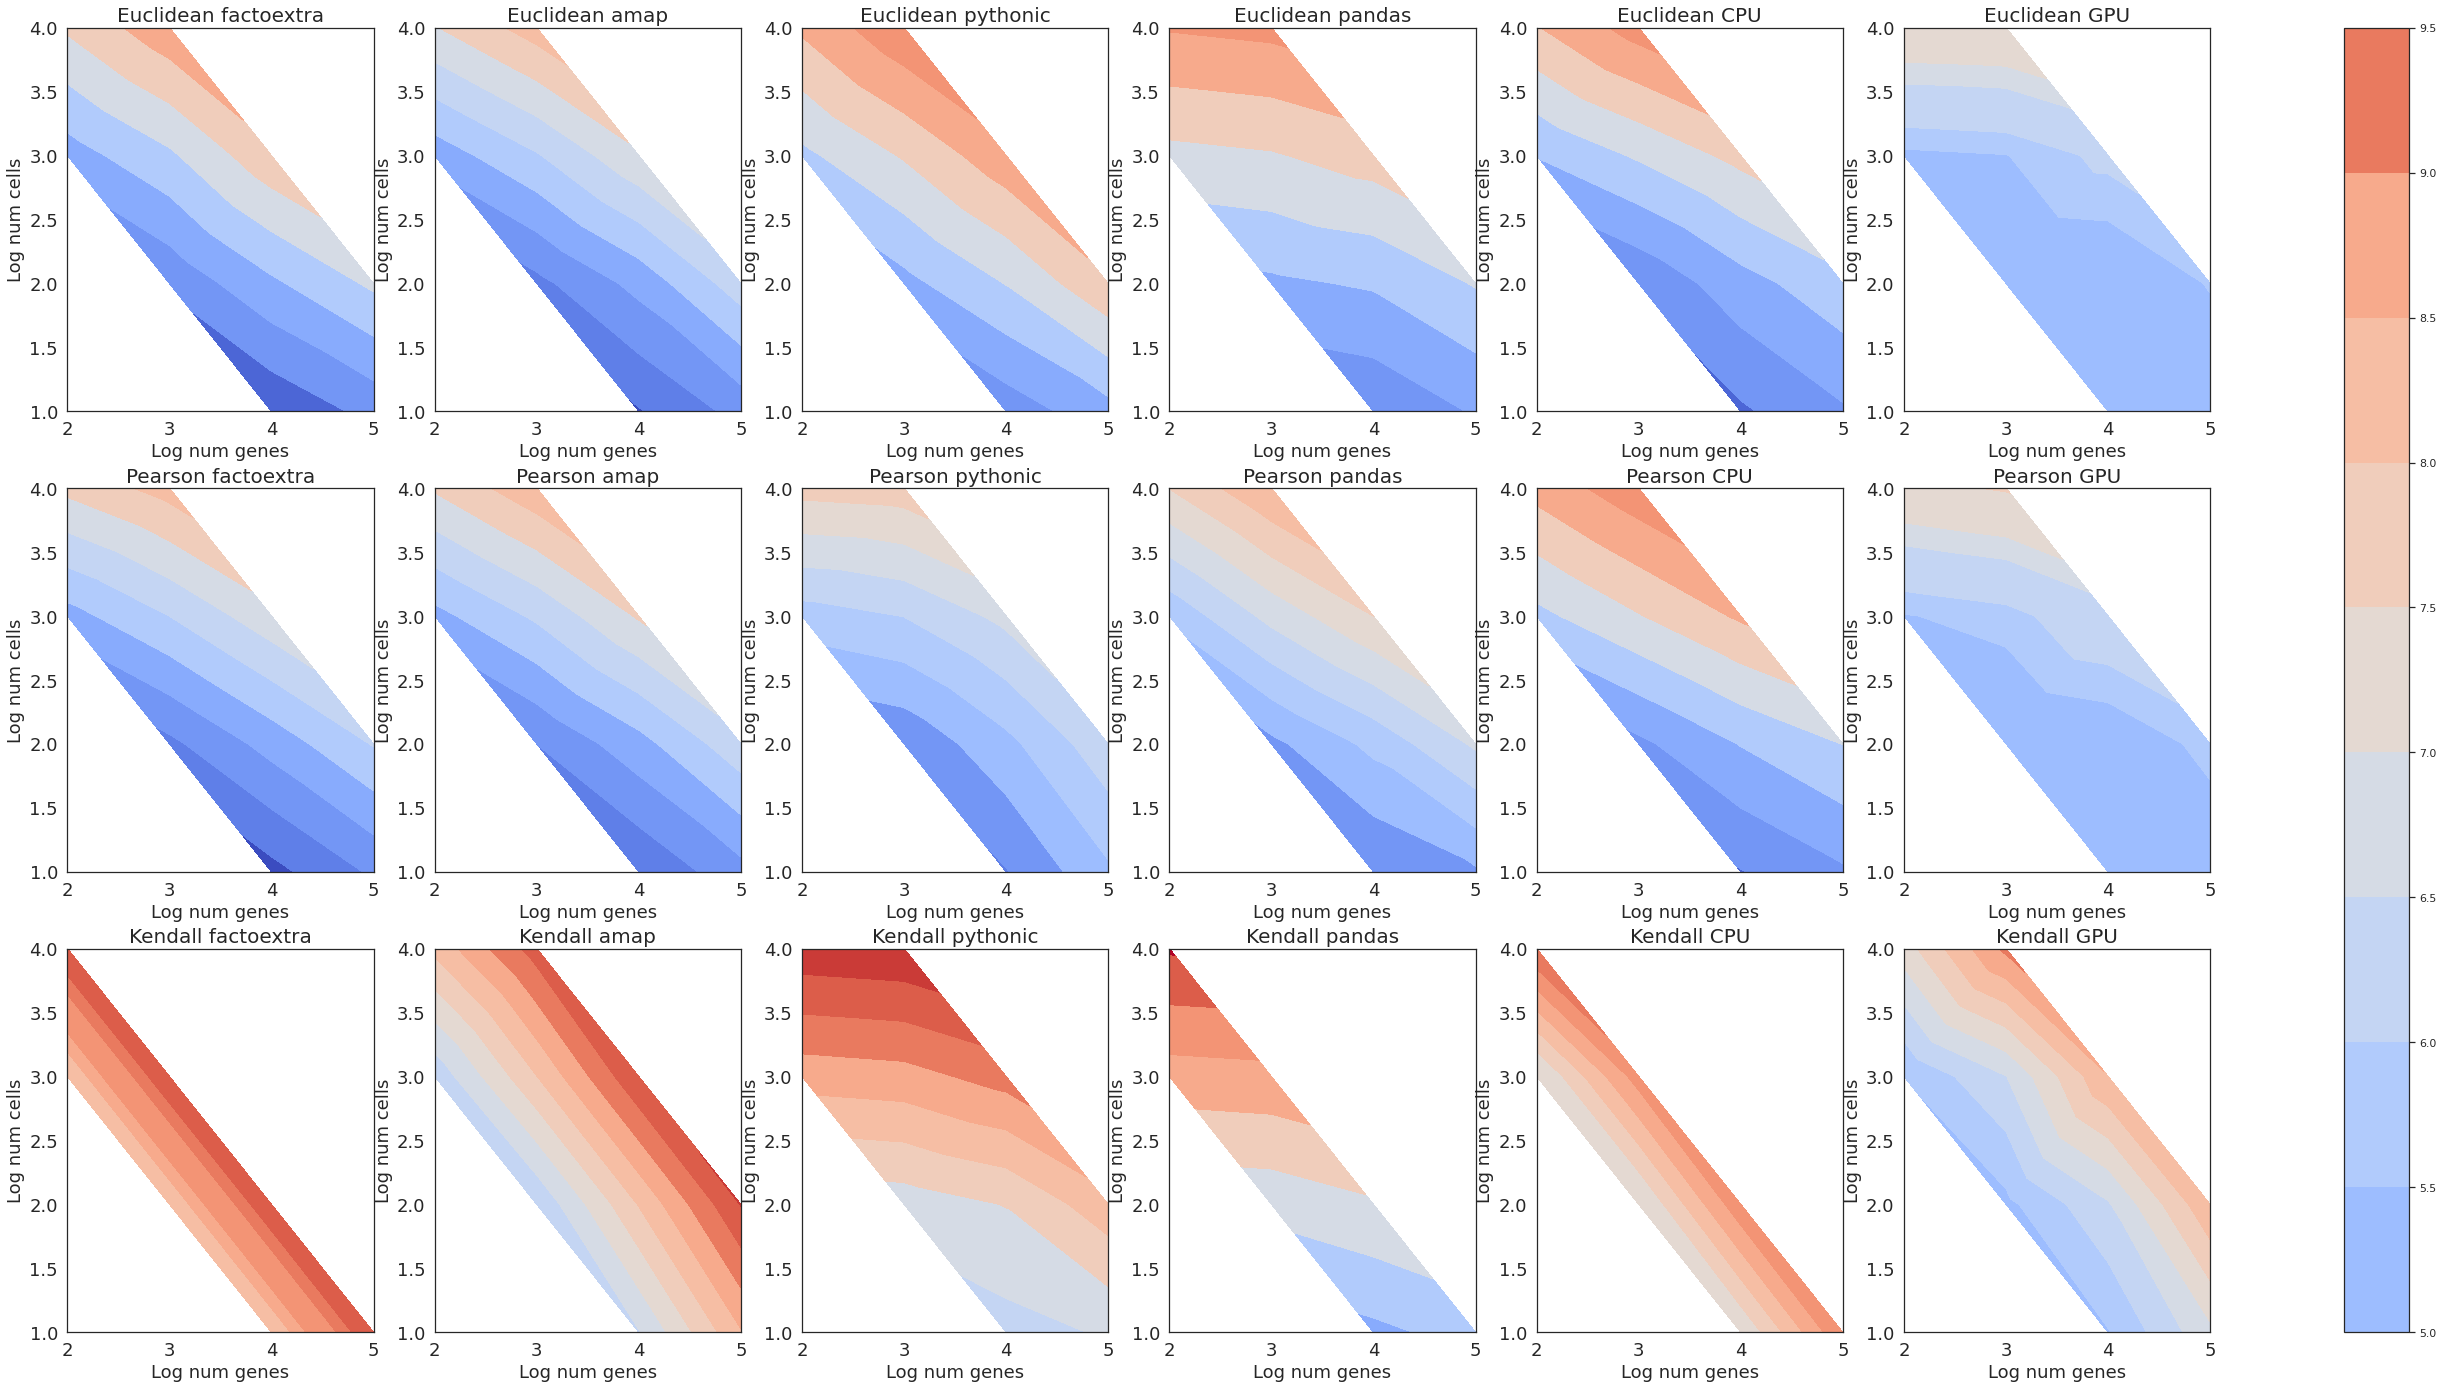

In [630]:
os.makedirs('all-dense-isochrones', exist_ok=True)
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(48, 24))

for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    for jndex, method in enumerate(['factoextra', 'amap', 'pythonic', 'pandas', 'CPU', 'GPU']):
    
    # fig.tight_layout(h_pad=5)
        current_dfr = df[(df.method == method) & (df.metric == metric)]

        current_axis = ax[index, jndex]
        current_axis.set_title(f'{metric.capitalize()} {method}', fontsize=20)
        current_axis.set_xlim(2.0, 5.0)
        current_axis.set_ylim(1.0, 4.0)
        current_axis.set_xlabel('Log num genes', fontsize=18)
        current_axis.set_ylabel('Log num cells', fontsize=18)
        current_axis.tick_params(axis='x', labelsize=18)
        current_axis.tick_params(axis='y', labelsize=18)
        tcf = current_axis.tricontourf(
            current_dfr.logWY,
            current_dfr.logWX,
            current_dfr.logMeanTime,
            norm=norm_p,
            cmap=cmap,
        )

fig.colorbar(tcf, ax=ax)
   
plt.savefig(f'all-dense-isochrones.png', bbox_inches='tight', dpi=600)

## Generated Sparse Visualization

In [43]:
df_sparse = pd.read_csv('../data/sparse_generated.csv')

In [44]:
from matplotlib.colors import BoundaryNorm
cmap = sns.color_palette('coolwarm', as_cmap=True)
cmap.N
norm_p      = BoundaryNorm(np.linspace(3, 11.0, 19), ncolors=cmap.N, clip=True)
norm_s      = BoundaryNorm(np.linspace(0, 1.0, 19), ncolors=cmap.N, clip=True)

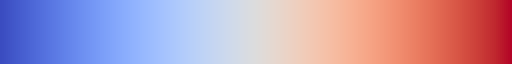

In [45]:
cmap

In [46]:
import os
os.makedirs(IMG_PATH_S, exist_ok=True)

NameError: name 'IMG_PATH_S' is not defined

In [47]:
df_sparse['logW'] = np.log10(df_sparse['|W|'])

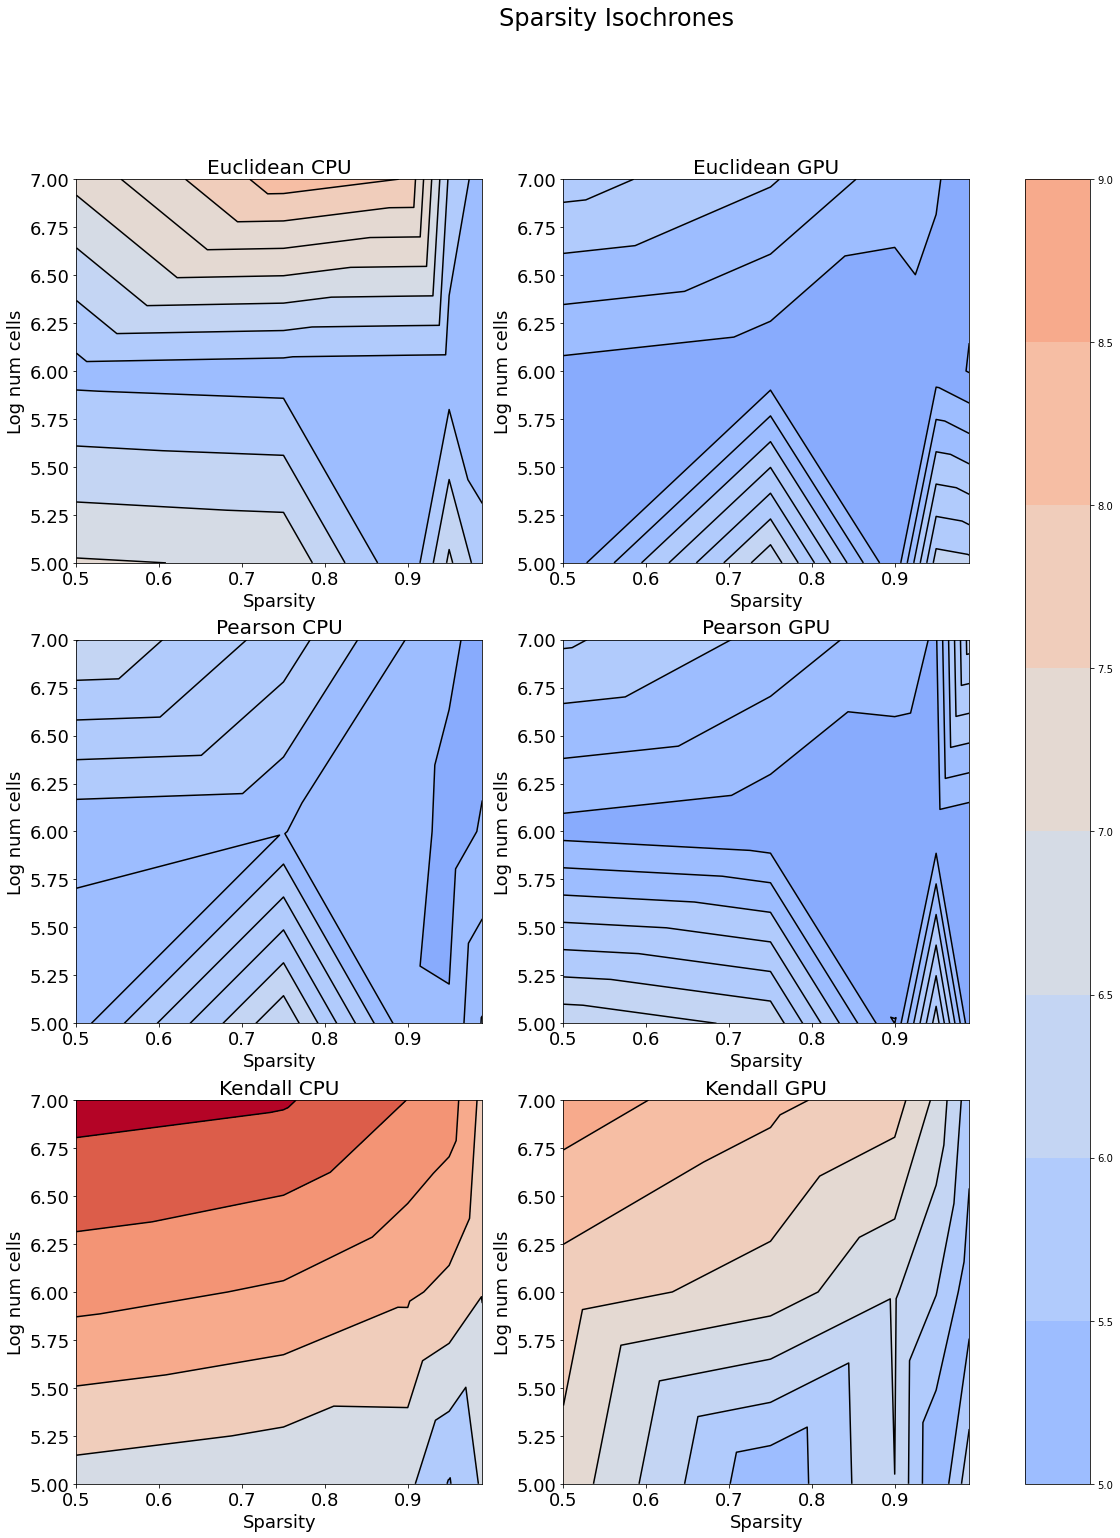

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 24))
fig.suptitle(f'Sparsity Isochrones', fontsize=24)

for index, metric in enumerate(['Euclidean', 'Pearson', 'Kendall']):
    for jndex, method in enumerate(['CPU', 'GPU']):
        metric_lower = metric.lower()
        current_dfr = df_sparse[(df_sparse.method == method) & (df_sparse.metric == metric_lower)]
        current_axis = ax[index, jndex]
        current_axis.set_title(f'{metric} {method}', fontsize=20)
        
        current_axis.set_xlabel('Sparsity', fontsize=18)
        current_axis.set_ylabel('Log num cells', fontsize=18)
        current_axis.tick_params(axis='x', labelsize=18)
        current_axis.tick_params(axis='y', labelsize=18)
        tcf = current_axis.tricontourf(current_dfr.sparsity,current_dfr.logW,current_dfr.logMeanTime, norm=norm_p, cmap=cmap)
        contour = current_axis.tricontour(current_dfr.sparsity,current_dfr.logW,current_dfr.logMeanTime, colors='k', norm=norm_p)
        
fig.colorbar(tcf, ax=ax)
plt.savefig(f'all-sparse-isochrones.png', bbox_inches='tight', dpi=600)

In [49]:
expanded_dfs = []
for sparsity in [0.5, 0.75, 0.9, 0.95, 0.99]:
    df_expanded = df_missed.copy()
    df_expanded['sparsity'] = sparsity
    df_expanded['mode'] = 'dense'
    expanded_dfs.append(df_expanded)

df_expanded = pd.concat(expanded_dfs)
df_sparse['mode'] = 'sparse'

In [50]:
df_all = df_sparse[df_sparse['|W|'] > 10000]

0
0
1
1
1
2
2
2
3
3
3
3
3
4
4
4
5
5
5
6
6
6
6
6
7
7
7
8
8
8
9
9
9
9
9
10
10
10
11
11
11
12
12
12
12
12
13
13
13
14
14
14
15
15
15


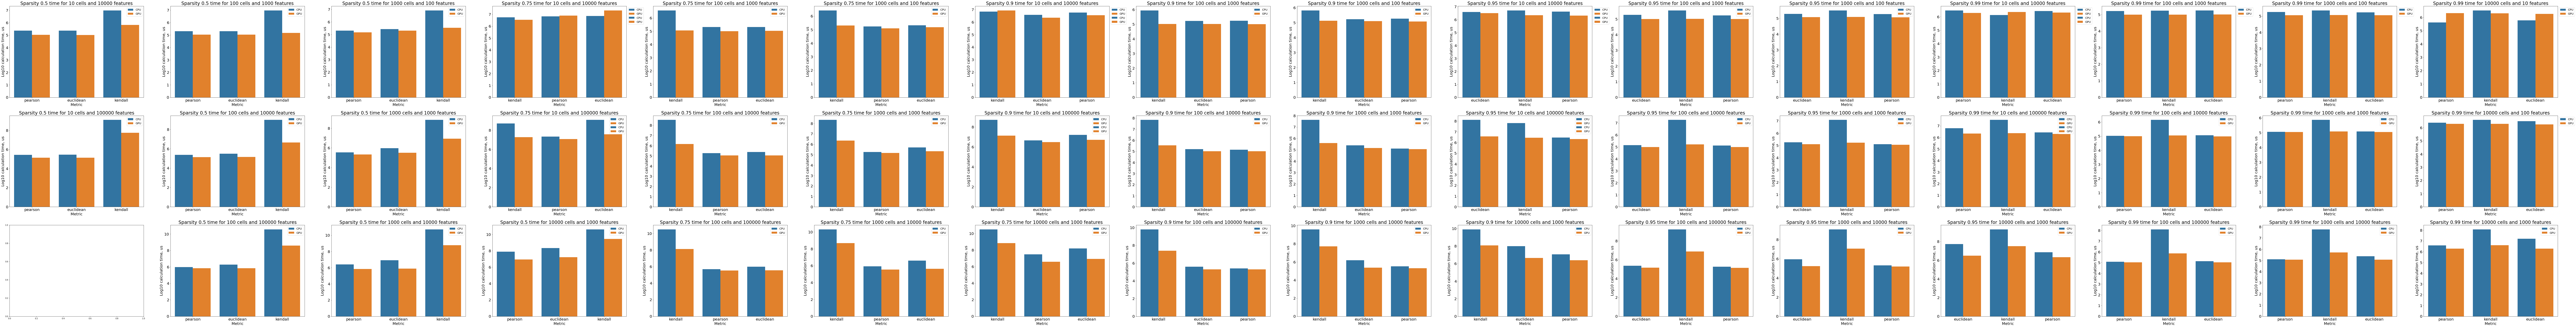

In [46]:
figure, ax = plt.subplots(nrows=3, ncols=16, figsize=(240, 30))
for index, sparsity in enumerate([0.5, 0.75, 0.9, 0.95, 0.99]):
    offset = index * 3
    for log_cells in range(1, 5):
        for log_features in range(1, 6):
            if log_cells + log_features < 5 or log_cells + log_features > 7:
                continue
            print(offset + log_cells - 1)
            current_ax = ax[log_features + log_cells - 5, offset + log_cells - 1]

            size1_data_filtered = df_sparse[df_sparse['logWX'].isin([log_cells])]
            size_data_filtered = size1_data_filtered[size1_data_filtered['logWY'].isin([log_features])]
            size_data_filtered = size_data_filtered[size_data_filtered.sparsity == sparsity]
            plot = sns.barplot(ax=current_ax, data=size_data_filtered,x='metric',hue="method",hue_order=['CPU', 'GPU'],y='logMeanTime')

            plot.set_title(f'Sparsity {sparsity} time for {10 ** log_cells} cells and {10 ** log_features} features', fontsize=24)
            plot.set_xlabel('Metric', fontsize=20)
            plot.set_ylabel('Log10 calculation time, us', fontsize=20)

            current_ax.tick_params(labelsize=20)
            plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1))

plt.savefig(f'all-sparse-bars.png',dpi=200)

In [52]:
df_united = pd.concat([df_expanded, df_sparse])
df_united = df_united.reset_index()

NameError: name 'IMG_PATH_S' is not defined

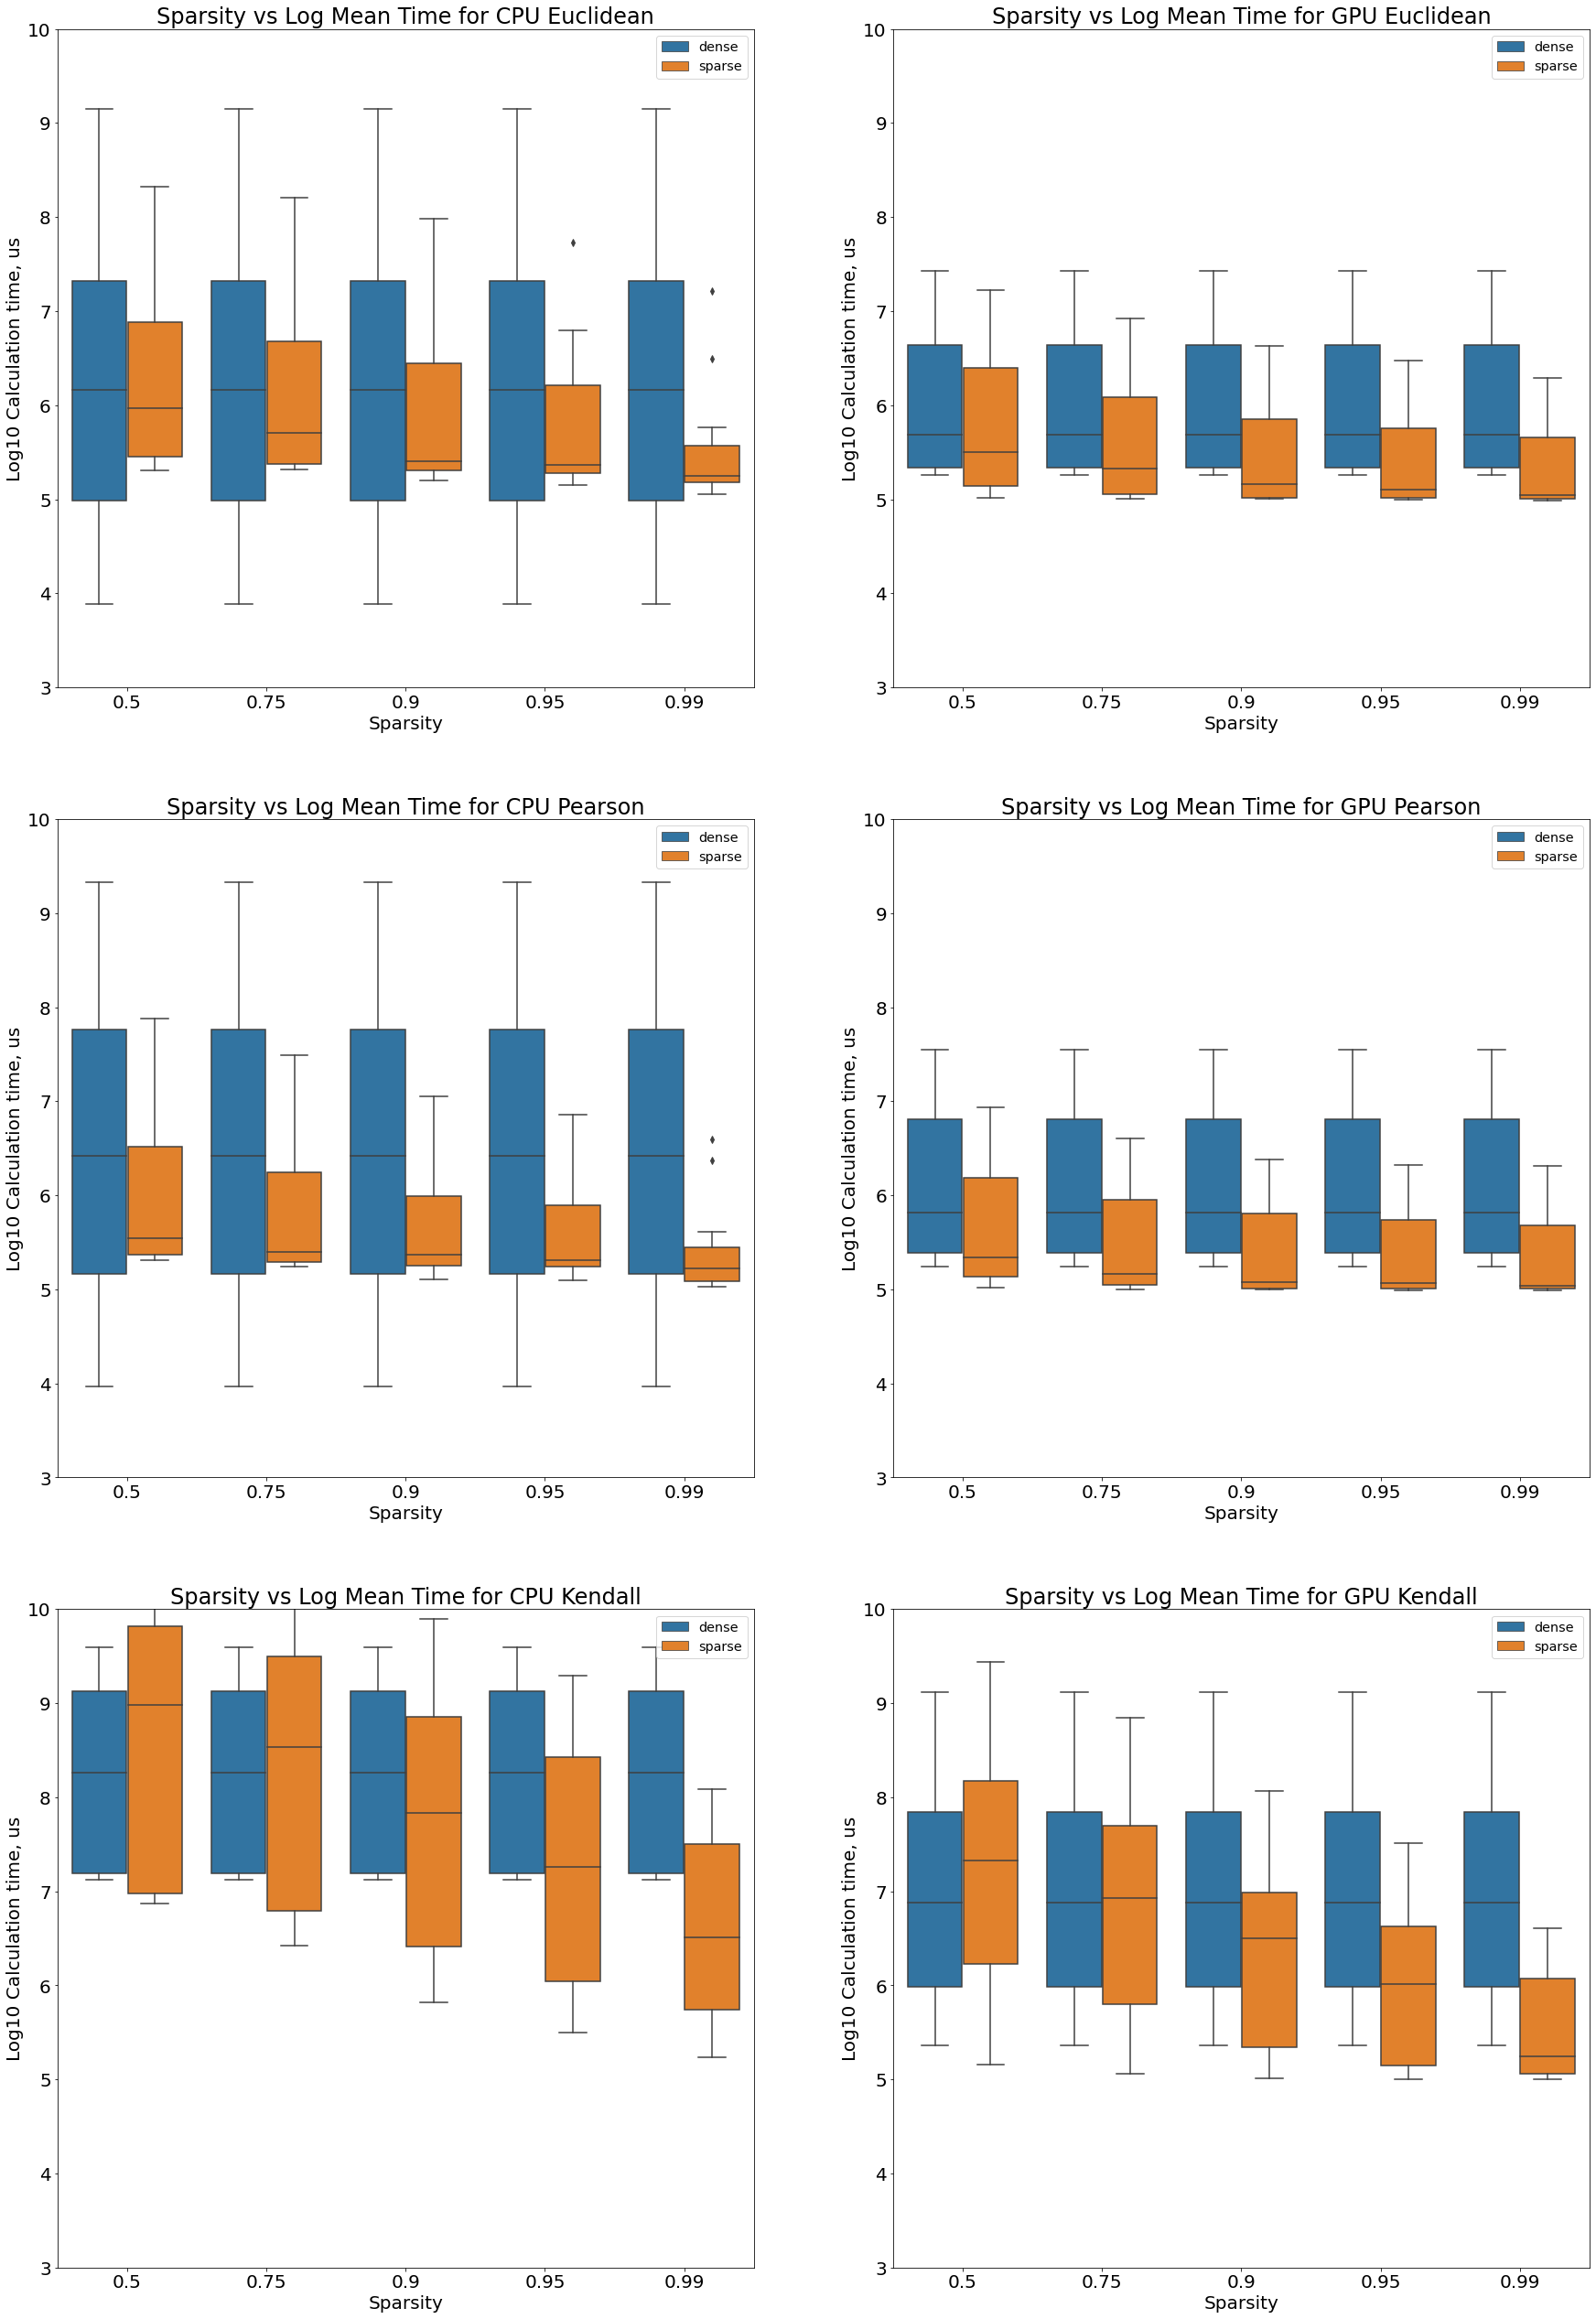

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = matrix
metric = 'euclidean'
method = 'CPU'


fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(30, 45))

for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    for jndex, method in enumerate(['CPU', 'GPU']):
        filtered_data = df_united[(df_united.method == method) & (df_united.metric == metric)]

        # Create the subplot
        plot = sns.boxplot(ax=ax[index][jndex], x='sparsity', y='logMeanTime', hue='mode', data=filtered_data)
        if method != 'kendall':
            plot.set_ylim(3.0, 10.0)
        else:
            plot.set_ylim(3.0, 11.0)

        # Add title and labels
        plot.set_title(f'Sparsity vs Log Mean Time for {method} {metric.capitalize()}', fontsize=24)
        plot.set_xlabel('Sparsity', fontsize=20)
        plot.set_ylabel('Log10 Calculation time, us', fontsize=20)
        plot.tick_params(labelsize=20)
        plot.legend(fontsize='x-large', bbox_to_anchor=(1, 1), loc='upper right')

plt.savefig(f'{IMG_PATH_S}Sparsity vs Log Mean Time for {method} {metric.capitalize()} metric.png',dpi=200,  bbox_inches = 'tight')

In [50]:
df_united

index                                           DataFile     metric  \
0        54  results/GeneratedDense/10_cells_100000_feature...  euclidean   
1        55  results/GeneratedDense/10_cells_100000_feature...    kendall   
2        56  results/GeneratedDense/10_cells_100000_feature...    pearson   
3        57  results/GeneratedDense/10_cells_100000_feature...    pearson   
4        58  results/GeneratedDense/10_cells_100000_feature...    kendall   
...     ...                                                ...        ...   
1315    325  results/GeneratedSparse/10000_cells_1000_featu...    pearson   
1316    326  results/GeneratedSparse/10000_cells_1000_featu...  euclidean   
1317    327  results/GeneratedSparse/10000_cells_1000_featu...  euclidean   
1318    328  results/GeneratedSparse/10000_cells_1000_featu...    kendall   
1319    329  results/GeneratedSparse/10000_cells_1000_featu...  euclidean   

      method     wX      wY          ID       |W|  logWX  logWY  ...  \
0       amap     10  100000   10_100000   1000000    1.0    5.0  ...   
1     pandas     10  100000   10_100000   1000000    1.0    5.0  ...   
2        GPU     10  100000   10_100000   1000000    1.0    5.0  ...   
3     pandas     10  100000   10_100000   1000000    1.0    5.0  ...   
4       amap     10  100000   10_100000   1000000    1.0    5.0  ...   
...      ...    ...     ...         ...       ...    ...    ...  ...   
1315     CPU  10000    1000  10000_1000  10000000    4.0    3.0  ...   
1316     CPU  10000    1000  10000_1000  10000000    4.0    3.0  ...   
1317     GPU  10000    1000  10000_1000  10000000    4.0    3.0  ...   
1318     CPU  10000    1000  10000_1000  10000000    4.0    3.0  ...   
1319     GPU  10000    1000  10000_1000  10000000    4.0    3.0  ...   

           val_22       val_23       val_24       val_25                  ID2  \
0        29035.25     24399.75     23898.75     23800.75  10_100000_euclidean   
1             NaN          NaN          NaN          NaN    10_100000_kendall   
2       166193.50    166456.25    167400.50    196178.75    10_100000_pearson   
3             NaN          NaN          NaN          NaN    10_100000_pearson   
4             NaN          NaN          NaN          NaN    10_100000_kendall   
...           ...          ...          ...          ...                  ...   
1315  12590361.00  12010693.00  12075798.00  12398995.25                  NaN   
1316  14380988.00  14487713.00  14755418.50  14219047.50                  NaN   
1317   4260197.50   4295489.50   4326079.25   4308031.75                  NaN   
1318          NaN          NaN          NaN          NaN                  NaN   
1319   2994346.00   2974675.00   2975714.00   2951301.00                  NaN   

      sparsity    mode logW     full_mode                  full_name  
0         0.50   dense  NaN    dense_amap    10_100000_0.5_euclidean  
1         0.50   dense  NaN  dense_pandas      10_100000_0.5_kendall  
2         0.50   dense  NaN     dense_GPU      10_100000_0.5_pearson  
3         0.50   dense  NaN  dense_pandas      10_100000_0.5_pearson  
4         0.50   dense  NaN    dense_amap      10_100000_0.5_kendall  
...        ...     ...  ...           ...                        ...  
1315      0.90  sparse  7.0    sparse_CPU     10000_1000_0.9_pearson  
1316      0.99  sparse  7.0    sparse_CPU  10000_1000_0.99_euclidean  
1317      0.90  sparse  7.0    sparse_GPU   10000_1000_0.9_euclidean  
1318      0.50  sparse  7.0    sparse_CPU     10000_1000_0.5_kendall  
1319      0.95  sparse  7.0    sparse_GPU  10000_1000_0.95_euclidean  

[1320 rows x 49 columns]

In [56]:
df_united['full_name'] = df_united.apply(
    lambda x: f'{x["wX"]}_{x["wY"]}_{x["sparsity"]}_{x["metric"]}', axis=1
)

In [57]:
df_grouped = df_united.groupby(['method', 'mode'])
acc = df_grouped.get_group(("GPU", 'dense'))
v1 =  df_grouped.get_group(("CPU", 'dense'))
v1.head()
v1["Ratio"] = acc['mean']/v1['mean']
# d3 = pd.DataFrame

results = []
for dat in acc.index:
    for ind in df_united.index:
        if acc["full_name"][dat] == df_united['full_name'][ind]:
            results.append({
                'DataFile': df_united['DataFile'][ind],
                'method': df_united['method'][ind],
                'metric': df_united['metric'][ind],
                'acceleration': acc['mean'][dat]/df_united['mean'][ind], # acc['mean'][dat]/df['mean'][ind],
                'wX': df_united['wX'][ind],
                'wY': df_united['wY'][ind],
                'ID': df_united['ID'][ind],
                'sparsity': df_united['sparsity'][ind],
                'mode': df_united['mode'][ind],
            })
#             print(df['DataFile'][ind],df['method'][ind],df['metric'][ind],df['mean'][dat]/acc['mean'][ind])

df_acc_sparse = pd.DataFrame(results)
df_acc_sparse['logAcceleration'] = np.log10(df_acc_sparse['acceleration'])
df_acc_sparse['full_mode'] = df_acc_sparse.apply(lambda x: x['mode'] + '_' + x['method'], axis=1)

/tmp/ipykernel_55776/1027136564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1["Ratio"] = acc['mean']/v1['mean']


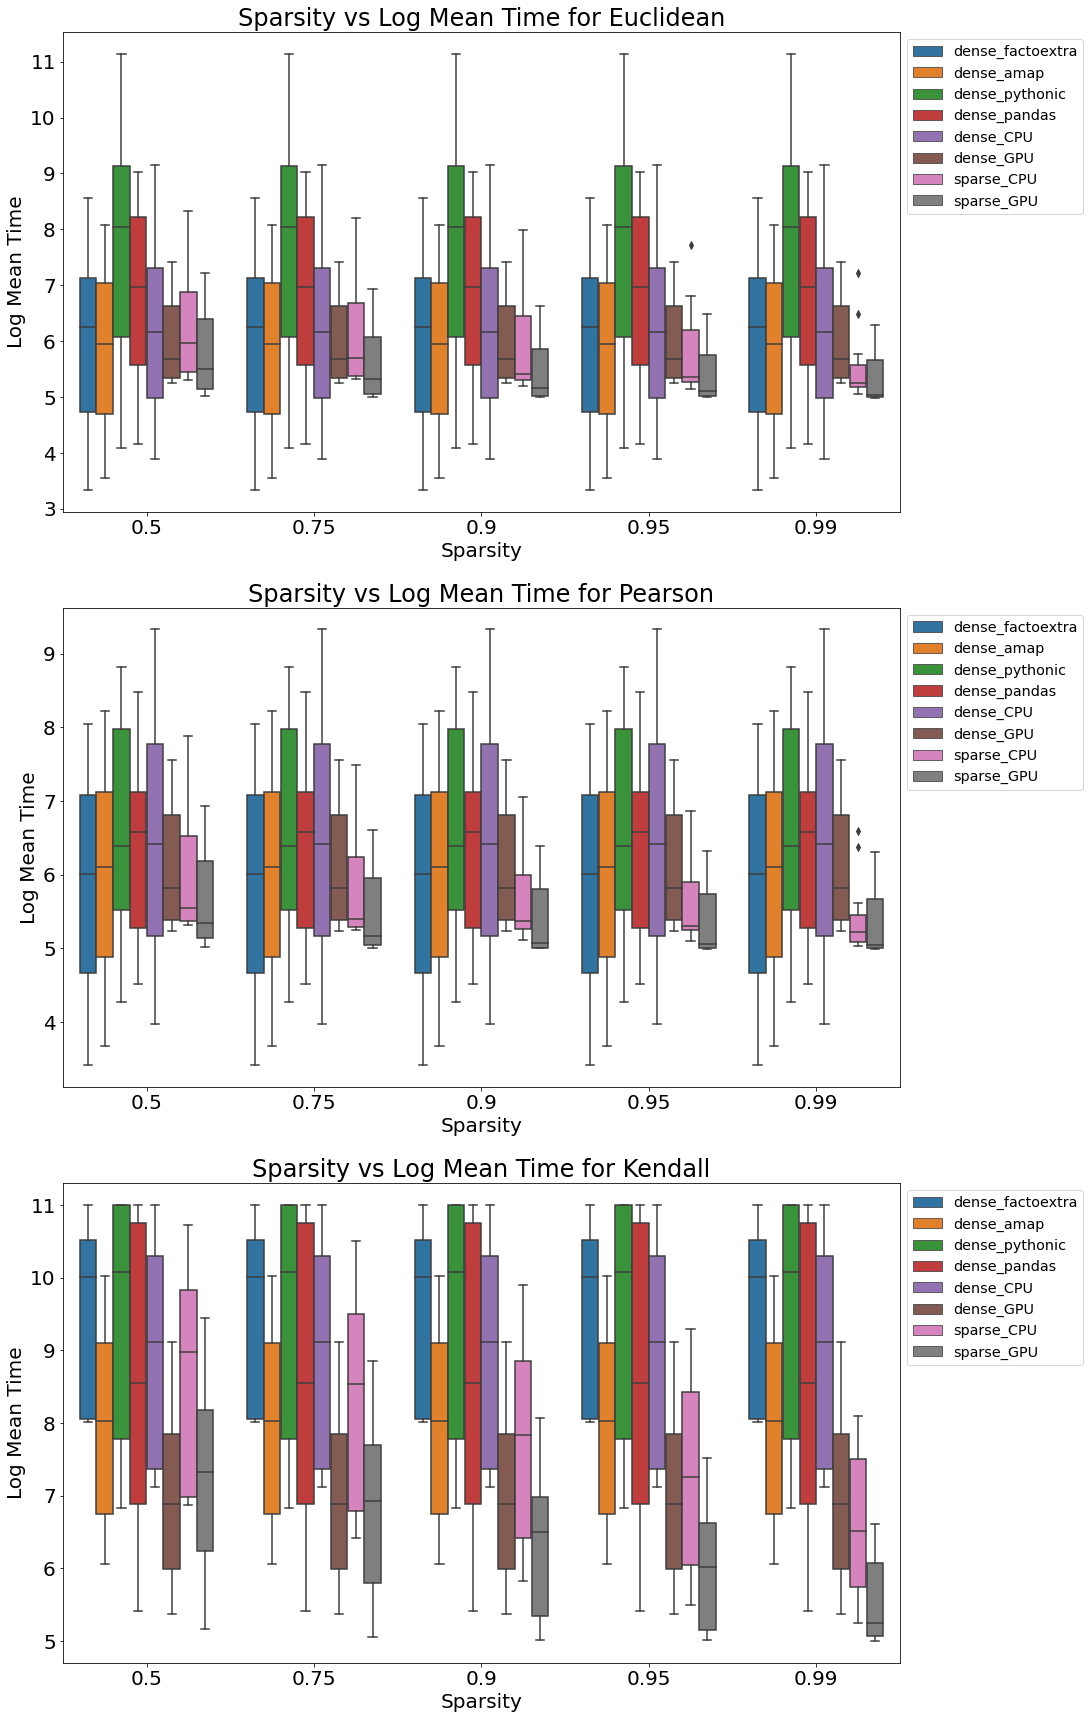

In [527]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_united['full_mode'] = df_united.apply(lambda x: x['mode'] + '_' + x['method'], axis=1)

fig, ax = plt.subplots(nrows=3, figsize=(15, 30))

# Filter data for CPU and CPU_Sp methods
for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    filtered_data = df_united[df_united['metric'] == metric]

    # Set up the plot
#     sns.set(style="whitegrid")
#     fig, ax = plt.subplots(figsize=(15, 10))

    # Create the subplot
    plot = sns.boxplot(
        ax=ax[index], x='sparsity', y='logMeanTime', hue='full_mode', data=filtered_data,
        hue_order=[
            'dense_factoextra',
            'dense_amap',
            'dense_pythonic',
            'dense_pandas',
            'dense_CPU',
            'dense_GPU',
            'sparse_CPU',
            'sparse_GPU',
        ]
    )
    sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))
    # Add title and labels
    plot.set_title(f'Sparsity vs Log Mean Time for {metric.capitalize()}', fontsize=24)
    plot.set_xlabel('Sparsity', fontsize=20)
    plot.set_ylabel('Log Mean Time', fontsize=20)
    ax[index].tick_params(labelsize=20)
    plot.legend(fontsize=20)
    ax[index].legend(fontsize='x-large', bbox_to_anchor=(1, 1))

    # Show the plot
    #plt.show()
plt.savefig(f'all-sparse-boxplots-sparsity-time.png',dpi=600,  bbox_inches = 'tight')

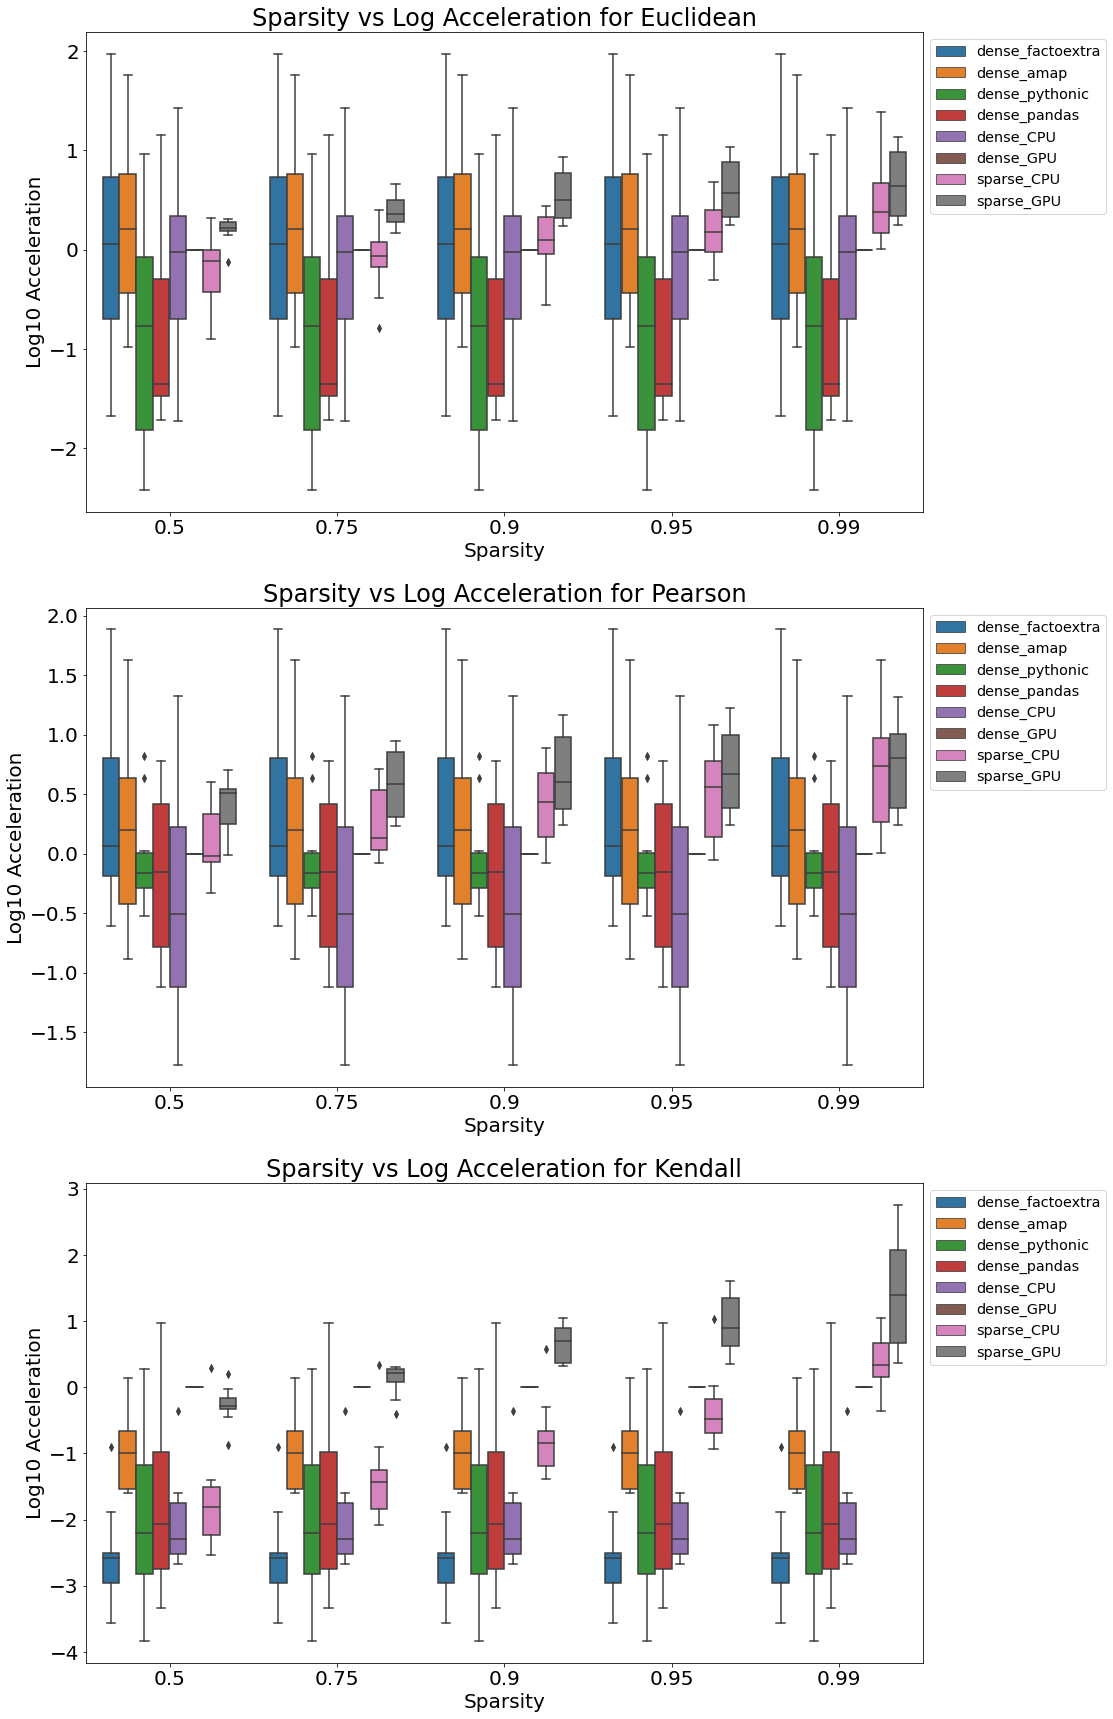

In [549]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_united['full_mode'] = df_united.apply(lambda x: x['mode'] + '_' + x['method'], axis=1)

fig, ax = plt.subplots(nrows=3, figsize=(15, 30))

# Filter data for CPU and CPU_Sp methods
for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
    filtered_data = df_acc_sparse[df_acc_sparse['metric'] == metric]

    # Set up the plot
#     sns.set(style="whitegrid")
#     fig, ax = plt.subplots(figsize=(15, 10))

    # Create the subplot
    plot = sns.boxplot(
        ax=ax[index], x='sparsity', y='logAcceleration', hue='full_mode', data=filtered_data,
        hue_order=[
            'dense_factoextra',
            'dense_amap',
            'dense_pythonic',
            'dense_pandas',
            'dense_CPU',
            'dense_GPU',
            'sparse_CPU',
            'sparse_GPU',
        ]
    )
    sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))
    # Add title and labels
    plot.set_title(f'Sparsity vs Log Acceleration for {metric.capitalize()}', fontsize=24)
    plot.set_xlabel('Sparsity', fontsize=20)
    plot.set_ylabel('Log10 Acceleration', fontsize=20)
    ax[index].tick_params(labelsize=20)
    plot.legend(fontsize=20)
    ax[index].legend(fontsize='x-large', bbox_to_anchor=(1, 1))

    # Show the plot
    #plt.show()
plt.savefig(f'all-sparse-boxplots-sparsity-acceleration.png',dpi=600,  bbox_inches = 'tight')

## Figure 4

In [76]:
df_acc_sparse[(df_acc_sparse.metric == 'kendall') & (df_acc_sparse.full_mode == 'dense_pythonic')]

DataFile    method   metric  \
19    results/GeneratedDense/10_cells_100000_feature...  pythonic  kendall   
41    results/GeneratedDense/1000_cells_10000_featur...  pythonic  kendall   
64    results/GeneratedDense/10000_cells_10_features...  pythonic  kendall   
88    results/GeneratedDense/1000_cells_1000_feature...  pythonic  kendall   
112   results/GeneratedDense/100_cells_1000_features...  pythonic  kendall   
136   results/GeneratedDense/10000_cells_100_feature...  pythonic  kendall   
158   results/GeneratedDense/100_cells_100000_featur...  pythonic  kendall   
181   results/GeneratedDense/100_cells_10000_feature...  pythonic  kendall   
205   results/GeneratedDense/10_cells_10000_features...  pythonic  kendall   
229   results/GeneratedDense/1000_cells_100_features...  pythonic  kendall   
251   results/GeneratedDense/10000_cells_1000_featur...  pythonic  kendall   
274   results/GeneratedDense/10_cells_100000_feature...  pythonic  kendall   
296   results/GeneratedDense/1000_cells_10000_featur...  pythonic  kendall   
319   results/GeneratedDense/10000_cells_10_features...  pythonic  kendall   
343   results/GeneratedDense/1000_cells_1000_feature...  pythonic  kendall   
367   results/GeneratedDense/100_cells_1000_features...  pythonic  kendall   
391   results/GeneratedDense/10000_cells_100_feature...  pythonic  kendall   
413   results/GeneratedDense/100_cells_100000_featur...  pythonic  kendall   
436   results/GeneratedDense/100_cells_10000_feature...  pythonic  kendall   
460   results/GeneratedDense/10_cells_10000_features...  pythonic  kendall   
484   results/GeneratedDense/1000_cells_100_features...  pythonic  kendall   
506   results/GeneratedDense/10000_cells_1000_featur...  pythonic  kendall   
529   results/GeneratedDense/10_cells_100000_feature...  pythonic  kendall   
551   results/GeneratedDense/1000_cells_10000_featur...  pythonic  kendall   
574   results/GeneratedDense/10000_cells_10_features...  pythonic  kendall   
598   results/GeneratedDense/1000_cells_1000_feature...  pythonic  kendall   
622   results/GeneratedDense/100_cells_1000_features...  pythonic  kendall   
646   results/GeneratedDense/10000_cells_100_feature...  pythonic  kendall   
668   results/GeneratedDense/100_cells_100000_featur...  pythonic  kendall   
691   results/GeneratedDense/100_cells_10000_feature...  pythonic  kendall   
715   results/GeneratedDense/10_cells_10000_features...  pythonic  kendall   
739   results/GeneratedDense/1000_cells_100_features...  pythonic  kendall   
761   results/GeneratedDense/10000_cells_1000_featur...  pythonic  kendall   
784   results/GeneratedDense/10_cells_100000_feature...  pythonic  kendall   
806   results/GeneratedDense/1000_cells_10000_featur...  pythonic  kendall   
829   results/GeneratedDense/10000_cells_10_features...  pythonic  kendall   
853   results/GeneratedDense/1000_cells_1000_feature...  pythonic  kendall   
877   results/GeneratedDense/100_cells_1000_features...  pythonic  kendall   
901   results/GeneratedDense/10000_cells_100_feature...  pythonic  kendall   
923   results/GeneratedDense/100_cells_100000_featur...  pythonic  kendall   
946   results/GeneratedDense/100_cells_10000_feature...  pythonic  kendall   
970   results/GeneratedDense/10_cells_10000_features...  pythonic  kendall   
994   results/GeneratedDense/1000_cells_100_features...  pythonic  kendall   
1016  results/GeneratedDense/10000_cells_1000_featur...  pythonic  kendall   
1039  results/GeneratedDense/10_cells_100000_feature...  pythonic  kendall   
1061  results/GeneratedDense/1000_cells_10000_featur...  pythonic  kendall   
1084  results/GeneratedDense/10000_cells_10_features...  pythonic  kendall   
1108  results/GeneratedDense/1000_cells_1000_feature...  pythonic  kendall   
1132  results/GeneratedDense/100_cells_1000_features...  pythonic  kendall   
1156  results/GeneratedDense/10000_cells_100_feature...  pythonic  kendall   
1178  results/GeneratedDense/100_cells_100000_featur...  pythonic  ke

In [ ]:
palette = {
    'dense_gpu': 'red',
    'sparse_gpu': 'blue',
    'dense_pythonic':'brown',
    'dense_pandas':'black', 
    'dense_factoextra':'grey',
    'dense_amap': 'violet',
    'Тромбоциты': 'black',
    'B-клетки': 'green',
    'Плазматические клетки': 'violet',
    'Моноцитарные дендритные клетки': 'gray'
}

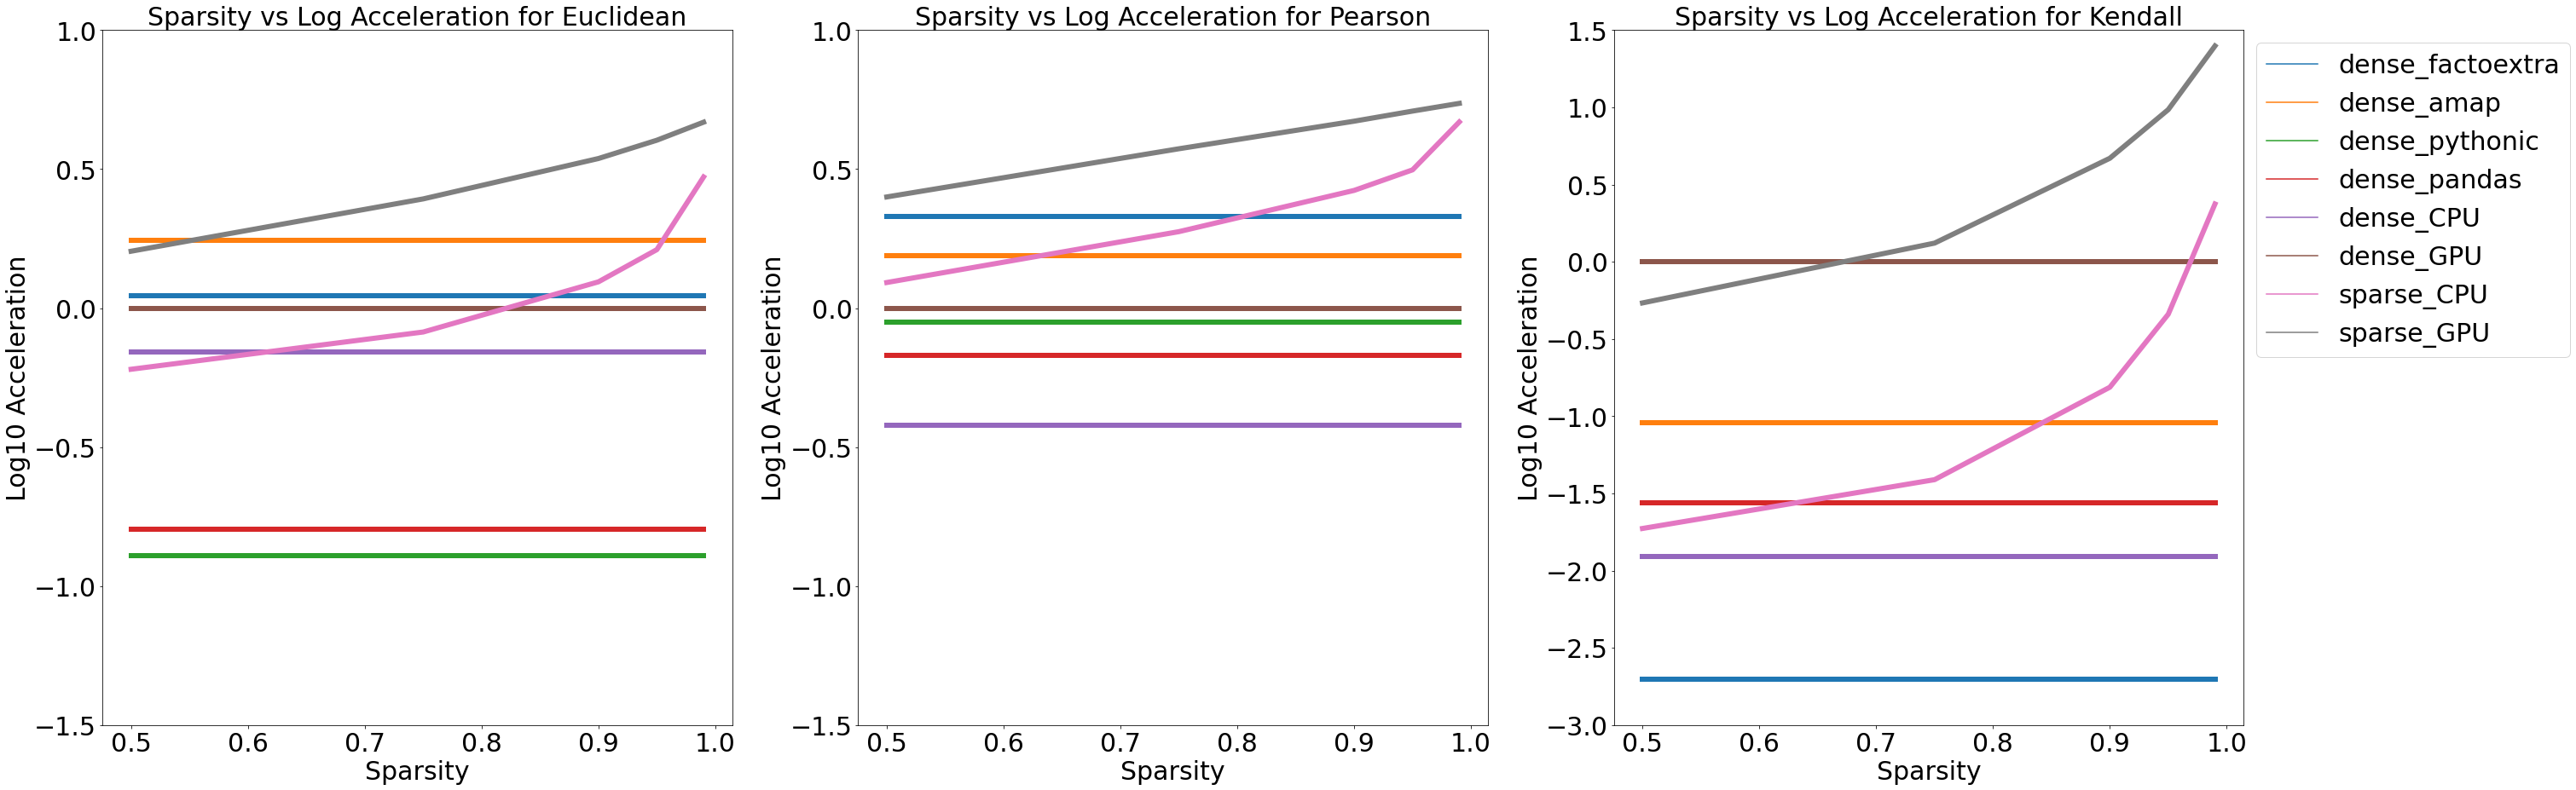

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_united['full_mode'] = df_united.apply(lambda x: x['mode'] + '_' + x['method'], axis=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(45, 15))

# Filter data for CPU and CPU_Sp methods
for index, metric in enumerate(['euclidean', 'pearson', 'kendall']):
#     filtered_data = df_united[df_united['metric'] == metric]

#     current_ax = ax[index][0]

#     # Create the subplot
#     plot = sns.boxplot(
#         ax=current_ax, x='sparsity', y='logMeanTime', hue='full_mode', data=filtered_data,
#         hue_order=[
#             'dense_factoextra',
#             'dense_amap',
#             'dense_pythonic',
#             'dense_pandas',
#             'dense_CPU',
#             'dense_GPU',
#             'sparse_CPU',
#             'sparse_GPU',
#         ]
#     )
# #     sns.move_legend(ax[index], "upper left", bbox_to_anchor=(1, 1))
#     # Add title and labels
#     plot.get_legend().remove()
#     plot.set_title(f'Sparsity vs Log Mean Time for {metric.capitalize()}', fontsize=24)
#     plot.set_xlabel('Sparsity', fontsize=20)
#     plot.set_ylabel('Log Mean Time', fontsize=20)
#     current_ax.tick_params(labelsize=20)
# #     current_ax.legend(fontsize='x-large', bbox_to_anchor=(1, 1))
    
    filtered_data = df_acc_sparse[df_acc_sparse['metric'] == metric]
    current_ax = ax[index]
    plot = sns.lineplot(
        ax=current_ax, x='sparsity', y='logAcceleration', hue='full_mode', data=filtered_data,
        ci=None,
        linewidth=6,
        hue_order=[
            'dense_factoextra',
            'dense_amap',
            'dense_pythonic',
            'dense_pandas',
            'dense_CPU',
            'dense_GPU',
            'sparse_CPU',
            'sparse_GPU',
        ]
    )
    
#     sns.move_legend(current_ax, "upper left", bbox_to_anchor=(1, 1))
    # Add title and labels
    plot.set_title(f'Sparsity vs Log Acceleration for {metric.capitalize()}', fontsize=30)
    plot.set_xlabel('Sparsity', fontsize=30)
    plot.set_ylabel('Log10 Acceleration', fontsize=30)
    
    current_ax.tick_params(labelsize=30)
    
    if metric != 'kendall':
        current_ax.get_legend().set_visible(False)
        plot.set_ylim(-1.5, 1)
    else:
        current_ax.legend(fontsize=30, bbox_to_anchor=(1, 1))
        plot.set_ylim(-3, 1.5)

    # Show the plot
    #plt.show()
plt.savefig(f'figure4.png',dpi=200,  bbox_inches = 'tight')

# Real Datasets

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(REAL_BENCHMARKS)
# Sample data preparation
df

DataFile  method     metric  \
0        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap  euclidean   
1        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    pearson   
2        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    kendall   
3      ../../DistanceBenchmarking/Real/HLCA/Marrow.csv    amap  euclidean   
4       ../../DistanceBenchmarking/Real/HLCA/aorta.csv    amap    kendall   
..                                                 ...     ...        ...   
339  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp    pearson   
340  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp  euclidean   
341  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp  euclidean   
342  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp    pearson   
343  ../../DistanceBenchmarking/RealSparse/HLCA_aor...  CPU_Sp  euclidean   

            mean            sd        val_1        val_2        val_3  \
0    24998942.70  3.232651e+06  28894350.25  21359876.50  22712151.75   
1    26468861.08  5.457040e+06  23941645.25  18692943.25  19533291.50   
2    26669185.88  1.762192e+06  24912110.75  20575015.00  28347021.75   
3    24609721.73  2.982867e+06  24437832.00  18258887.50  24656041.00   
4    26035437.32  1.670125e+06  25810766.50  22206932.75  24661794.00   
..           ...           ...          ...          ...          ...   
339      4140.03  2.037252e+03     11704.50      3904.75      3580.25   
340      8680.42  2.103333e+03     16476.00      8518.75      8216.25   
341    315726.70  1.552411e+06   7767292.25      5511.50      4467.75   
342    308122.79  1.510800e+06   7559947.25      6339.75      5139.25   
343      7361.57  2.415540e+04     10648.50      2288.50      2161.50   

           val_4        val_5  ...  Unnamed: 49  Unnamed: 50  Unnamed: 51  \
0    22123638.75  23026159.75  ...          NaN          NaN          NaN   
1    23119165.00  20009992.50  ...          NaN          NaN          NaN   
2    27400907.00  26285953.00  ...          NaN          NaN          NaN   
3    25381963.75  19251446.25  ...          NaN          NaN          NaN   
4    27624690.25  25326055.50  ...          NaN          NaN          NaN   
..           ...          ...  ...          ...          ...          ...   
339      3674.00      9188.75  ...          NaN          NaN          NaN   
340      8136.75     13980.25  ...          NaN          NaN          NaN   
341      4294.25     14747.00  ...          NaN          NaN          NaN   
342      4999.50     19202.50  ...          NaN          NaN          NaN   
343      2167.25      2129.00  ...       1253.5       1223.5      1199.25   

     Unnamed: 52  Unnamed: 53  Unnamed: 54  Unnamed: 55  Unnamed: 56  \
0            NaN          NaN          NaN          NaN          NaN   
1            NaN          NaN          NaN          NaN          NaN   
2            NaN          NaN          NaN          NaN          NaN   
3            NaN          NaN          NaN          NaN          NaN   
4            NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
339          NaN          NaN          NaN          NaN          NaN   
340          NaN          NaN          NaN          NaN          NaN   
341          NaN          NaN          NaN          NaN          NaN   
342          NaN          NaN          NaN          NaN          NaN   
343      1208.25      1260.75       1211.0      1694.25      1538.75   

     Unnamed: 57  Unnamed: 58  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
..           ...          ...  
339          NaN          NaN  
340          NaN          NaN  
341          NaN          NaN  
342          NaN          NaN  
343       1508.0      1504.75  

[344 rows x 59 columns]

In [283]:
weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('.')
    l= i.split("/")[-2]
    w1.append(k[0])
    w2.append(str(l+'_'+k[0]))

df['type'] = w1
df['ID'] = w2
df['ID2'] = df['ID']+'_'+df['metric']
# df['logWX'] = np.log10(df['wX'])
# df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
# df['logMinTime']=np.log10(df['minTime'])
# df['logMaxTime']=np.log10(df['maxTime'])
# df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
#df['IDtag'] = unID
#print(df[df['DataFile']])
df

/tmp/ipykernel_357530/2717764485.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = w1
/tmp/ipykernel_357530/2717764485.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID'] = w2
/tmp/ipykernel_357530/2717764485.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

DataFile     metric      method  \
54   results/GeneratedDense/10_cells_100000_feature...  euclidean        amap   
55   results/GeneratedDense/10_cells_100000_feature...    kendall      pandas   
56   results/GeneratedDense/10_cells_100000_feature...    pearson         GPU   
57   results/GeneratedDense/10_cells_100000_feature...    pearson      pandas   
58   results/GeneratedDense/10_cells_100000_feature...    kendall        amap   
..                                                 ...        ...         ...   
287  results/GeneratedDense/10000_cells_1000_featur...  euclidean      pandas   
288  results/GeneratedDense/10000_cells_1000_featur...    pearson        amap   
289  results/GeneratedDense/10000_cells_1000_featur...  euclidean         CPU   
290  results/GeneratedDense/10000_cells_1000_featur...    kendall         GPU   
291  results/GeneratedDense/10000_cells_1000_featur...    pearson  factoextra   

        wX      wY                                             ID       |W|  \
54      10  100000       10_cells_100000_features__amap_euclidean   1000000   
55      10  100000       10_cells_100000_features__pandas_kendall   1000000   
56      10  100000          10_cells_100000_features__GPU_pearson   1000000   
57      10  100000       10_cells_100000_features__pandas_pearson   1000000   
58      10  100000         10_cells_100000_features__amap_kendall   1000000   
..     ...     ...                                            ...       ...   
287  10000    1000    10000_cells_1000_features__pandas_euclidean  10000000   
288  10000    1000        10000_cells_1000_features__amap_pearson  10000000   
289  10000    1000       10000_cells_1000_features__CPU_euclidean  10000000   
290  10000    1000         10000_cells_1000_features__GPU_kendall  10000000   
291  10000    1000  10000_cells_1000_features__factoextra_pearson  10000000   

     logWX  logWY  logMeanTime  ...        val_18        val_19        val_20  \
54     1.0    5.0     4.399135  ...  2.385050e+04  2.402375e+04  2.514775e+04   
55     1.0    5.0     5.904157  ...           NaN           NaN           NaN   
56     1.0    5.0     5.396440  ...  1.786748e+05  1.670158e+05  1.667230e+05   
57     1.0    5.0     4.928782  ...           NaN           NaN           NaN   
58     1.0    5.0     8.457894  ...           NaN           NaN           NaN   
..     ...    ...          ...  ...           ...           ...           ...   
287    4.0    3.0     9.026514  ...           NaN           NaN           NaN   
288    4.0    3.0     8.221732  ...  1.666779e+08  1.646370e+08  1.680091e+08   
289    4.0    3.0     9.148504  ...  1.411344e+09  1.411137e+09  1.411302e+09   
290    4.0    3.0     9.120270  ...           NaN           NaN           NaN   
291    4.0    3.0     8.041501  ...  1.101298e+08  1.097367e+08  1.105081e+08   

           val_21        val_22        val_23        val_24        val_25  \
54   2.537525e+04  2.903525e+04  2.439975e+04  2.389875e+04  2.380075e+04   
55            NaN           NaN           NaN           NaN           NaN   
56   1.674470e+05  1.661935e+05  1.664562e+05  1.674005e+05  1.961788e+05   
57            NaN           NaN           NaN           NaN           NaN   
58            NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
287           NaN           NaN           NaN           NaN           NaN   
288  1.668089e+08  1.669943e+08  1.664345e+08  1.661647e+08  1.661706e+08   
289  1.410614e+09  1.410362e+09  1.408527e+09  1.412825e+09  1.411507e+09   
290           NaN           NaN           NaN           NaN           NaN   
291  1.102158e+08  1.103711e+08  1.098862e+08  1.098304e+08  1.098067e+08   

                    type                                                ID2  
54       _amap_euclidean  10_cells_100000_features__amap_euclidean_eucli...  
55       _pandas_kendall   10_cells_100000_features__pandas_kendall_ke

In [157]:
df['mean'] = np.where(df['method'].isin(['pandas','pythonic']), df['mean']*24000000,df['mean'])


In [158]:
df

DataFile  method     metric  \
0        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap  euclidean   
1        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    pearson   
2        ../../DistanceBenchmarking/Real/HLCA/lung.csv    amap    kendall   
3      ../../DistanceBenchmarking/Real/HLCA/Marrow.csv    amap  euclidean   
4       ../../DistanceBenchmarking/Real/HLCA/aorta.csv    amap    kendall   
..                                                 ...     ...        ...   
339  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp    pearson   
340  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  CPU_Sp  euclidean   
341  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp  euclidean   
342  ../../DistanceBenchmarking/RealSparse/HLCA_lun...  GPU_Sp    pearson   
343  ../../DistanceBenchmarking/RealSparse/HLCA_aor...  CPU_Sp  euclidean   

            mean            sd        val_1        val_2        val_3  \
0    24998942.70  3.232651e+06  28894350.25  21359876.50  22712151.75   
1    26468861.08  5.457040e+06  23941645.25  18692943.25  19533291.50   
2    26669185.88  1.762192e+06  24912110.75  20575015.00  28347021.75   
3    24609721.73  2.982867e+06  24437832.00  18258887.50  24656041.00   
4    26035437.32  1.670125e+06  25810766.50  22206932.75  24661794.00   
..           ...           ...          ...          ...          ...   
339      4140.03  2.037252e+03     11704.50      3904.75      3580.25   
340      8680.42  2.103333e+03     16476.00      8518.75      8216.25   
341    315726.70  1.552411e+06   7767292.25      5511.50      4467.75   
342    308122.79  1.510800e+06   7559947.25      6339.75      5139.25   
343      7361.57  2.415540e+04     10648.50      2288.50      2161.50   

           val_4        val_5  ...  Unnamed: 54  Unnamed: 55  Unnamed: 56  \
0    22123638.75  23026159.75  ...          NaN          NaN          NaN   
1    23119165.00  20009992.50  ...          NaN          NaN          NaN   
2    27400907.00  26285953.00  ...          NaN          NaN          NaN   
3    25381963.75  19251446.25  ...          NaN          NaN          NaN   
4    27624690.25  25326055.50  ...          NaN          NaN          NaN   
..           ...          ...  ...          ...          ...          ...   
339      3674.00      9188.75  ...          NaN          NaN          NaN   
340      8136.75     13980.25  ...          NaN          NaN          NaN   
341      4294.25     14747.00  ...          NaN          NaN          NaN   
342      4999.50     19202.50  ...          NaN          NaN          NaN   
343      2167.25      2129.00  ...       1211.0      1694.25      1538.75   

     Unnamed: 57  Unnamed: 58    type                 ID  \
0            NaN          NaN    lung          HLCA_lung   
1            NaN          NaN    lung          HLCA_lung   
2            NaN          NaN    lung          HLCA_lung   
3            NaN          NaN  Marrow        HLCA_Marrow   
4            NaN          NaN   aorta         HLCA_aorta   
..           ...          ...     ...                ...   
339          NaN          NaN  matrix   HLCA_lung_matrix   
340          NaN          NaN  matrix   HLCA_lung_matrix   
341          NaN          NaN  matrix   HLCA_lung_matrix   
342          NaN          NaN  matrix   HLCA_lung_matrix   
343       1508.0      1504.75  matrix  HLCA_aorta_matrix   

                             ID2  logMeanTime            Method  
0            HLCA_lung_euclidean     7.397922    euclidean_amap  
1              HLCA_lung_pearson     7.422735      pearson_amap  
2              HLCA_lung_kendall     7.426010      kendall_amap  
3          HLCA_Marrow_euclidean     7.391107    euclidean_amap  
4             HLCA_aorta_kendall     7.415565      kendall_amap  
..                           ...          ...               ...  
339     HLCA_lung_matrix_pearson     3.617003    pearson_CPU_Sp  
340   HLCA_lung_matrix_euclidean     3.938541  euclidean_CPU_Sp  
341 

In [159]:
df['ID'].unique()

array(['HLCA_lung', 'HLCA_Marrow', 'HLCA_aorta',
       'PBMC_B_CD8_T_count_matrix', 'PBMC_B_T_count_matrix',
       'Chen_GSE87544_Merged_17samples_14437cells_count',
       'Camp_GSE75140_hOrg', 'batches_lung_100', 'batches_lung_1000',
       'batches_lung_10000', 'batches_aorta_100', 'batches_aorta_1000',
       'batches_aorta_10000', 'batches_marrow_100', 'batches_marrow_1000',
       'batches_marrow_10000', 'HSC_matrix',
       'FibroCardRNASeq_snRNA_Heart_counts_matrix',
       'FibroCardATACSeq_counts', 'Organogenes_gene_count',
       'TCells_TagCount', 'CellLines_TagCount', 'PBMC_all_count_matrix',
       'HLCA_aorta_matrix', 'HLCA_lung_matrix', 'HLCA_Marrow_matrix',
       'PBMC_B_CD8_T_count_matrix_matrix', 'PBMC_B_T_count_matrix_matrix',
       'Camp_GSE75140_hOrg.fetal.master.data.frame_matrix',
       'Chen_GSE87544_Merged_17samples_14437cells_count_matrix',
       'CellLines_TagCount.txt_matrix', 'TCells_TagCount_matrix',
       'PBMC5K_TagCount_matrix'], dtype=object)

In [284]:
df_grouped = df.groupby(['method'])
acc = df_grouped.get_group(("GPU"))
v1 =  df_grouped.get_group(("CPU"))
v1.head()
v1["Ratio"] = acc['mean']/v1['mean']
print(acc['mean']*v1['mean'])
d3 = pd.DataFrame
for dat in acc.index:
    for ind in df.index:
        if acc["ID2"][dat] == df['ID2'][ind]:
            print(df['DataFile'][ind],df['method'][ind],df['metric'][ind],acc['mean'][dat]/df['mean'][ind])
        
#v1.head()
# df_grouped['Mean(GPU)'] = df_grouped['GPU'].mean()
#df_grouped['Mean(Method)'] = df_grouped['method'].mean()

56    NaN
59    NaN
60    NaN
67    NaN
69    NaN
       ..
279   NaN
282   NaN
283   NaN
289   NaN
290   NaN
Name: mean, Length: 63, dtype: float64
results/GeneratedDense/10_cells_100000_features/_GPU_pearson.csv GPU pearson 1.0
results/GeneratedDense/10_cells_100000_features/_GPU_euclidean.csv GPU euclidean 1.0
results/GeneratedDense/10_cells_100000_features/_GPU_kendall.csv GPU kendall 1.0
results/GeneratedDense/1000_cells_10000_features/_GPU_pearson.csv GPU pearson 1.0
results/GeneratedDense/1000_cells_10000_features/_GPU_euclidean.csv GPU euclidean 1.0
results/GeneratedDense/1000_cells_10000_features/_GPU_kendall.csv GPU kendall 1.0
results/GeneratedDense/10000_cells_10_features/_GPU_pearson.csv GPU pearson 1.0
results/GeneratedDense/10000_cells_10_features/_GPU_euclidean.csv GPU euclidean 1.0
results/GeneratedDense/10000_cells_10_features/_GPU_kendall.csv GPU kendall 1.0
results/GeneratedDense/1000_cells_1000_features/_GPU_pearson.csv GPU pearson 1.0
results/GeneratedDense/1000_c

/tmp/ipykernel_357530/3641943228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1["Ratio"] = acc['mean']/v1['mean']


In [36]:
df_real_acc = pd.read_csv('Acceleration_real_datasets.csv')
df_real_acc

DataFile    method     metric  \
0    ../../DistanceBenchmarking/Real/Camp/GSE75140_...      amap    kendall   
1    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
2    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
3    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       GPU    kendall   
4    DistanceBenchmarking/Real/Camp/GSE75140_hOrg.f...    pandas    kendall   
..                                                 ...       ...        ...   
321  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic    kendall   
322  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...      amap  euclidean   
323  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...       GPU  euclidean   
324  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic  euclidean   
325  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...    pandas  euclidean   

     acceleration  
0       14.420652  
1       18.246644  
2       18.246644  
3        1.000000  
4        0.013718  
..            ...  
321      0.000886  
322      1.625943  
323      1.000000  
324      0.001106  
325      0.000630  

[326 rows x 4 columns]

In [37]:
filtered_data = df[df['type'].isin(['snRNA_Heart_counts_matrix'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.barplot(x='method', y='logMeanTime', hue='metric', data=filtered_data)

# Add title and labels
plt.title('LogMean vs Methods for Fibrocard RNASeq')
plt.xlabel('Methods')
plt.ylabel('Log Mean Time')

# Show the plot
#plt.show()
plt.savefig(f'{IMG_PATH_R}LogMean vs Methods for Fibrocard RNASeq.png',dpi=200)

ValueError: Could not interpret input 'logMeanTime'

<Figure size 864x432 with 0 Axes>

In [163]:
weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df_real_acc['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df_real_acc['DataFile']:
    k=i.split('/')[-1].split('.')
    l= i.split("/")[-2]
    w1.append(k[0])
    w2.append(str(l+'_'+k[0]))

df_real_acc['type'] = w1
df_real_acc['ID'] = w2

# df_real_acc['logWX'] = np.log10(df_real_acc['wX'])
# df_real_acc['logWY'] = np.log10(df_real_acc['wY'])
# df_real_acc['weight'] = weight
# #df_real_acc['minTime'] = df_real_acc[['val_1':'val_25']].min(axis=1)
# df_real_acc['logW'] = np.log10(df_real_acc['weight'])
df_real_acc['logAcceleration'] = np.log10(df_real_acc['acceleration'])
# df_real_acc['logMinTime']=np.log10(df_real_acc['minTime'])
# df_real_acc['logMaxTime']=np.log10(df_real_acc['maxTime'])
# df_real_acc['|W|'] = df_real_acc['wX']*df_real_acc['wY']
df_real_acc['Method'] = df_real_acc['metric']+'_'+df_real_acc['method']
#df_real_acc['IDtag'] = unID
#print(df_real_acc[df_real_acc['DataFile']])
df_real_acc

DataFile    method     metric  \
0    ../../DistanceBenchmarking/Real/Camp/GSE75140_...      amap    kendall   
1    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
2    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
3    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       GPU    kendall   
4    DistanceBenchmarking/Real/Camp/GSE75140_hOrg.f...    pandas    kendall   
..                                                 ...       ...        ...   
321  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic    kendall   
322  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...      amap  euclidean   
323  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...       GPU  euclidean   
324  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic  euclidean   
325  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...    pandas  euclidean   

     acceleration                  type                         ID  \
0       14.420652         GSE75140_hOrg         Camp_GSE75140_hOrg   
1       18.246644         GSE75140_hOrg         Camp_GSE75140_hOrg   
2       18.246644         GSE75140_hOrg         Camp_GSE75140_hOrg   
3        1.000000         GSE75140_hOrg         Camp_GSE75140_hOrg   
4        0.013718         GSE75140_hOrg         Camp_GSE75140_hOrg   
..            ...                   ...                        ...   
321      0.000886  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
322      1.625943  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
323      1.000000  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
324      0.001106  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
325      0.000630  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   

     logAcceleration              Method  
0           1.158985        kendall_amap  
1           1.261183         kendall_CPU  
2           1.261183         kendall_CPU  
3           0.000000         kendall_GPU  
4          -1.862708      kendall_pandas  
..               ...                 ...  
321        -3.052417    kendall_pythonic  
322         0.211105      euclidean_amap  
323         0.000000       euclidean_GPU  
324        -2.956204  euclidean_pythonic  
325        -3.200995    euclidean_pandas  

[326 rows x 8 columns]

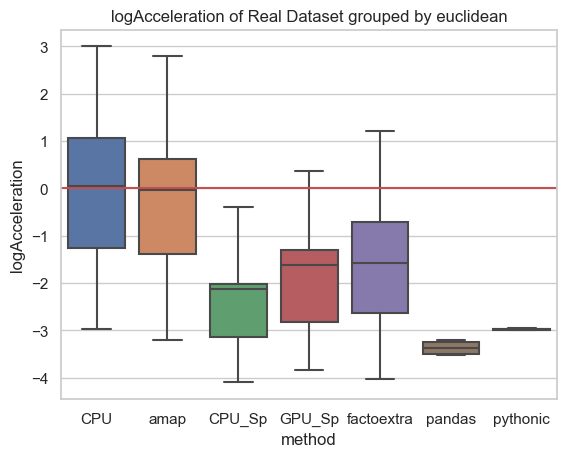

In [164]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["euclidean"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by euclidean')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by euclidean.png',dpi=200)

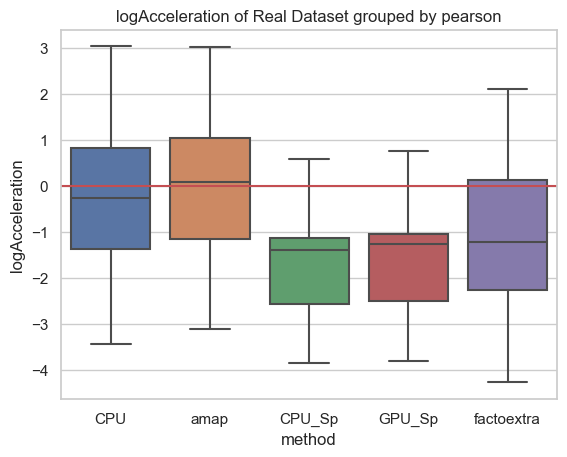

In [165]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by pearson')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by pearson.png',dpi=200)

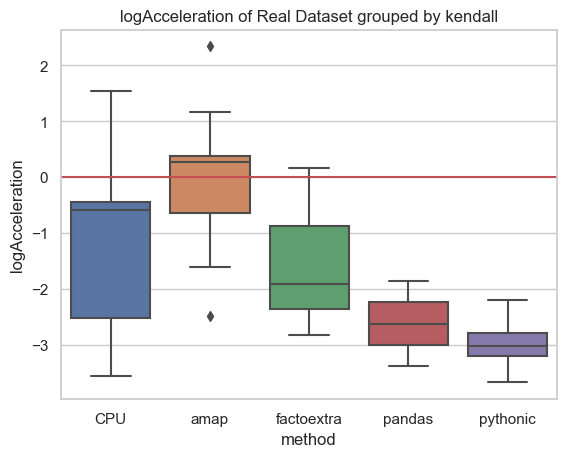

In [166]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["kendall"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by kendall')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by kendall.png',dpi=200)

#### Build the plots for the subsets only that run faster.

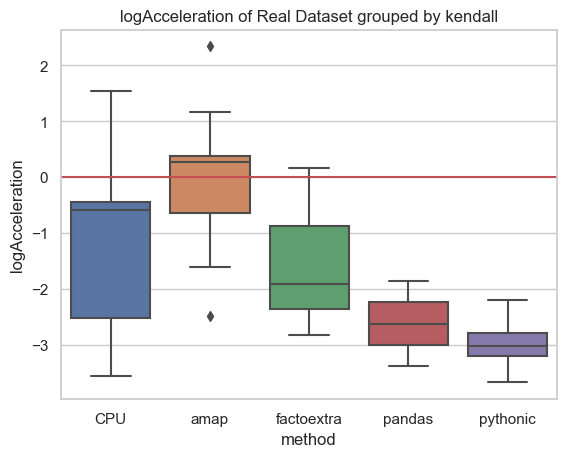

In [167]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["kendall"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by kendall')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by kendall.png',dpi=200)

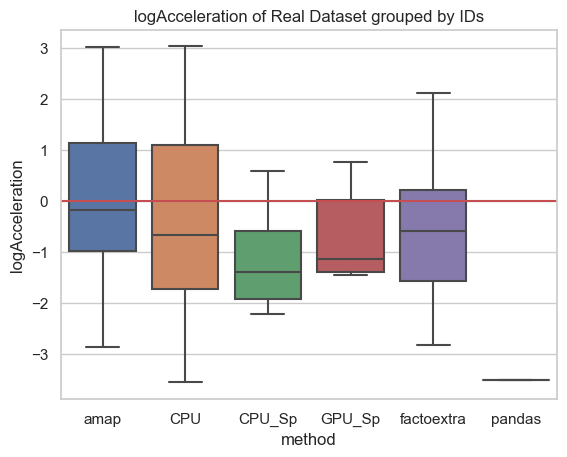

In [168]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
#size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix",'HLCA_lung'])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by IDs.png',dpi=200)

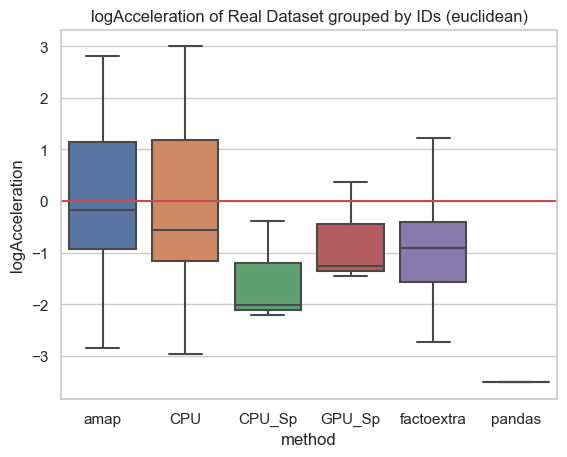

In [169]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["euclidean"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix",'HLCA_lung'])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs (euclidean)')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by IDs (euclidean).png',dpi=200)

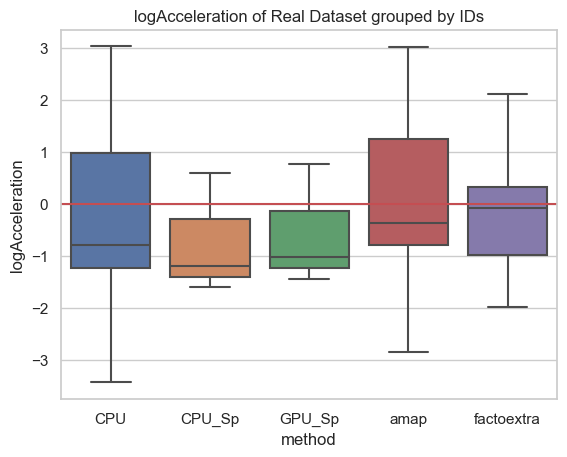

In [170]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix",'HLCA_lung'])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by IDs.png',dpi=200)

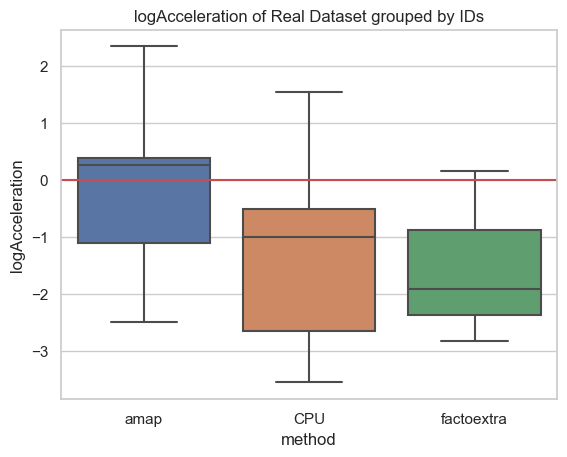

In [171]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["kendall"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix",'HLCA_lung'])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by IDs.png',dpi=200)

In [172]:
print(df_real_acc['ID'].unique())

['Camp_GSE75140_hOrg' 'Chen_GSE87544_Merged_17samples_14437cells_count'
 'HSC_matrix' 'FibroCardRNASeq_snRNA_Heart_counts_matrix'
 'Organogenes_gene_count' 'FibroCardATACSeq_counts' 'HLCA_lung'
 'HLCA_Marrow' 'HLCA_aorta' 'PBMC_B_T_count_matrix'
 'PBMC_B_CD8_T_count_matrix']


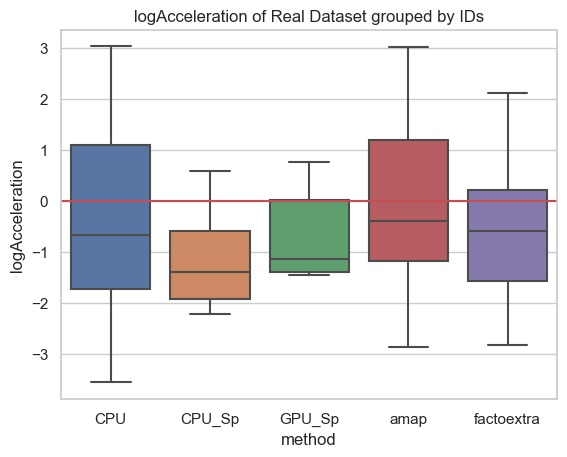

In [173]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
#size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs')
#kendall_data_filtered 
plt.savefig(f'{IMG_PATH_R}logAcceleration of Real Dataset grouped by IDs.png',dpi=200)

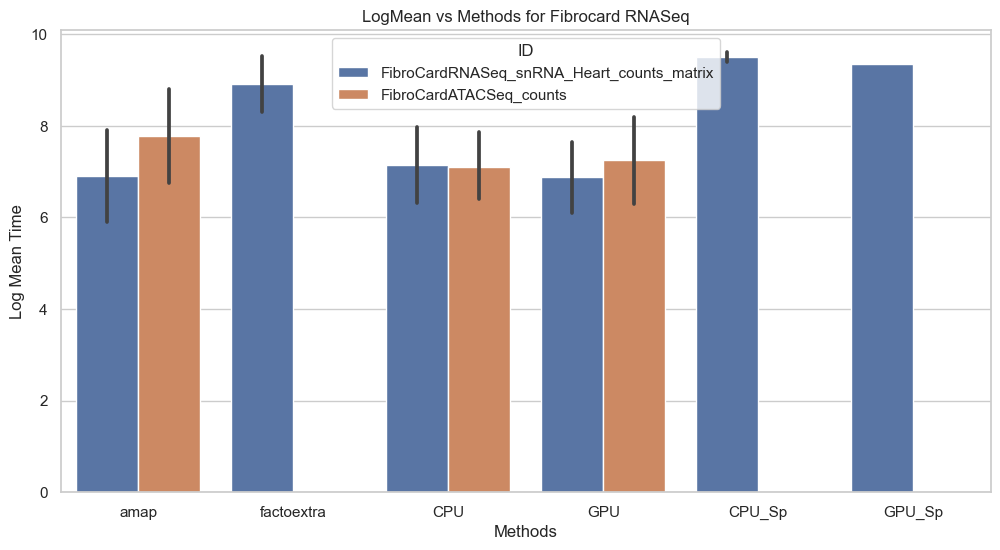

In [174]:
filtered_data = df[df['ID'].isin(['FibroCardRNASeq_snRNA_Heart_counts_matrix','FibroCardATACSeq_counts'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.barplot(x='method', y='logMeanTime', hue='ID', data=filtered_data)

# Add title and labels
plt.title('LogMean vs Methods for Fibrocard RNASeq')
plt.xlabel('Methods')
plt.ylabel('Log Mean Time')

# Show the plot
#plt.show()
plt.savefig(f'{IMG_PATH_R}LogMean vs Methods for Fibrocard RNASeq.png',dpi=200)

In [175]:
#after repro

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("Acceleration_real_datasets.csv")
# Sample data preparation
df

DataFile    method     metric  \
0    ../../DistanceBenchmarking/Real/Camp/GSE75140_...      amap    kendall   
1    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
2    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
3    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       GPU    kendall   
4    DistanceBenchmarking/Real/Camp/GSE75140_hOrg.f...    pandas    kendall   
..                                                 ...       ...        ...   
321  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic    kendall   
322  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...      amap  euclidean   
323  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...       GPU  euclidean   
324  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic  euclidean   
325  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...    pandas  euclidean   

     acceleration  
0       14.420652  
1       18.246644  
2       18.246644  
3        1.000000  
4        0.013718  
..            ...  
321      0.000886  
322      1.625943  
323      1.000000  
324      0.001106  
325      0.000630  

[326 rows x 4 columns]

In [35]:
weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df['DataFile']:
    k=i.split('/')[-1].split('.')
    l= i.split("/")[-2]
    w1.append(k[0])
    w2.append(str(l+'_'+k[0]))

df['type'] = w1
df['ID'] = w2
df['ID2'] = df['ID']+'_'+df['metric']
# df['logWX'] = np.log10(df['wX'])
# df['logWY'] = np.log10(df['wY'])
# df['weight'] = weight
# #df['minTime'] = df[['val_1':'val_25']].min(axis=1)
# df['logW'] = np.log10(df['weight'])
df['logMeanTime'] = np.log10(df['mean'])
# df['logMinTime']=np.log10(df['minTime'])
# df['logMaxTime']=np.log10(df['maxTime'])
# df['|W|'] = df['wX']*df['wY']
df['Method'] = df['metric']+'_'+df['method']
#df['IDtag'] = unID
#print(df[df['DataFile']])
df

KeyError: 'mean'

In [178]:
df['mean'] = np.where(df['method'].isin(['pandas','pythonic']), df['mean']*24000000,df['mean'])

In [179]:
df_grouped = df.groupby(['method'])
acc = df_grouped.get_group(("GPU"))
v1 =  df_grouped.get_group(("CPU"))
v1.head()
v1["Ratio"] = acc['mean']/v1['mean']
print(acc['mean']*v1['mean'])
d3 = pd.DataFrame
l1 = []
for dat in acc.index:
    for ind in df.index:
        if acc["ID2"][dat] == df['ID2'][ind]:
            l1.append([df['DataFile'][ind],df['method'][ind],df['metric'][ind],acc['mean'][dat]/df['mean'][ind]])
        
#v1.head()
# df_grouped['Mean(GPU)'] = df_grouped['GPU'].mean()
#df_grouped['Mean(Method)'] = df_grouped['method'].mean()

105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
       ..
208   NaN
209   NaN
210   NaN
211   NaN
212   NaN
Name: mean, Length: 108, dtype: float64


d:\ai-ml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [180]:
df_real_acc = pd.DataFrame(l1, columns=['DataFile','method','metric','acceleration'])

In [181]:
df_real_acc.to_csv('saved_acc')

In [182]:

# df_real_acc = pd.read_csv('saved_acc')
# df_real_acc

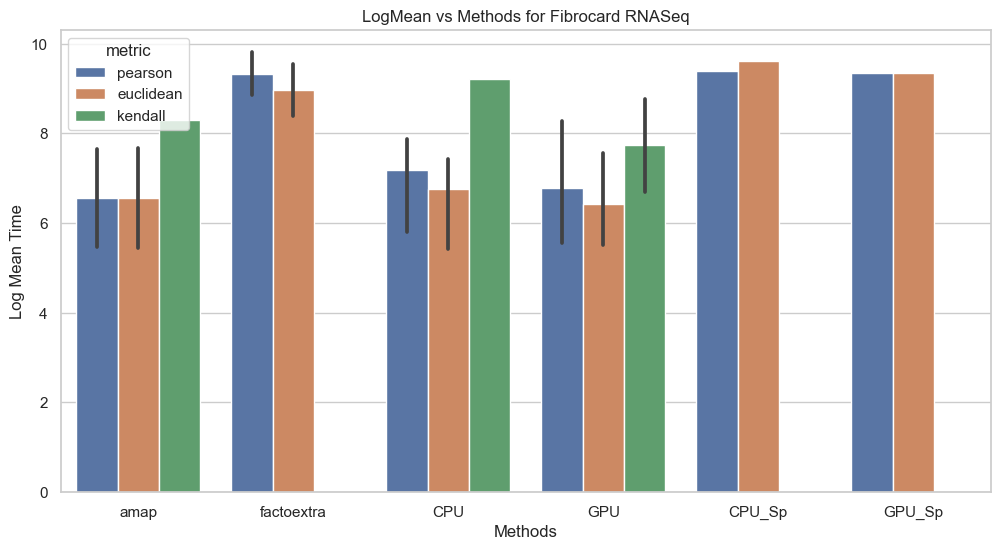

In [183]:
filtered_data = df[df['type'].isin(['snRNA_Heart_counts_matrix'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.barplot(x='method', y='logMeanTime', hue='metric', data=filtered_data)

# Add title and labels
plt.title('LogMean vs Methods for Fibrocard RNASeq')
plt.xlabel('Methods')
plt.ylabel('Log Mean Time')

# Show the plot
#plt.show()
plt.savefig(f'LogMean vs Methods for Fibrocard RNASeq.png',dpi=200)

In [184]:
weight=[]
unID=[]
w1=[]
w2=[]
# This is for Matrix.bench file Real Dataset
# for i in df_real_acc['DataFile']:
#     k= i.split('/')[-1].rsplit('_',1)[0]
#     i = i.split("_")
#     i=i[-1].split(".")[0]
#     weight.append(int(i))
#     unID.append(k)

#This is for Generated dataset
for i in df_real_acc['DataFile']:
    print(i)
    k=i.split('/')[-1].split('.')
    print(k,l)
    l= i.split("/")[-2]
    
    w1.append(k[0])
    w2.append(str(l+'_'+k[0]))

df_real_acc['type'] = w1
df_real_acc['ID'] = w2

# df_real_acc['logWX'] = np.log10(df_real_acc['wX'])
# df_real_acc['logWY'] = np.log10(df_real_acc['wY'])
# df_real_acc['weight'] = weight
# #df_real_acc['minTime'] = df_real_acc[['val_1':'val_25']].min(axis=1)
# df_real_acc['logW'] = np.log10(df_real_acc['weight'])
df_real_acc['logAcceleration'] = np.log10(df_real_acc['acceleration'])
# df_real_acc['logMinTime']=np.log10(df_real_acc['minTime'])
# df_real_acc['logMaxTime']=np.log10(df_real_acc['maxTime'])
# df_real_acc['|W|'] = df_real_acc['wX']*df_real_acc['wY']
df_real_acc['Method'] = df_real_acc['metric']+'_'+df_real_acc['method']
#df_real_acc['IDtag'] = unID
#print(df_real_acc[df_real_acc['DataFile']])
df_real_acc

../../DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt
['GSE75140_hOrg', 'fetal', 'master', 'data', 'frame', 'txt'] HLCA_aorta
../../DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt
['GSE75140_hOrg', 'fetal', 'master', 'data', 'frame', 'txt'] Camp
../../DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt
['GSE75140_hOrg', 'fetal', 'master', 'data', 'frame', 'txt'] Camp
../../DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt
['GSE75140_hOrg', 'fetal', 'master', 'data', 'frame', 'txt'] Camp
DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt
['GSE75140_hOrg', 'fetal', 'master', 'data', 'frame', 'txt'] Camp
DistanceBenchmarking/Real/Camp/GSE75140_hOrg.fetal.master.data.frame.txt
['GSE75140_hOrg', 'fetal', 'master', 'data', 'frame', 'txt'] Camp
../../DistanceBenchmarking/Real/Chen/GSE87544_Merged_17samples_14437cells_count.txt
['GSE87544_Merged_17samples_14437cells_count', 'txt'

DataFile    method     metric  \
0    ../../DistanceBenchmarking/Real/Camp/GSE75140_...      amap    kendall   
1    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
2    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       CPU    kendall   
3    ../../DistanceBenchmarking/Real/Camp/GSE75140_...       GPU    kendall   
4    DistanceBenchmarking/Real/Camp/GSE75140_hOrg.f...    pandas    kendall   
..                                                 ...       ...        ...   
249  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic    kendall   
250  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...      amap  euclidean   
251  ../../DistanceBenchmarking/Real/PBMC/B_CD8_T_c...       GPU  euclidean   
252  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...  pythonic  euclidean   
253  DistanceBenchmarking/Real/PBMC/B_CD8_T_count_m...    pandas  euclidean   

     acceleration                  type                         ID  \
0       14.420652         GSE75140_hOrg         Camp_GSE75140_hOrg   
1       18.246644         GSE75140_hOrg         Camp_GSE75140_hOrg   
2       18.246644         GSE75140_hOrg         Camp_GSE75140_hOrg   
3        1.000000         GSE75140_hOrg         Camp_GSE75140_hOrg   
4        0.013718         GSE75140_hOrg         Camp_GSE75140_hOrg   
..            ...                   ...                        ...   
249      0.000886  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
250      1.625943  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
251      1.000000  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
252      0.001106  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   
253      0.000630  B_CD8_T_count_matrix  PBMC_B_CD8_T_count_matrix   

     logAcceleration              Method  
0           1.158985        kendall_amap  
1           1.261183         kendall_CPU  
2           1.261183         kendall_CPU  
3           0.000000         kendall_GPU  
4          -1.862708      kendall_pandas  
..               ...                 ...  
249        -3.052417    kendall_pythonic  
250         0.211105      euclidean_amap  
251         0.000000       euclidean_GPU  
252        -2.956204  euclidean_pythonic  
253        -3.200995    euclidean_pandas  

[254 rows x 8 columns]

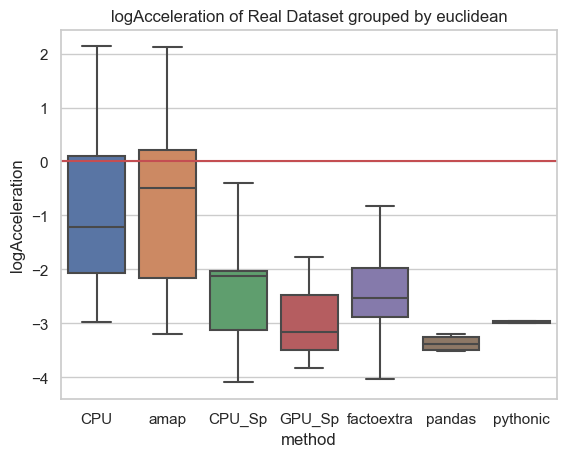

In [185]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["euclidean"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])
# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by euclidean')
#kendall_data_filtered 
plt.savefig(f'logAcceleration of Real Dataset grouped by euclidean.png',dpi=200)

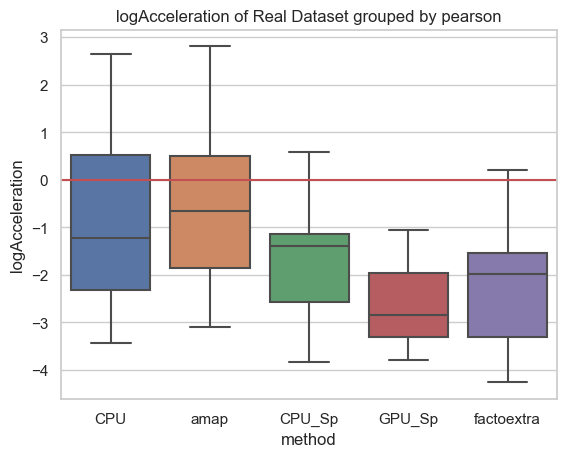

In [186]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by pearson')
#kendall_data_filtered 
plt.savefig(f'logAcceleration of Real Dataset grouped by pearson.png',dpi=200)

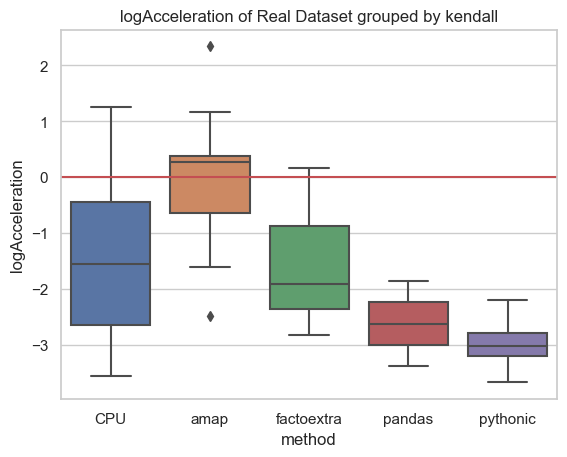

In [187]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["kendall"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by kendall')
#kendall_data_filtered 
plt.savefig(f'logAcceleration of Real Dataset grouped by kendall.png',dpi=200)

#### Build the plots for the subsets only that run faster.

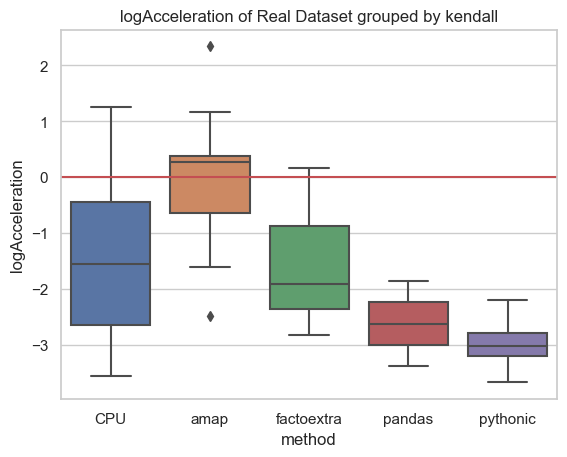

In [188]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["kendall"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by kendall')
#kendall_data_filtered 
plt.savefig(f'logAcceleration of Real Dataset grouped by kendall.png',dpi=200)

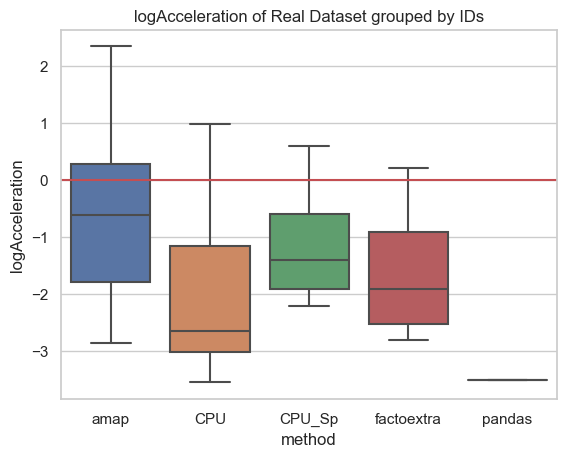

In [189]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
#size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix",'HLCA_lung'])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs')
#kendall_data_filtered 
plt.savefig(f'logAcceleration of Real Dataset grouped by IDs.png',dpi=200)

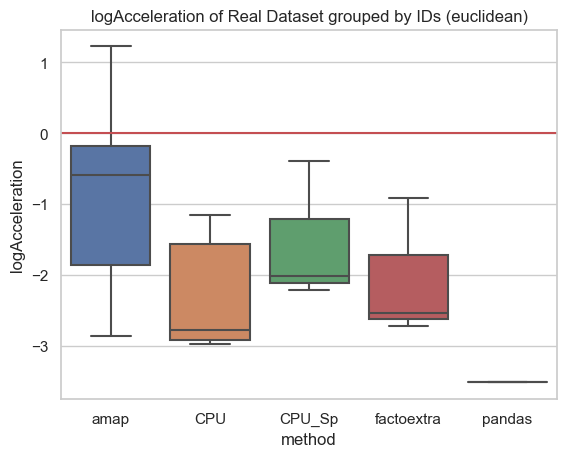

In [190]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["euclidean"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix",'HLCA_lung'])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs (euclidean)')
#kendall_data_filtered 
plt.savefig(f'logAcceleration of Real Dataset grouped by IDs (euclidean).png',dpi=200)

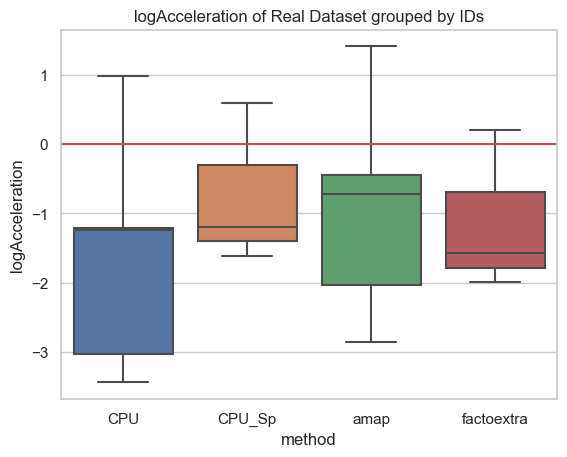

In [191]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix",'HLCA_lung'])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs')
#kendall_data_filtered 
plt.savefig(f'logAcceleration of Real Dataset grouped by IDs.png',dpi=200)

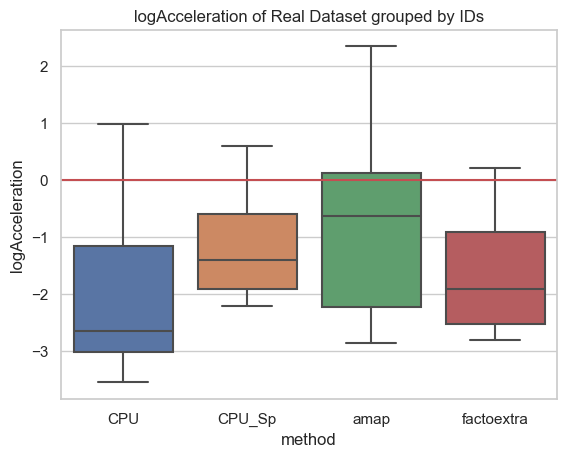

In [192]:
size_data_filtered = df_real_acc[df_real_acc['method'].isin(["CPU","pythonic","pandas","factoextra","amap","CPU_Sp","GPU_Sp"])]
#size_data_filtered = size_data_filtered[size_data_filtered['metric'].isin(["pearson"])]
size_data_filtered = size_data_filtered[size_data_filtered['ID'].isin(["HSC_matrix"])]
size_data_filtered = size_data_filtered.sort_values(['DataFile', 'method', 'metric'])

# Drop the 'variable' column
#size_data_filtered = size_data_filtered.drop('variable', axis=1)

ax = sns.boxplot(data=size_data_filtered,x='method',y='logAcceleration')
plt.axhline(y=0.0, color='r', linestyle='-')
#ax = sns.lineplot(data=size_data_filtered,x='method',y='acceleration')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('logAcceleration of Real Dataset grouped by IDs')
#kendall_data_filtered 
plt.savefig(f'logAcceleration of Real Dataset grouped by IDs.png',dpi=200)

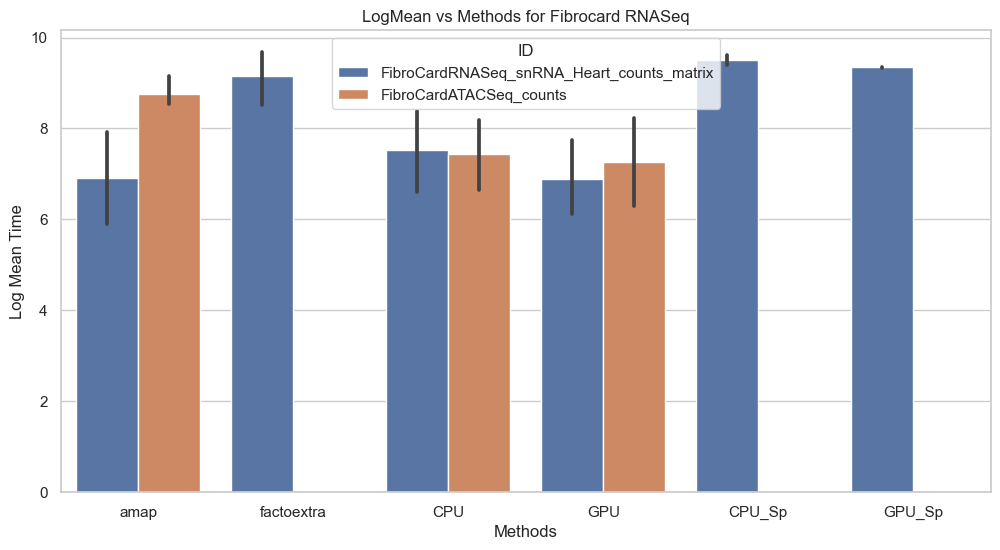

In [193]:
filtered_data = df[df['ID'].isin(['FibroCardRNASeq_snRNA_Heart_counts_matrix','FibroCardATACSeq_counts'])]

# Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the subplot
ax = sns.barplot(x='method', y='logMeanTime', hue='ID', data=filtered_data)

# Add title and labels
plt.title('LogMean vs Methods for Fibrocard RNASeq')
plt.xlabel('Methods')
plt.ylabel('Log Mean Time')


plt.savefig(f'LogMean vs Methods for Fibrocard RNASeq.png',dpi=200)